In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# モジュールのインポート
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys

In [3]:
# 自作モジュール
sys.path.append("../src")
import dataloader
import module_extraction
from module_extraction import Filters, Modules
import anomaly_detection
from anomaly_detection import HotspotDetectors, AnomalyTypeClassifier
import utils

分析対象の指定

In [4]:
#input_img_path = "../images/ortho/1466.tif"
input_img_path = "../images/ortho/1391.tif"
input_dir_path = "../outputs/"+input_img_path.split("/")[-1][:-4]
print(input_dir_path)

../outputs/1391


画像データの取得

In [5]:
img_org = cv2.imread(input_img_path, 0)

In [6]:
thermal_img_files = dataloader.get_img_files(dir_path=input_dir_path+"/modules",gray=False)

モジュール情報の取得

In [7]:
import pickle
with open(input_dir_path+'/module_contours.pkl', 'rb') as pkl:
    module_contours = pickle.load(pkl)
with open(input_dir_path+'/module_labels_split.pkl', 'rb') as pkl:
    module_labels = pickle.load(pkl)

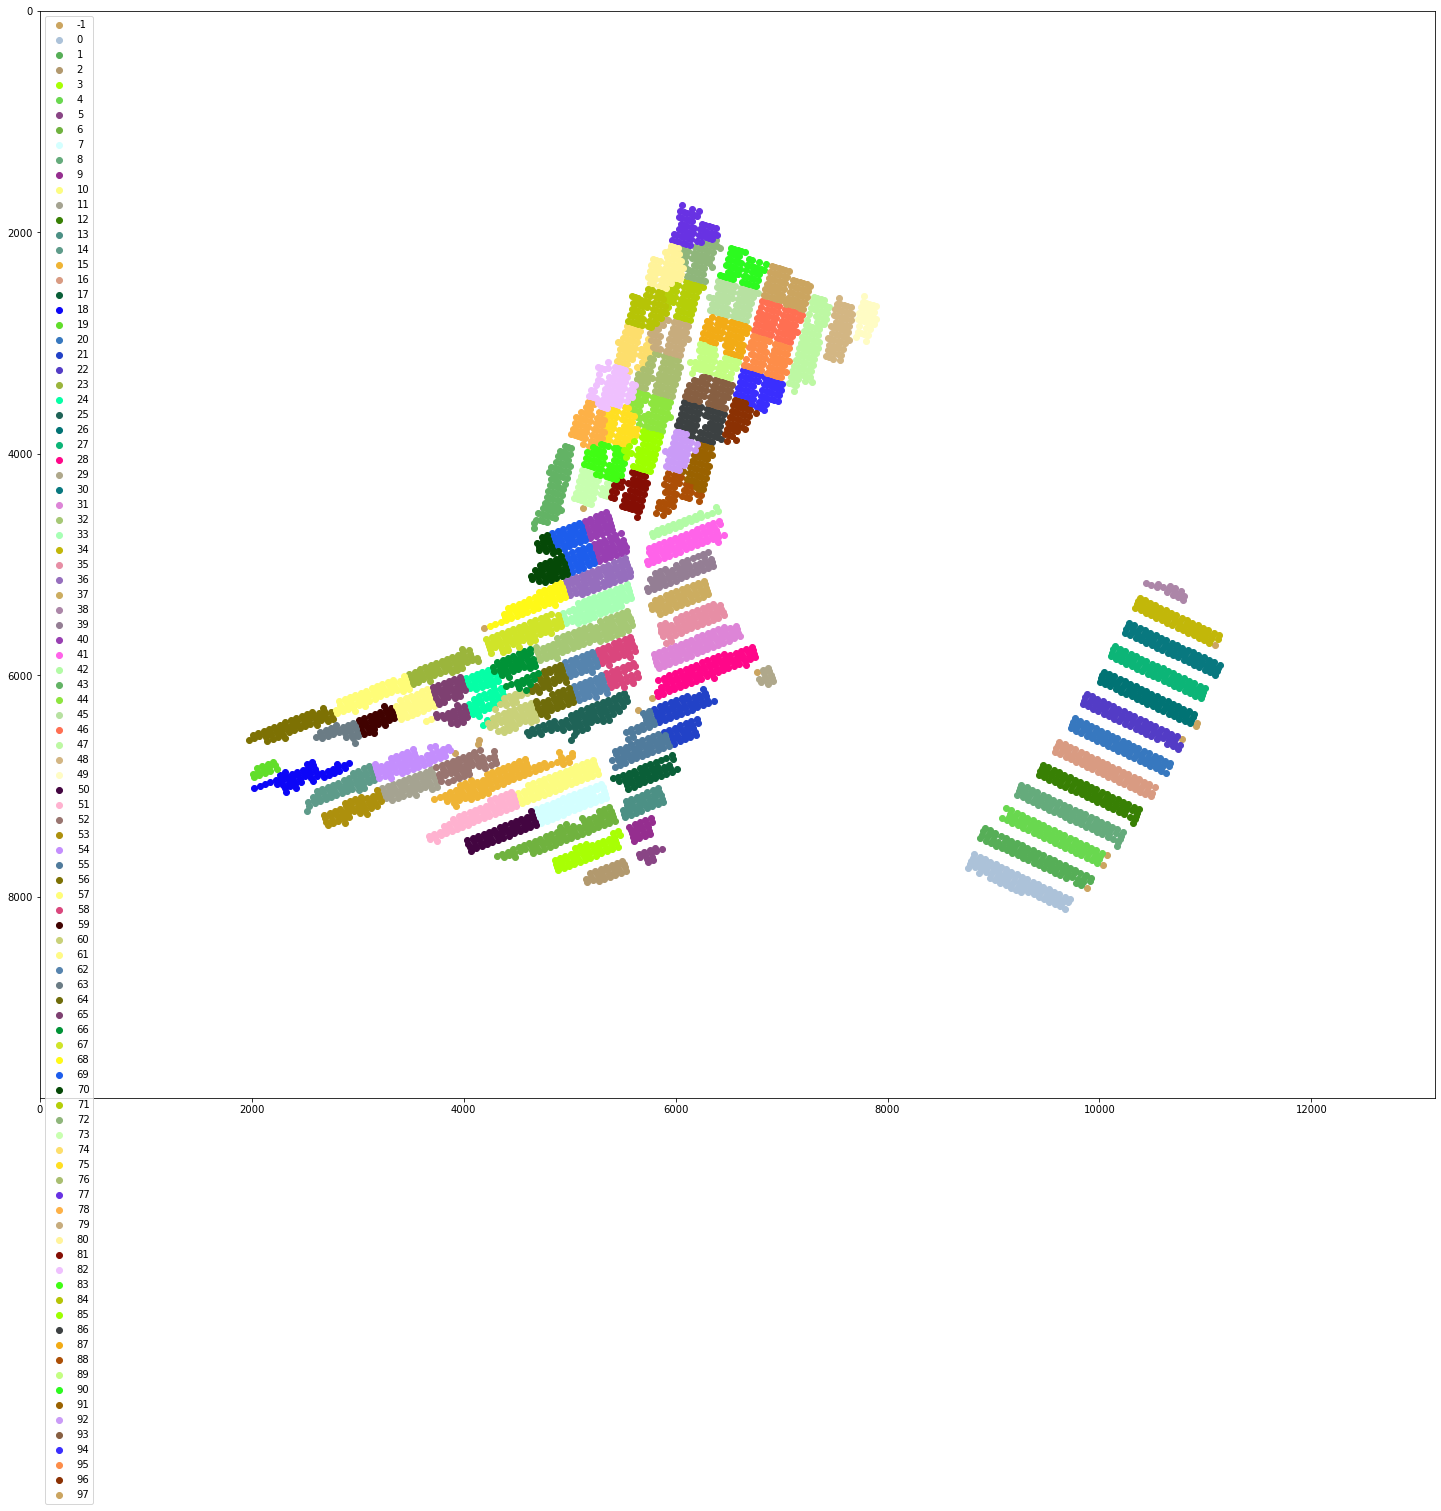

In [8]:
module_extraction.plot_module_map_with_labels(img_org, module_contours, module_labels)

温度データの取得

In [9]:
%%time
# This part requires expensive calculations
thermal_data = dataloader.get_thermal_data(thermal_img_files, module_labels) # group

100%|██████████| 98/98 [07:53<00:00,  4.83s/it]

CPU times: user 35min 2s, sys: 1min 19s, total: 36min 21s
Wall time: 7min 53s


ホットスポット検出モデルの学習

In [10]:
detectors = HotspotDetectors()

In [11]:
%%time
detectors.fit(thermal_data, module_labels)

100%|██████████| 98/98 [00:11<00:00,  8.71it/s]

CPU times: user 11.6 s, sys: 231 ms, total: 11.8 s
Wall time: 11.4 s


In [12]:
classifier = AnomalyTypeClassifier(detectors)

In [13]:
# -- check outliers (blue plots) --
#detectors.check_pred_labels(thermal_data, module_labels, anomodels.lof, anomodels.isof)

異常検知の実行

In [14]:
list_anomaly_modules = [
    "172.jpg", 
    "300.jpg",                 
    "717.jpg",         
    "877.jpg",     
    "900.jpg",         
    "1248.jpg",             
    "1397.jpg",                 
    "1531.jpg",         
    "1638.jpg",     
    "1705.jpg",         
    "1955.jpg",     
    "3237.jpg",             
    "4036.jpg",         
    "4517.jpg",             
    "4908.jpg",             
]

63.jpg Junction-Box-Error
823.jpg Normal
4217.jpg Normal
3578.jpg Normal
2666.jpg Normal
5109.jpg Normal
2100.jpg Normal
4571.jpg Normal
1409.jpg Normal
189.jpg Normal
2114.jpg Normal
4565.jpg Normal
4203.jpg Normal
2672.jpg Normal
77.jpg Normal
837.jpg Normal
2882.jpg Normal
3544.jpg Normal
5135.jpg Junction-Box-Error
1353.jpg Normal
1435.jpg Normal
3222.jpg Junction-Box-Error
2128.jpg Normal
3236.jpg Junction-Box-Error
4559.jpg Junction-Box-Error
1421.jpg Normal
1347.jpg Junction-Box-Error
2896.jpg Junction-Box-Error
3550.jpg Normal
638.jpg Junction-Box-Error
2869.jpg Normal
1390.jpg Normal
604.jpg Normal
2699.jpg Junction-Box-Error
2841.jpg Normal
3587.jpg Normal
162.jpg Normal
176.jpg Normal
2855.jpg Junction-Box-Error
3593.jpg Normal
88.jpg Junction-Box-Error
610.jpg Normal
1384.jpg Normal
4773.jpg Junction-Box-Error
2302.jpg Normal
2464.jpg Normal
4015.jpg Normal
1179.jpg Normal
2470.jpg Normal
4001.jpg Normal
4767.jpg Normal
3008.jpg Junction-Box-Error
2316.jpg Junction-Box-Erro

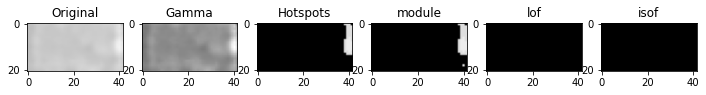

5294.jpg Normal
3183.jpg Normal
4834.jpg Normal
1794.jpg Normal
200.jpg Junction-Box-Error
957.jpg Normal
2712.jpg Normal
4363.jpg Normal
4405.jpg Junction-Box-Error
2074.jpg Normal
1569.jpg Junction-Box-Error
4411.jpg Junction-Box-Error
2060.jpg Normal
5069.jpg Normal
2706.jpg Normal
3418.jpg Normal
4377.jpg Junction-Box-Error
943.jpg Normal
5041.jpg Normal
3430.jpg Normal
1227.jpg Normal
1541.jpg Junction-Box-Error
4439.jpg Normal
3356.jpg Normal
2048.jpg Normal
3342.jpg Normal
1555.jpg Normal
1233.jpg Normal
5055.jpg Junction-Box-Error
3424.jpg Normal
2909.jpg Normal
994.jpg Normal
758.jpg Normal
980.jpg Junction-Box-Error
770.jpg Junction-Box-Error
2935.jpg Normal
5082.jpg Normal
3395.jpg Normal
1582.jpg Normal
1596.jpg Normal
3381.jpg Junction-Box-Error
2921.jpg Normal
4388.jpg Junction-Box-Error
5096.jpg Normal
764.jpg Normal
3380.jpg Normal
1597.jpg Normal
765.jpg Normal
5097.jpg Normal
4389.jpg Normal
2920.jpg Normal
5083.jpg Junction-Box-Error
2934.jpg Normal
771.jpg Normal
15

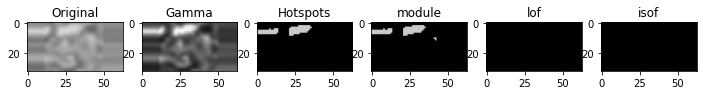

2061.jpg Normal
4410.jpg Normal
1568.jpg Normal
942.jpg Normal
4376.jpg Normal
3419.jpg Normal
2707.jpg Junction-Box-Error
5068.jpg Junction-Box-Error
4362.jpg Junction-Box-Error
2713.jpg Normal
956.jpg Single-Hotspot


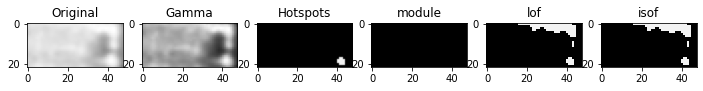

2075.jpg Junction-Box-Error
4404.jpg Normal
5295.jpg Normal
567.jpg Normal
201.jpg Normal
1795.jpg Normal
4835.jpg Normal
3182.jpg Normal
2288.jpg Normal
4821.jpg Normal
3196.jpg Normal
1959.jpg Multi-Hotspots


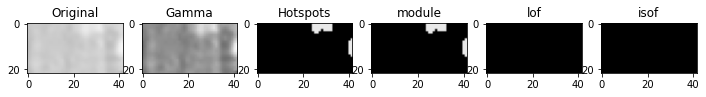

1781.jpg Junction-Box-Error
215.jpg Normal
573.jpg Junction-Box-Error
3828.jpg Normal
5281.jpg Junction-Box-Error
3800.jpg Multi-Hotspots


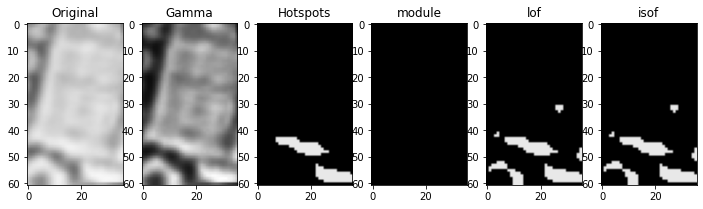

4809.jpg Junction-Box-Error
1971.jpg Normal
1965.jpg Normal
229.jpg Normal
3814.jpg Normal
1030.jpg Normal
5256.jpg Junction-Box-Error
2539.jpg Normal
3627.jpg Single-Hotspot


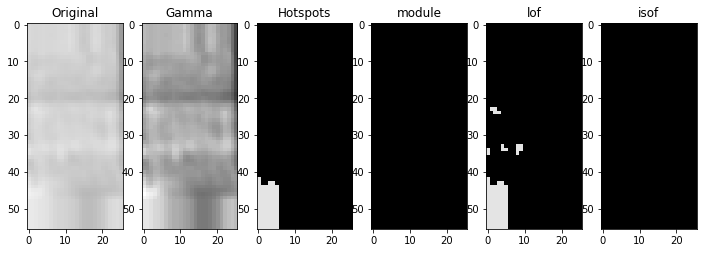

4148.jpg Normal
3141.jpg Normal
5530.jpg Junction-Box-Error
1756.jpg Normal
1742.jpg Junction-Box-Error
3155.jpg Normal
5524.jpg Junction-Box-Error
5242.jpg Junction-Box-Error
3633.jpg Normal
1024.jpg Normal
2505.jpg Normal
4174.jpg Normal
598.jpg Normal
4612.jpg Normal
2263.jpg Normal
4606.jpg Normal
3169.jpg Normal
2277.jpg Normal
5518.jpg Junction-Box-Error
1018.jpg Normal
2511.jpg Normal
4160.jpg Junction-Box-Error
3948.jpg Normal
3790.jpg Normal
413.jpg Normal
1187.jpg Normal
375.jpg Normal
1839.jpg Normal
4799.jpg Normal
5487.jpg Junction-Box-Error
4941.jpg Junction-Box-Error
5493.jpg Normal
4955.jpg Normal
361.jpg Junction-Box-Error
1193.jpg Normal
407.jpg Junction-Box-Error
3784.jpg Normal
3974.jpg Normal
349.jpg Normal
1805.jpg Normal
1811.jpg Normal
4969.jpg Junction-Box-Error
3960.jpg Normal
1144.jpg Normal
3753.jpg Normal
5322.jpg Normal
5444.jpg Junction-Box-Error
4982.jpg Junction-Box-Error
3035.jpg Junction-Box-Error
1622.jpg Junction-Box-Error
1636.jpg Normal
5450.jpg J

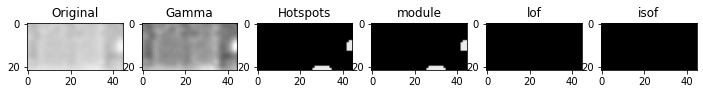

1391.jpg Normal
163.jpg Junction-Box-Error
2868.jpg Junction-Box-Error
639.jpg Junction-Box-Error
1420.jpg Junction-Box-Error
4558.jpg Junction-Box-Error
3237.jpg Normal
2129.jpg Normal
5120.jpg Normal
3551.jpg Normal
2897.jpg Normal
1346.jpg Normal
1352.jpg Normal
5134.jpg Normal
3545.jpg Normal
2883.jpg Normal
3223.jpg Normal
1434.jpg Normal
4564.jpg Junction-Box-Error
2115.jpg Normal
188.jpg Normal
836.jpg Multi-Hotspots


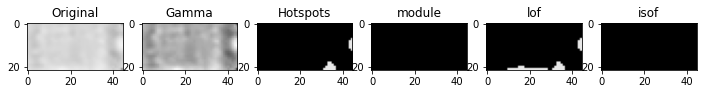

76.jpg Junction-Box-Error
2673.jpg Normal
4202.jpg Normal
5108.jpg Normal
2667.jpg Normal
3579.jpg Normal
4216.jpg Normal
822.jpg Normal
62.jpg Junction-Box-Error
1408.jpg Normal
4570.jpg Normal
2101.jpg Normal
4200.jpg Normal
2671.jpg Normal
74.jpg Normal
1378.jpg Normal
834.jpg Normal
2117.jpg Junction-Box-Error
3209.jpg Junction-Box-Error
4566.jpg Junction-Box-Error
2103.jpg Normal
4572.jpg Junction-Box-Error
60.jpg Multi-Hotspots


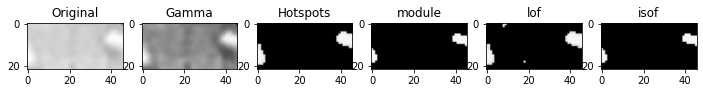

820.jpg Normal
4214.jpg Normal
2665.jpg Junction-Box-Error
48.jpg Normal
1344.jpg Single-Hotspot


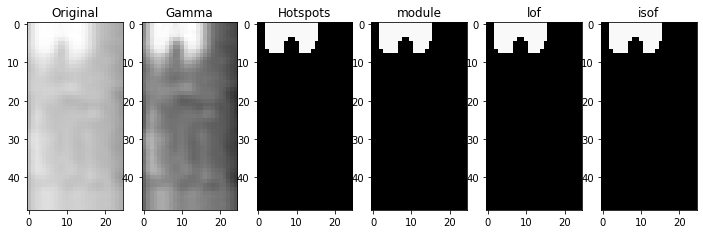

808.jpg Normal
2895.jpg Normal
3553.jpg Normal
5122.jpg Junction-Box-Error
3235.jpg Normal
1422.jpg Normal
1436.jpg Normal
3221.jpg Normal
4228.jpg Normal
2881.jpg Normal
3547.jpg Normal
2659.jpg Normal
5136.jpg Junction-Box-Error
1350.jpg Normal
149.jpg Normal
2856.jpg Normal
3590.jpg Normal
613.jpg Junction-Box-Error
1387.jpg Normal
175.jpg Junction-Box-Error
4599.jpg Normal
161.jpg Junction-Box-Error
1393.jpg Normal
607.jpg Normal
2842.jpg Normal
3584.jpg Normal
4764.jpg Junction-Box-Error
2315.jpg Normal
388.jpg Junction-Box-Error
2473.jpg Normal
4002.jpg Normal
5308.jpg Single-Hotspot


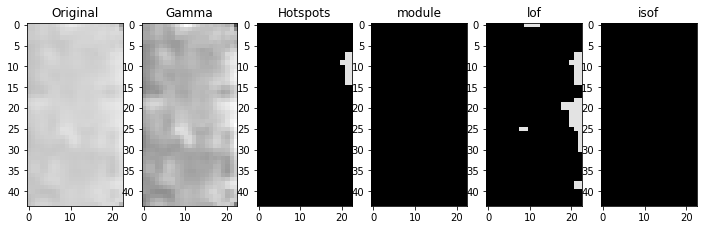

2467.jpg Normal
3779.jpg Normal
4016.jpg Normal
1608.jpg Junction-Box-Error
4770.jpg Normal
2301.jpg Normal
1620.jpg Junction-Box-Error
4758.jpg Junction-Box-Error
3037.jpg Normal
2329.jpg Junction-Box-Error
4980.jpg Normal
5446.jpg Junction-Box-Error
3989.jpg Normal
5320.jpg Normal
3751.jpg Normal
1146.jpg Normal
1152.jpg Normal
5334.jpg Normal
3745.jpg Normal
3023.jpg Normal
4994.jpg Junction-Box-Error
5452.jpg Junction-Box-Error
1634.jpg Junction-Box-Error
1807.jpg Normal
3976.jpg Normal
439.jpg Normal
3962.jpg Junction-Box-Error
1813.jpg Normal
4943.jpg Normal
5485.jpg Junction-Box-Error
377.jpg Normal
1185.jpg Normal
411.jpg Normal
3792.jpg Multi-Hotspots


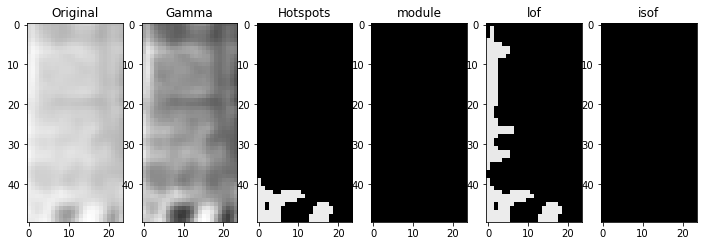

3786.jpg Normal
2498.jpg Normal
405.jpg Normal
1191.jpg Junction-Box-Error
363.jpg Normal
4957.jpg Junction-Box-Error
5491.jpg Junction-Box-Error
2261.jpg Junction-Box-Error
4610.jpg Normal
1768.jpg Normal
4176.jpg Normal
3619.jpg Normal
2507.jpg Normal
5268.jpg Junction-Box-Error
4162.jpg Normal
2513.jpg Normal
2275.jpg Normal
4604.jpg Junction-Box-Error
1754.jpg Normal
5532.jpg Junction-Box-Error
3143.jpg Junction-Box-Error
3625.jpg Normal
5254.jpg Junction-Box-Error
1032.jpg Normal
1026.jpg Normal
3631.jpg Normal
5240.jpg Normal
5526.jpg Normal
2249.jpg Normal
3157.jpg Normal
4638.jpg Normal
1998.jpg Normal
1740.jpg Normal
1973.jpg Normal
3802.jpg Normal
559.jpg Normal
3816.jpg Normal
1967.jpg Normal
3180.jpg Normal
4837.jpg Junction-Box-Error
1797.jpg Normal
203.jpg Normal
565.jpg Normal
5297.jpg Junction-Box-Error
4189.jpg Normal
5283.jpg Normal
571.jpg Normal
217.jpg Junction-Box-Error
1783.jpg Normal
3194.jpg Junction-Box-Error
4823.jpg Junction-Box-Error
2705.jpg Normal
4374.jp

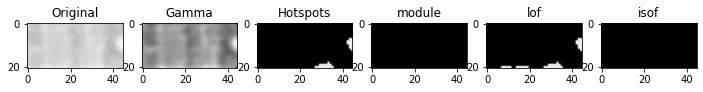

4412.jpg Normal
2063.jpg Normal
4406.jpg Normal
3369.jpg Normal
2077.jpg Normal
954.jpg Normal
1218.jpg Normal
2711.jpg Normal
4360.jpg Normal
1230.jpg Normal
5056.jpg Normal
2739.jpg Normal
3427.jpg Normal
4348.jpg Normal
3341.jpg Normal
1556.jpg Junction-Box-Error
1542.jpg Normal
3355.jpg Normal
5042.jpg Normal
3433.jpg Junction-Box-Error
968.jpg Normal
1224.jpg Normal
983.jpg Normal
997.jpg Normal
2922.jpg Junction-Box-Error
5095.jpg Junction-Box-Error
767.jpg Normal
1595.jpg Junction-Box-Error
3382.jpg Normal
2088.jpg Normal
3396.jpg Normal
1581.jpg Normal
773.jpg Normal
2936.jpg Normal
5081.jpg Junction-Box-Error
1580.jpg Normal
3397.jpg Normal
2089.jpg Normal
5080.jpg Normal
2937.jpg Normal
772.jpg Normal
766.jpg Normal
5094.jpg Normal
2923.jpg Normal
3383.jpg Normal
1594.jpg Junction-Box-Error
996.jpg Junction-Box-Error
982.jpg Normal
3354.jpg Normal
1543.jpg Normal
1225.jpg Normal
969.jpg Junction-Box-Error
3432.jpg Normal
5043.jpg Junction-Box-Error
4349.jpg Normal
3426.jpg No

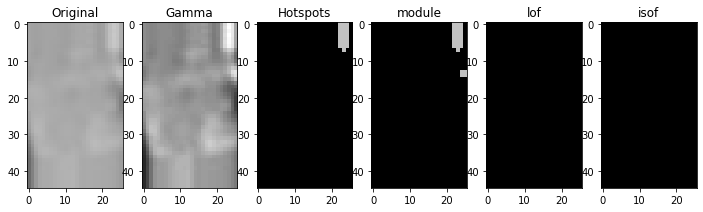

216.jpg Junction-Box-Error
202.jpg Normal
1796.jpg Normal
4836.jpg Normal
3181.jpg Normal
4188.jpg Normal
5296.jpg Junction-Box-Error
564.jpg Normal
3817.jpg Normal
1966.jpg Normal
1972.jpg Normal
558.jpg Normal
3803.jpg Normal
5241.jpg Normal
3630.jpg Normal
1027.jpg Normal
1741.jpg Normal
1999.jpg Normal
4639.jpg Normal
3156.jpg Normal
2248.jpg Multi-Hotspots


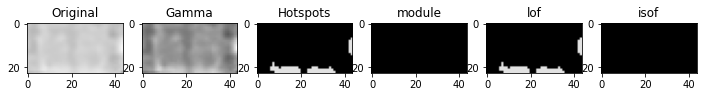

5527.jpg Normal
3142.jpg Normal
5533.jpg Junction-Box-Error
1755.jpg Junction-Box-Error
1033.jpg Normal
5255.jpg Junction-Box-Error
3624.jpg Normal
2512.jpg Normal
4163.jpg Normal
4605.jpg Normal
2274.jpg Normal
1769.jpg Normal
4611.jpg Normal
2260.jpg Single-Hotspot


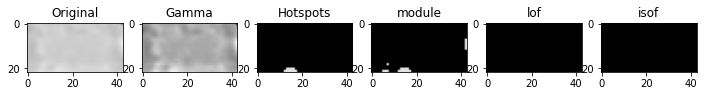

5269.jpg Normal
2506.jpg Single-Hotspot


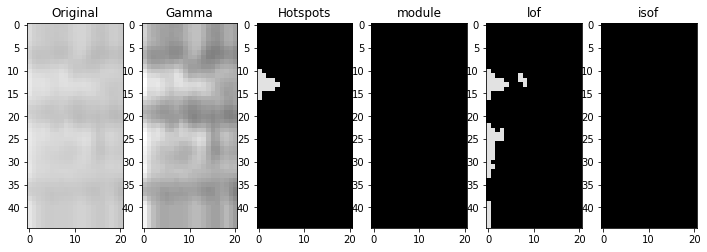

3618.jpg Normal
4177.jpg Normal
1190.jpg Normal
404.jpg Single-Hotspot


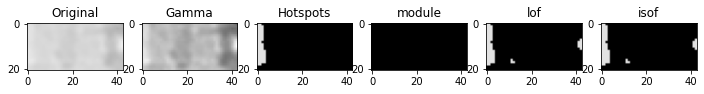

2499.jpg Normal
3787.jpg Normal
5490.jpg Normal
4956.jpg Normal
362.jpg Junction-Box-Error
376.jpg Normal
5484.jpg Junction-Box-Error
4942.jpg Junction-Box-Error
3793.jpg Normal
410.jpg Normal
1184.jpg Normal
3963.jpg Normal
438.jpg Junction-Box-Error
1812.jpg Normal
1806.jpg Normal
3977.jpg Junction-Box-Error
3744.jpg Normal
5335.jpg Junction-Box-Error
1153.jpg Normal
1635.jpg Normal
5453.jpg Junction-Box-Error
4995.jpg Junction-Box-Error
3022.jpg Normal
5447.jpg Junction-Box-Error
4981.jpg Junction-Box-Error
2328.jpg Normal
3036.jpg Junction-Box-Error
4759.jpg Normal
1621.jpg Normal
1147.jpg Normal
3750.jpg Normal
5321.jpg Junction-Box-Error
3988.jpg Normal
4017.jpg Normal
3778.jpg Normal
2466.jpg Junction-Box-Error
5309.jpg Multi-Hotspots


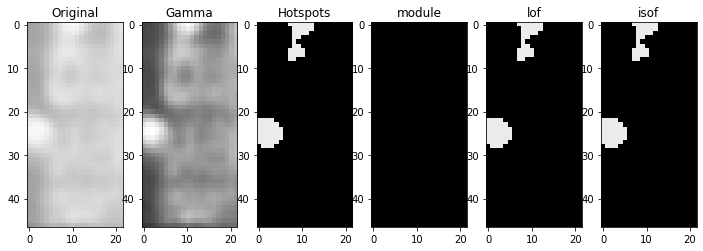

2300.jpg Normal
4771.jpg Normal
1609.jpg Normal
389.jpg Normal
2314.jpg Normal
4765.jpg Junction-Box-Error
4003.jpg Normal
2472.jpg Normal
160.jpg Normal
3585.jpg Normal
2843.jpg Normal
606.jpg Normal
1392.jpg Normal
1386.jpg Normal
612.jpg Normal
3591.jpg Normal
2857.jpg Normal
4598.jpg Normal
174.jpg Multi-Hotspots


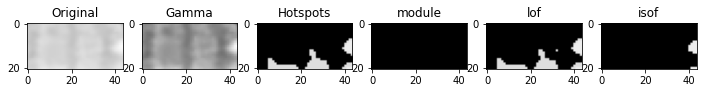

148.jpg Normal
3220.jpg Normal
1437.jpg Normal
1351.jpg Normal
5137.jpg Junction-Box-Error
2658.jpg Junction-Box-Error
3546.jpg Normal
2880.jpg Junction-Box-Error
4229.jpg Normal
5123.jpg Junction-Box-Error
3552.jpg Normal
2894.jpg Normal
809.jpg Normal
1345.jpg Normal
49.jpg Junction-Box-Error
1423.jpg Junction-Box-Error
3234.jpg Normal
4573.jpg Junction-Box-Error
2102.jpg Normal
2664.jpg Normal
4215.jpg Normal
821.jpg Normal
61.jpg Normal
835.jpg Normal
1379.jpg Normal
75.jpg Normal
2670.jpg Junction-Box-Error
4201.jpg Junction-Box-Error
4567.jpg Junction-Box-Error
3208.jpg Normal
2116.jpg Normal
3230.jpg Junction-Box-Error
1427.jpg Normal
1341.jpg Normal
3556.jpg Normal
4239.jpg Normal
2890.jpg Normal
5127.jpg Junction-Box-Error
2648.jpg Junction-Box-Error
3542.jpg Normal
2884.jpg Normal
5133.jpg Normal
1355.jpg Normal
59.jpg Normal
819.jpg Normal
1433.jpg Normal
3224.jpg Normal
2112.jpg Normal
4563.jpg Normal
4205.jpg Junction-Box-Error
2674.jpg Normal
71.jpg Junction-Box-Error
831

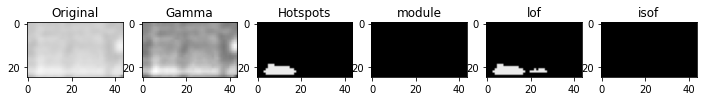

825.jpg Normal
4211.jpg Junction-Box-Error
2660.jpg Normal
2106.jpg Normal
4577.jpg Normal
3218.jpg Normal
170.jpg Normal
3595.jpg Normal
2853.jpg Normal
616.jpg Junction-Box-Error
1382.jpg Normal
1396.jpg Normal
602.jpg Normal
3581.jpg Normal
2847.jpg Junction-Box-Error
4588.jpg Junction-Box-Error
164.jpg Normal
158.jpg Junction-Box-Error
5325.jpg Normal
3754.jpg Normal
1143.jpg Normal
1625.jpg Normal
3032.jpg Normal
5443.jpg Junction-Box-Error
4985.jpg Junction-Box-Error
3026.jpg Junction-Box-Error
4749.jpg Junction-Box-Error
5457.jpg Junction-Box-Error
2338.jpg Normal
4991.jpg Junction-Box-Error
1631.jpg Normal
1157.jpg Normal
3998.jpg Normal
5331.jpg Normal
3740.jpg Normal
2476.jpg Normal
5319.jpg Junction-Box-Error
4007.jpg Normal
3768.jpg Normal
4761.jpg Normal
2310.jpg Normal
1619.jpg Normal
399.jpg Normal
4775.jpg Normal
2304.jpg Junction-Box-Error
2462.jpg Normal
4013.jpg Junction-Box-Error
1180.jpg Junction-Box-Error
414.jpg Junction-Box-Error
3797.jpg Normal
2489.jpg Normal


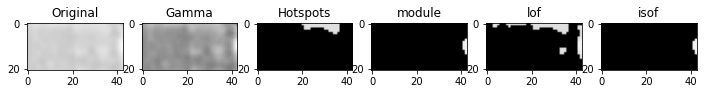

1989.jpg Normal
1751.jpg Junction-Box-Error
2258.jpg Normal
5537.jpg Junction-Box-Error
4629.jpg Junction-Box-Error
3146.jpg Junction-Box-Error
5523.jpg Normal
3152.jpg Junction-Box-Error
1745.jpg Normal
1023.jpg Normal
3634.jpg Normal
5245.jpg Junction-Box-Error
4173.jpg Normal
2502.jpg Normal
2264.jpg Normal
4615.jpg Normal
1779.jpg Normal
2270.jpg Normal
4601.jpg Junction-Box-Error
3608.jpg Normal
4167.jpg Normal
5279.jpg Normal
2516.jpg Normal
560.jpg Normal
5292.jpg Normal
3185.jpg Normal
4832.jpg Junction-Box-Error
1792.jpg Normal
206.jpg Normal
212.jpg Normal
1786.jpg Junction-Box-Error
3191.jpg Normal
4826.jpg Normal
5286.jpg Normal
4198.jpg Normal
574.jpg Normal
3807.jpg Multi-Hotspots


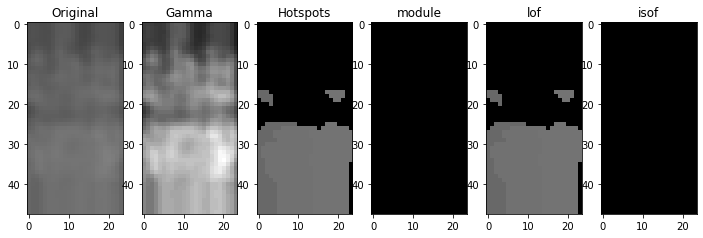

1976.jpg Junction-Box-Error
1962.jpg Normal
548.jpg Normal
3813.jpg Module-Anomaly


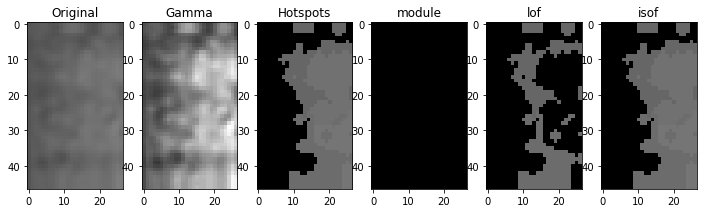

3344.jpg Junction-Box-Error
1553.jpg Junction-Box-Error
979.jpg Normal
1235.jpg Normal
5053.jpg Junction-Box-Error
3422.jpg Single-Hotspot


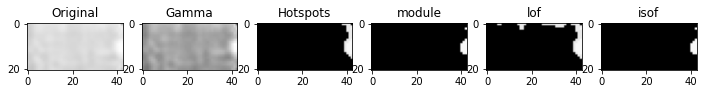

2728.jpg Junction-Box-Error
5047.jpg Normal
4359.jpg Normal
3436.jpg Normal
1221.jpg Normal
1547.jpg Single-Hotspot


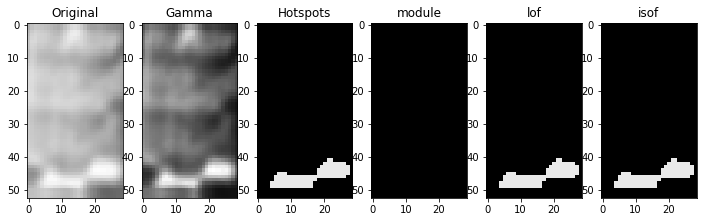

3350.jpg Normal
3378.jpg Normal
4417.jpg Junction-Box-Error
2066.jpg Normal
2700.jpg Normal
4371.jpg Normal
945.jpg Normal
1209.jpg Normal
951.jpg Normal
789.jpg Normal
2714.jpg Normal
4365.jpg Normal
4403.jpg Normal
2072.jpg Normal
1590.jpg Normal
2099.jpg Normal
3387.jpg Normal
2927.jpg Junction-Box-Error
5090.jpg Junction-Box-Error
762.jpg Normal
776.jpg Normal
2933.jpg Normal
5084.jpg Normal
3393.jpg Normal
1584.jpg Normal
986.jpg Normal
992.jpg Normal
993.jpg Normal
987.jpg Normal
5085.jpg Normal
2932.jpg Single-Hotspot


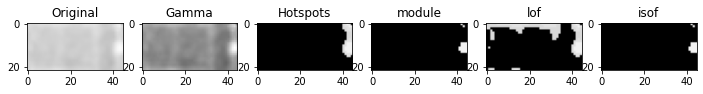

777.jpg Normal
1585.jpg Junction-Box-Error
3392.jpg Junction-Box-Error
3386.jpg Normal
2098.jpg Normal
1591.jpg Junction-Box-Error
763.jpg Junction-Box-Error
5091.jpg Normal
2926.jpg Normal
4364.jpg Junction-Box-Error
2715.jpg Normal
788.jpg Normal
950.jpg Normal
2073.jpg Normal
4402.jpg Junction-Box-Error
2067.jpg Normal
4416.jpg Normal
3379.jpg Normal
1208.jpg Normal
944.jpg Normal
4370.jpg Normal
2701.jpg Normal
1220.jpg Normal
3437.jpg Normal
4358.jpg Normal
5046.jpg Junction-Box-Error
2729.jpg Normal
3351.jpg Normal
1546.jpg Single-Hotspot


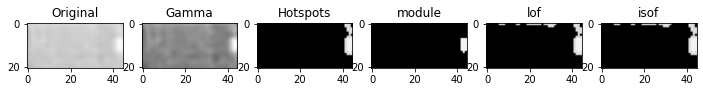

1552.jpg Normal
3345.jpg Normal
3423.jpg Normal
5052.jpg Junction-Box-Error
1234.jpg Normal
978.jpg Normal
1963.jpg Normal
3812.jpg Normal
549.jpg Multi-Hotspots


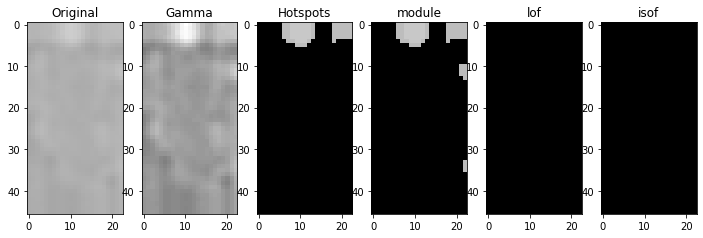

3806.jpg Normal
1977.jpg Junction-Box-Error
4827.jpg Normal
3190.jpg Normal
1787.jpg Normal
213.jpg Normal
575.jpg Normal
4199.jpg Junction-Box-Error
5287.jpg Normal
5293.jpg Junction-Box-Error
561.jpg Normal
207.jpg Normal
1793.jpg Normal
4833.jpg Normal
3184.jpg Normal
4600.jpg Junction-Box-Error
2271.jpg Normal
1778.jpg Normal
2517.jpg Normal
5278.jpg Normal
4166.jpg Junction-Box-Error
3609.jpg Normal
2503.jpg Normal
4172.jpg Junction-Box-Error
4614.jpg Normal
2265.jpg Normal
1744.jpg Normal
3153.jpg Junction-Box-Error
5522.jpg Junction-Box-Error
5244.jpg Normal
3635.jpg Normal
1022.jpg Normal
1036.jpg Normal
5250.jpg Normal
3621.jpg Normal
3147.jpg Normal
4628.jpg Normal
5536.jpg Junction-Box-Error
2259.jpg Normal
1750.jpg Normal
1988.jpg Multi-Hotspots


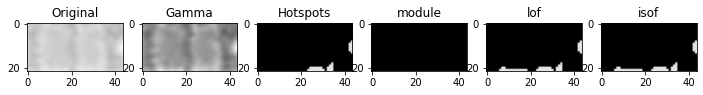

1817.jpg Normal
3966.jpg Normal
429.jpg Normal
3972.jpg Normal
1803.jpg Junction-Box-Error
4953.jpg Normal
5495.jpg Junction-Box-Error
367.jpg Normal
1195.jpg Normal
401.jpg Normal
3782.jpg Normal
2488.jpg Normal
3796.jpg Normal
415.jpg Junction-Box-Error
1181.jpg Junction-Box-Error
373.jpg Normal
4947.jpg Multi-Hotspots


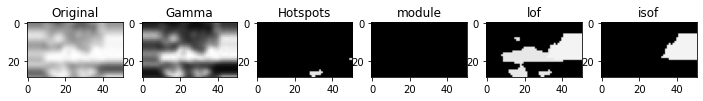

5481.jpg Junction-Box-Error
2305.jpg Normal
4774.jpg Normal
398.jpg Junction-Box-Error
4012.jpg Normal
2463.jpg Normal
3769.jpg Normal
4006.jpg Junction-Box-Error
5318.jpg Junction-Box-Error
2477.jpg Junction-Box-Error
1618.jpg Multi-Hotspots


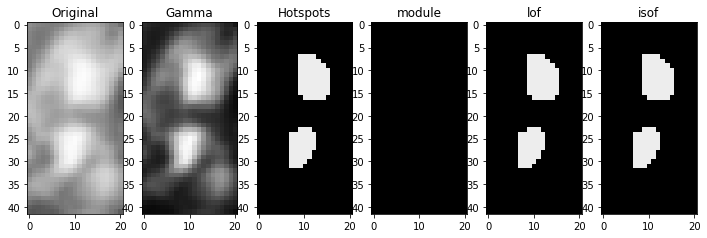

2311.jpg Normal
4760.jpg Normal
1630.jpg Normal
4990.jpg Normal
2339.jpg Normal
5456.jpg Junction-Box-Error
4748.jpg Junction-Box-Error
3027.jpg Normal
3741.jpg Normal
5330.jpg Normal
3999.jpg Normal
1156.jpg Junction-Box-Error
1142.jpg Single-Hotspot


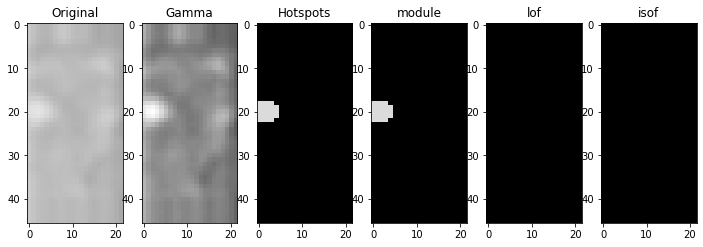

3755.jpg Normal
5324.jpg Normal
4984.jpg Junction-Box-Error
5442.jpg Junction-Box-Error
3033.jpg Normal
1624.jpg Junction-Box-Error
159.jpg Junction-Box-Error
2846.jpg Normal
3580.jpg Normal
603.jpg Normal
1397.jpg Normal
165.jpg Junction-Box-Error
4589.jpg Normal
171.jpg Normal
1383.jpg Multi-Hotspots


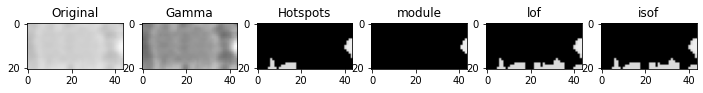

617.jpg Junction-Box-Error
2852.jpg Normal
3594.jpg Normal
2661.jpg Normal
4210.jpg Normal
824.jpg Normal
64.jpg Junction-Box-Error
1368.jpg Normal
3219.jpg Normal
4576.jpg Normal
2107.jpg Module-Anomaly


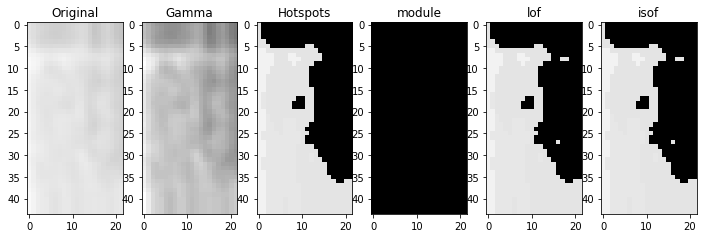

4562.jpg Normal
2113.jpg Normal
830.jpg Normal
70.jpg Multi-Hotspots


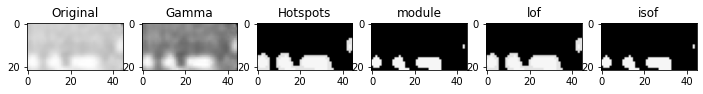

2675.jpg Normal
4204.jpg Junction-Box-Error
818.jpg Normal
58.jpg Normal
1354.jpg Junction-Box-Error
5132.jpg Junction-Box-Error
2885.jpg Normal
3543.jpg Normal
3225.jpg Multi-Hotspots


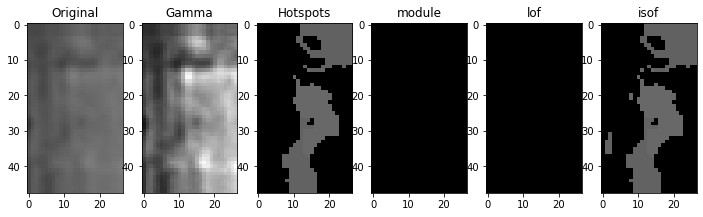

1432.jpg Normal
1426.jpg Normal
3231.jpg Normal
5640.jpg Single-Hotspot


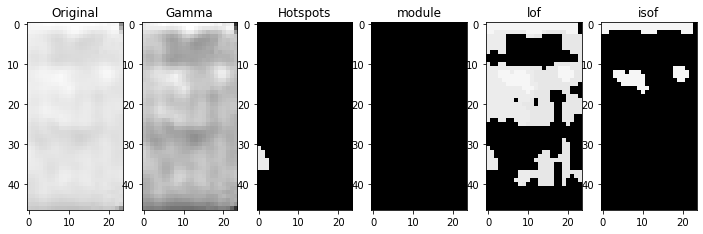

2649.jpg Normal
5126.jpg Normal
2891.jpg Normal
4238.jpg Junction-Box-Error
3557.jpg Normal
1340.jpg Normal
1430.jpg Normal
2139.jpg Normal
4548.jpg Multi-Hotspots


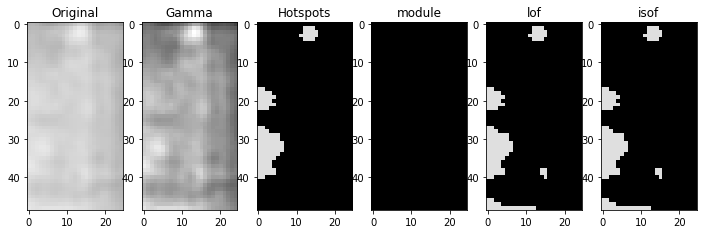

3227.jpg Normal
8.jpg Junction-Box-Error
3541.jpg Normal
2887.jpg Normal
5130.jpg Normal
1356.jpg Normal
1342.jpg Normal
3555.jpg Normal
2893.jpg Normal
5124.jpg Junction-Box-Error
3233.jpg Normal
1424.jpg Normal
2105.jpg Normal
4574.jpg Normal
198.jpg Normal
66.jpg Junction-Box-Error
826.jpg Normal
4212.jpg Normal
2663.jpg Normal
3569.jpg Normal
4206.jpg Normal
5118.jpg Junction-Box-Error
2677.jpg Normal
72.jpg Normal
832.jpg Normal
1418.jpg Normal
2111.jpg Multi-Hotspots


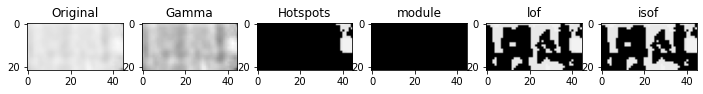

4560.jpg Junction-Box-Error
167.jpg Normal
1395.jpg Normal
601.jpg Multi-Hotspots


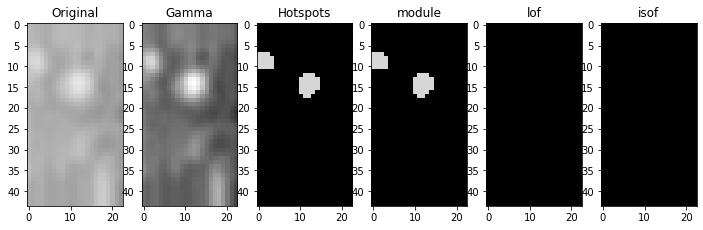

99.jpg Normal
3582.jpg Normal
2844.jpg Normal
2688.jpg Normal
3596.jpg Normal
2850.jpg Normal
615.jpg Normal
1381.jpg Normal
173.jpg Normal
2878.jpg Normal
629.jpg Normal
1154.jpg Normal
5332.jpg Normal
3743.jpg Normal
3025.jpg Normal
5454.jpg Junction-Box-Error
4992.jpg Junction-Box-Error
1632.jpg Junction-Box-Error
1626.jpg Normal
3031.jpg Normal
5440.jpg Junction-Box-Error
4986.jpg Junction-Box-Error
2449.jpg Junction-Box-Error
5326.jpg Junction-Box-Error
4038.jpg Normal
3757.jpg Normal
1140.jpg Normal
2461.jpg Normal
4010.jpg Normal
1168.jpg Normal
3019.jpg Normal
4776.jpg Normal
5468.jpg Normal
2307.jpg Normal
4762.jpg Junction-Box-Error
2313.jpg Normal
2475.jpg Normal
4004.jpg Normal
3780.jpg Normal
3958.jpg Junction-Box-Error
403.jpg Normal
1197.jpg Normal
1829.jpg Normal
365.jpg Normal
5497.jpg Normal
4951.jpg Normal
4789.jpg Junction-Box-Error
5483.jpg Junction-Box-Error
4945.jpg Junction-Box-Error
371.jpg Normal
1183.jpg Normal
417.jpg Normal
3794.jpg Normal
3964.jpg Junction

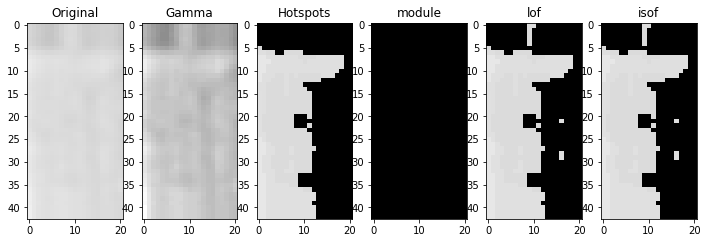

359.jpg Normal
1801.jpg Multi-Hotspots


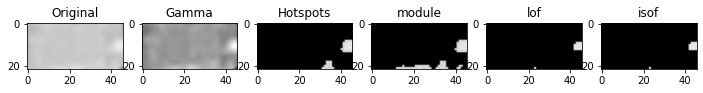

4979.jpg Junction-Box-Error
3970.jpg Junction-Box-Error
1020.jpg Junction-Box-Error
3637.jpg Normal
4158.jpg Normal
5246.jpg Normal
2529.jpg Normal
5520.jpg Junction-Box-Error
3151.jpg Normal
1746.jpg Normal
1752.jpg Junction-Box-Error
5534.jpg Normal
3145.jpg Normal
3623.jpg Normal
5252.jpg Normal
1034.jpg Normal
4164.jpg Junction-Box-Error
2515.jpg Normal
588.jpg Junction-Box-Error
2273.jpg Normal
4602.jpg Normal
2267.jpg Normal
5508.jpg Normal
4616.jpg Normal
3179.jpg Multi-Hotspots


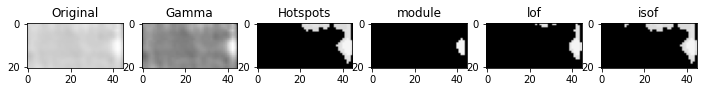

1008.jpg Normal
4170.jpg Junction-Box-Error
2501.jpg Normal
5285.jpg Junction-Box-Error
577.jpg Normal
211.jpg Normal
1785.jpg Normal
3192.jpg Normal
4825.jpg Junction-Box-Error
3186.jpg Normal
4831.jpg Junction-Box-Error
2298.jpg Normal
1791.jpg Junction-Box-Error
205.jpg Normal
1949.jpg Junction-Box-Error
563.jpg Normal
5291.jpg Junction-Box-Error
3838.jpg Normal
3810.jpg Normal
4819.jpg Normal
1961.jpg Normal
239.jpg Normal
1975.jpg Normal
3804.jpg Normal
1544.jpg Normal
3353.jpg Normal
5044.jpg Junction-Box-Error
3435.jpg Normal
1222.jpg Normal
1236.jpg Normal
5050.jpg Normal
3421.jpg Normal
3347.jpg Normal
4428.jpg Junction-Box-Error
2059.jpg Normal
1550.jpg Normal
4400.jpg Junction-Box-Error
2071.jpg Junction-Box-Error
1578.jpg Normal
952.jpg Normal
2717.jpg Junction-Box-Error
5078.jpg Normal
4366.jpg Normal
3409.jpg Junction-Box-Error
2703.jpg Normal
4372.jpg Normal
946.jpg Multi-Hotspots


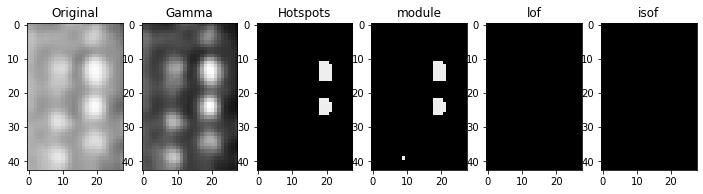

4414.jpg Normal
2065.jpg Normal
3390.jpg Normal
1587.jpg Normal
775.jpg Normal
2930.jpg Normal
4399.jpg Normal
5087.jpg Junction-Box-Error
2924.jpg Normal
5093.jpg Junction-Box-Error
761.jpg Normal
1593.jpg Normal
3384.jpg Normal
749.jpg Junction-Box-Error
991.jpg Normal
985.jpg Normal
2918.jpg Normal
2919.jpg Normal
984.jpg Multi-Hotspots


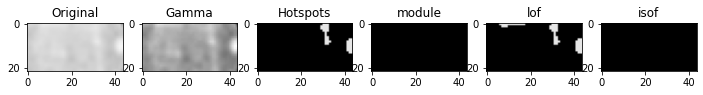

990.jpg Normal
748.jpg Normal
760.jpg Junction-Box-Error
5092.jpg Normal
2925.jpg Normal
3385.jpg Normal
1592.jpg Single-Hotspot


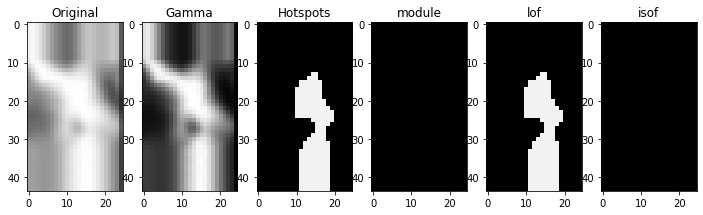

1586.jpg Junction-Box-Error
3391.jpg Normal
5086.jpg Junction-Box-Error
4398.jpg Normal
2931.jpg Normal
774.jpg Junction-Box-Error
947.jpg Normal
4373.jpg Normal
2702.jpg Normal
2064.jpg Normal
4415.jpg Normal
1579.jpg Junction-Box-Error
2070.jpg Normal
4401.jpg Junction-Box-Error
3408.jpg Normal
4367.jpg Normal
5079.jpg Normal
2716.jpg Normal
953.jpg Normal
3420.jpg Normal
5051.jpg Normal
1237.jpg Normal
1551.jpg Junction-Box-Error
2058.jpg Normal
4429.jpg Normal
3346.jpg Normal
3352.jpg Normal
1545.jpg Junction-Box-Error
1223.jpg Normal
3434.jpg Normal
5045.jpg Normal
1974.jpg Normal
238.jpg Junction-Box-Error
3805.jpg Normal
3811.jpg Normal
1960.jpg Normal
4818.jpg Junction-Box-Error
1948.jpg Normal
204.jpg Normal
1790.jpg Normal
2299.jpg Normal
4830.jpg Junction-Box-Error
3187.jpg Normal
3839.jpg Junction-Box-Error
5290.jpg Junction-Box-Error
562.jpg Junction-Box-Error
576.jpg Normal
5284.jpg Junction-Box-Error
4824.jpg Normal
3193.jpg Normal
1784.jpg Junction-Box-Error
210.jpg Jun

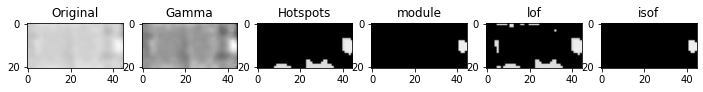

5535.jpg Junction-Box-Error
1753.jpg Normal
1035.jpg Normal
5253.jpg Normal
3622.jpg Normal
2528.jpg Normal
5247.jpg Junction-Box-Error
4159.jpg Normal
3636.jpg Normal
1021.jpg Normal
1747.jpg Multi-Hotspots


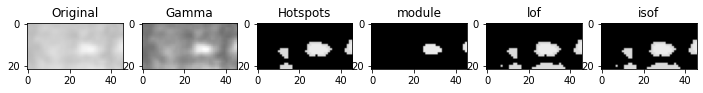

3150.jpg Normal
5521.jpg Junction-Box-Error
4978.jpg Normal
1800.jpg Normal
3971.jpg Multi-Hotspots


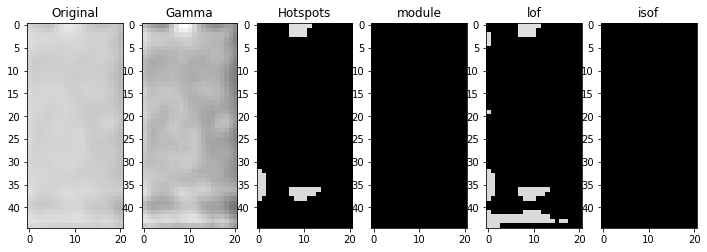

3965.jpg Normal
358.jpg Normal
1814.jpg Normal
370.jpg Junction-Box-Error
4944.jpg Normal
5482.jpg Normal
3795.jpg Normal
416.jpg Junction-Box-Error
1182.jpg Junction-Box-Error
1196.jpg Junction-Box-Error
402.jpg Normal
3959.jpg Normal
3781.jpg Normal
4788.jpg Normal
4950.jpg Junction-Box-Error
5496.jpg Junction-Box-Error
364.jpg Normal
1828.jpg Junction-Box-Error
2312.jpg Normal
4763.jpg Normal
4005.jpg Normal
2474.jpg Normal
1169.jpg Normal
4011.jpg Junction-Box-Error
2460.jpg Normal
2306.jpg Junction-Box-Error
5469.jpg Junction-Box-Error
4777.jpg Normal
3018.jpg Junction-Box-Error
4987.jpg Normal
5441.jpg Junction-Box-Error
3030.jpg Single-Hotspot


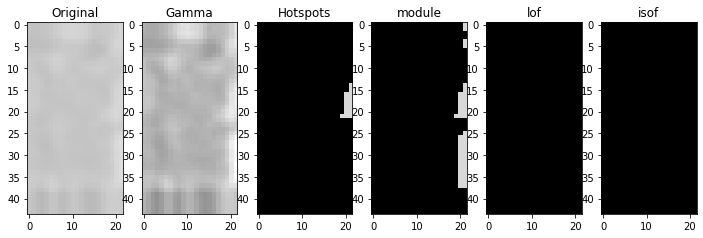

1627.jpg Junction-Box-Error
1141.jpg Normal
3756.jpg Normal
4039.jpg Normal
5327.jpg Junction-Box-Error
2448.jpg Normal
3742.jpg Normal
5333.jpg Junction-Box-Error
1155.jpg Normal
1633.jpg Normal
4993.jpg Junction-Box-Error
5455.jpg Normal
3024.jpg Normal
628.jpg Normal
2879.jpg Junction-Box-Error
1380.jpg Normal
614.jpg Normal
2851.jpg Normal
3597.jpg Normal
2689.jpg Normal
172.jpg Junction-Box-Error
166.jpg Junction-Box-Error
2845.jpg Junction-Box-Error
3583.jpg Normal
98.jpg Normal
600.jpg Normal
1394.jpg Normal
833.jpg Normal
73.jpg Normal
2676.jpg Junction-Box-Error
5119.jpg Junction-Box-Error
4207.jpg Normal
3568.jpg Normal
4561.jpg Normal
2110.jpg Normal
1419.jpg Normal
199.jpg Junction-Box-Error
4575.jpg Junction-Box-Error
2104.jpg Normal
2662.jpg Normal
4213.jpg Normal
827.jpg Normal
67.jpg Junction-Box-Error
5125.jpg Normal
2892.jpg Normal
3554.jpg Normal
1343.jpg Normal
1425.jpg Normal
3232.jpg Normal
9.jpg Junction-Box-Error
3226.jpg Normal
4549.jpg Junction-Box-Error
2138.

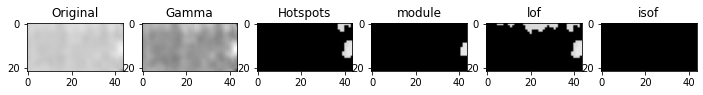

5624.jpg Normal
3255.jpg Normal
883.jpg Junction-Box-Error
897.jpg Normal
129.jpg Multi-Hotspots


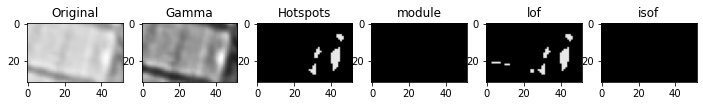

1495.jpg Normal
101.jpg Normal
3282.jpg Normal
5195.jpg Normal
2822.jpg Normal
667.jpg Normal
673.jpg Normal
5181.jpg Normal
2836.jpg Normal
3296.jpg Normal
2188.jpg Normal
115.jpg Junction-Box-Error
1481.jpg Normal
5368.jpg Junction-Box-Error
2407.jpg Normal
3719.jpg Normal
4076.jpg Normal
2361.jpg Normal
1668.jpg Normal
4704.jpg Junction-Box-Error
2375.jpg Normal
2413.jpg Normal
4062.jpg Normal
5354.jpg Junction-Box-Error
3725.jpg Normal
1132.jpg Normal
1654.jpg Normal
3043.jpg Normal
5432.jpg Normal
4738.jpg Normal
3057.jpg Normal
2349.jpg Normal
5426.jpg Normal
1640.jpg Normal
1898.jpg Normal
1126.jpg Normal
5340.jpg Normal
3731.jpg Normal
3902.jpg Single-Hotspot


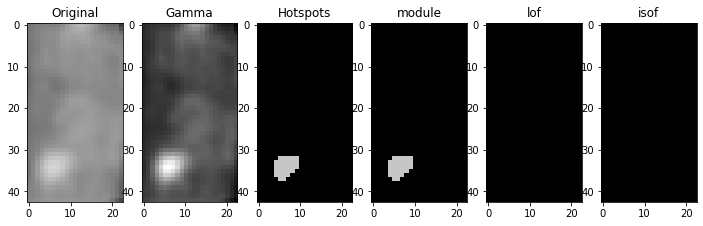

459.jpg Normal
1873.jpg Normal
1867.jpg Normal
3916.jpg Normal
465.jpg Normal
4089.jpg Junction-Box-Error
5397.jpg Junction-Box-Error
4937.jpg Junction-Box-Error
3080.jpg Normal
303.jpg Single-Hotspot


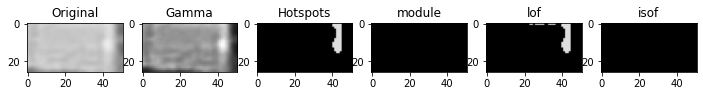

1697.jpg Normal
1683.jpg Normal
317.jpg Normal
4923.jpg Junction-Box-Error
3094.jpg Normal
5383.jpg Junction-Box-Error
471.jpg Junction-Box-Error
4102.jpg Normal
2573.jpg Normal
2215.jpg Normal
4664.jpg Normal
288.jpg Normal
1708.jpg Junction-Box-Error
2201.jpg Normal
4670.jpg Normal
4116.jpg Normal
3679.jpg Normal
2567.jpg Normal
5208.jpg Normal
3651.jpg Normal
3889.jpg Normal
5220.jpg Junction-Box-Error
1046.jpg Normal
1720.jpg Normal
5546.jpg Junction-Box-Error
2229.jpg Normal
4880.jpg Junction-Box-Error
3137.jpg Normal
4658.jpg Normal
5552.jpg Junction-Box-Error
4894.jpg Junction-Box-Error
3123.jpg Junction-Box-Error
1734.jpg Normal
1052.jpg Normal
3645.jpg Normal
5234.jpg Junction-Box-Error
3876.jpg Normal
1907.jpg Multi-Hotspots


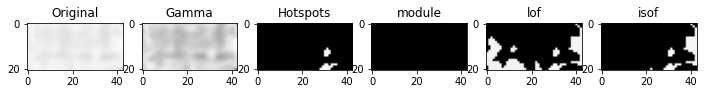

1913.jpg Normal
539.jpg Normal
3862.jpg Normal
511.jpg Normal
1085.jpg Normal
3692.jpg Normal
4843.jpg Normal
277.jpg Normal
263.jpg Normal
5591.jpg Normal
4857.jpg Normal
2598.jpg Normal
3686.jpg Normal
1091.jpg Normal
505.jpg Single-Hotspot


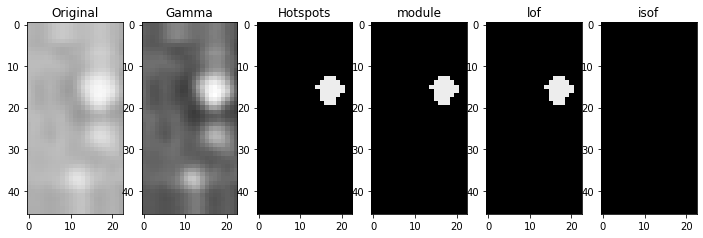

4466.jpg Normal
3309.jpg Junction-Box-Error
2017.jpg Junction-Box-Error
2771.jpg Normal
4300.jpg Junction-Box-Error
934.jpg Junction-Box-Error
1278.jpg Normal
920.jpg Normal
2765.jpg Junction-Box-Error
4314.jpg Normal
2003.jpg Normal
3335.jpg Normal
1522.jpg Junction-Box-Error
908.jpg Normal
1244.jpg Normal
3453.jpg Normal
2995.jpg Normal
5036.jpg Junction-Box-Error
2759.jpg Normal
3447.jpg Normal
4328.jpg Normal
2981.jpg Normal
1250.jpg Normal
1536.jpg Junction-Box-Error
3321.jpg Normal
4499.jpg Junction-Box-Error
3490.jpg Normal
2956.jpg Junction-Box-Error
1287.jpg Normal
713.jpg Normal
707.jpg Normal
1293.jpg Normal
3484.jpg Normal
2942.jpg Normal
2943.jpg Normal
3485.jpg Normal
1292.jpg Normal
706.jpg Normal
4498.jpg Junction-Box-Error
712.jpg Junction-Box-Error
1286.jpg Normal
2957.jpg Junction-Box-Error
3491.jpg Normal
1251.jpg Normal
2980.jpg Normal
4329.jpg Junction-Box-Error
3446.jpg Normal
2758.jpg Junction-Box-Error
5037.jpg Junction-Box-Error
3320.jpg Normal
1537.jpg Normal

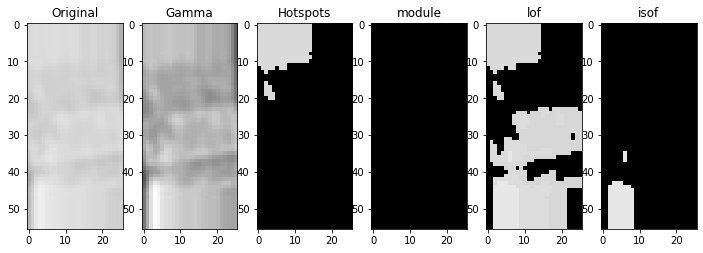

5023.jpg Junction-Box-Error
1245.jpg Normal
909.jpg Normal
4315.jpg Junction-Box-Error
2764.jpg Normal
921.jpg Normal
2002.jpg Normal
4473.jpg Normal
2016.jpg Normal
3308.jpg Normal
4467.jpg Normal
1279.jpg Junction-Box-Error
935.jpg Normal
4301.jpg Normal
2770.jpg Normal
4856.jpg Junction-Box-Error
5590.jpg Junction-Box-Error
262.jpg Normal
504.jpg Normal
1090.jpg Normal
3687.jpg Normal
2599.jpg Normal
3693.jpg Normal
1084.jpg Normal
510.jpg Normal
276.jpg Normal
4842.jpg Junction-Box-Error
5584.jpg Normal
1912.jpg Normal
3863.jpg Junction-Box-Error
538.jpg Normal
3877.jpg Normal
1906.jpg Junction-Box-Error
1735.jpg Normal
3122.jpg Normal
4895.jpg Junction-Box-Error
5553.jpg Normal
5235.jpg Junction-Box-Error
3644.jpg Normal
1053.jpg Normal
1047.jpg Normal
5221.jpg Junction-Box-Error
3888.jpg Normal
3650.jpg Normal
4659.jpg Normal
3136.jpg Normal
4881.jpg Normal
2228.jpg Normal
5547.jpg Junction-Box-Error
1721.jpg Junction-Box-Error
4671.jpg Normal
2200.jpg Normal
1709.jpg Normal
5209

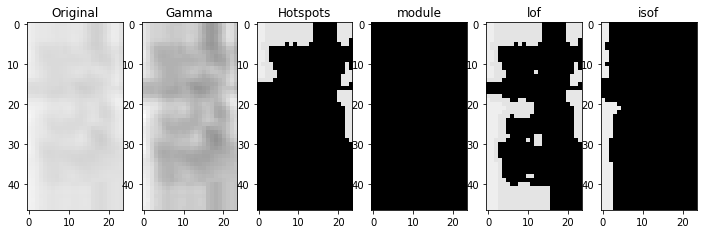

4665.jpg Normal
2214.jpg Junction-Box-Error
3095.jpg Normal
4922.jpg Junction-Box-Error
316.jpg Normal
1682.jpg Normal
470.jpg Normal
5382.jpg Junction-Box-Error
5396.jpg Normal
4088.jpg Junction-Box-Error
464.jpg Normal
1696.jpg Normal
302.jpg Normal
3081.jpg Multi-Hotspots


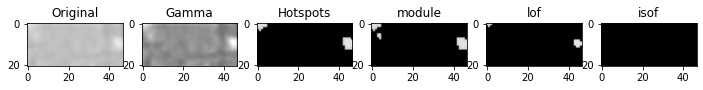

4936.jpg Normal
1866.jpg Normal
3917.jpg Normal
458.jpg Junction-Box-Error
3903.jpg Normal
1872.jpg Normal
1899.jpg Normal
1641.jpg Normal
5427.jpg Junction-Box-Error
2348.jpg Normal
3056.jpg Normal
4739.jpg Normal
3730.jpg Normal
5341.jpg Junction-Box-Error
1127.jpg Normal
1133.jpg Normal
3724.jpg Normal
5355.jpg Junction-Box-Error
5433.jpg Junction-Box-Error
3042.jpg Normal
1655.jpg Normal
2374.jpg Normal
4705.jpg Junction-Box-Error
4063.jpg Normal
2412.jpg Normal
4077.jpg Junction-Box-Error
3718.jpg Normal
2406.jpg Normal
5369.jpg Normal
1669.jpg Normal
2360.jpg Normal
4711.jpg Normal
2837.jpg Junction-Box-Error
5180.jpg Junction-Box-Error
672.jpg Junction-Box-Error
1480.jpg Junction-Box-Error
114.jpg Junction-Box-Error
2189.jpg Normal
3297.jpg Normal
3283.jpg Junction-Box-Error
1494.jpg Junction-Box-Error
666.jpg Junction-Box-Error
2823.jpg Normal
5194.jpg Normal
896.jpg Normal
128.jpg Junction-Box-Error
882.jpg Normal
869.jpg Normal
1325.jpg Normal
29.jpg Junction-Box-Error
5143.j

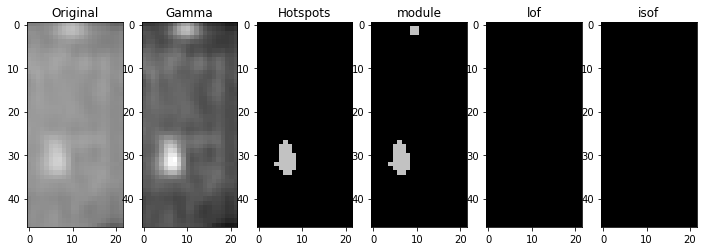

2162.jpg Normal
841.jpg Normal
699.jpg Normal
2604.jpg Normal
4275.jpg Normal
2174.jpg Normal
4505.jpg Junction-Box-Error
17.jpg Junction-Box-Error
857.jpg Normal
4263.jpg Normal
2612.jpg Normal
4277.jpg Normal
3518.jpg Normal
2606.jpg Junction-Box-Error
843.jpg Normal
1469.jpg Normal
2160.jpg Normal
4511.jpg Normal
1441.jpg Normal
5627.jpg Normal
2148.jpg Normal
3256.jpg Normal
4539.jpg Normal
3530.jpg Normal
5141.jpg Normal
1327.jpg Junction-Box-Error
1333.jpg Normal
3524.jpg Normal
5155.jpg Normal
5633.jpg Normal
3242.jpg Junction-Box-Error
1455.jpg Junction-Box-Error
2809.jpg Normal
894.jpg Normal
880.jpg Normal
658.jpg Normal
3295.jpg Normal
116.jpg Junction-Box-Error
1482.jpg Junction-Box-Error
670.jpg Normal
5182.jpg Normal
2835.jpg Normal
5196.jpg Junction-Box-Error
2821.jpg Normal
4288.jpg Normal
664.jpg Junction-Box-Error
1496.jpg Normal
102.jpg Normal
3281.jpg Normal
2410.jpg Normal
4061.jpg Junction-Box-Error
1119.jpg Single-Hotspot


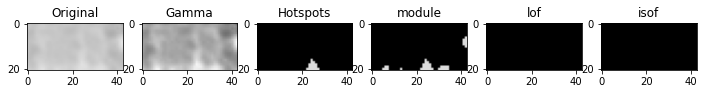

4707.jpg Normal
3068.jpg Normal
2376.jpg Normal
5419.jpg Junction-Box-Error
4713.jpg Junction-Box-Error
2362.jpg Normal
499.jpg Junction-Box-Error
2404.jpg Junction-Box-Error
4075.jpg Normal
1125.jpg Normal
5343.jpg Junction-Box-Error
3732.jpg Multi-Hotspots


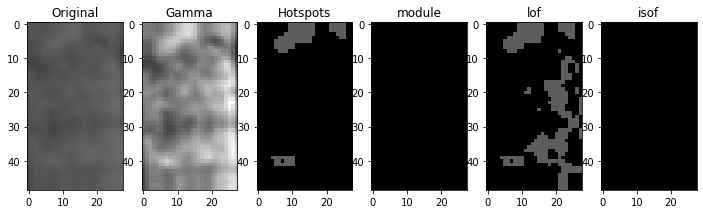

3054.jpg Normal
5425.jpg Junction-Box-Error
1643.jpg Normal
1657.jpg Normal
3040.jpg Normal
5431.jpg Junction-Box-Error
5357.jpg Junction-Box-Error
2438.jpg Junction-Box-Error
3726.jpg Normal
4049.jpg Normal
1131.jpg Normal
3915.jpg Junction-Box-Error
1864.jpg Junction-Box-Error
328.jpg Normal
1870.jpg Normal
4908.jpg Normal
3901.jpg Normal
5380.jpg Normal
3929.jpg Normal
472.jpg Normal
1858.jpg Normal
1680.jpg Junction-Box-Error
314.jpg Normal
4920.jpg Normal
2389.jpg Normal
3097.jpg Junction-Box-Error
4934.jpg Junction-Box-Error
3083.jpg Normal
300.jpg Normal
1694.jpg Junction-Box-Error
466.jpg Normal
5394.jpg Junction-Box-Error
4115.jpg Junction-Box-Error
2564.jpg Normal
2202.jpg Normal
4673.jpg Normal
5579.jpg Junction-Box-Error
2216.jpg Normal
3108.jpg Normal
4667.jpg Normal
1079.jpg Junction-Box-Error
4101.jpg Normal
2570.jpg Junction-Box-Error
1051.jpg Normal
4129.jpg Multi-Hotspots


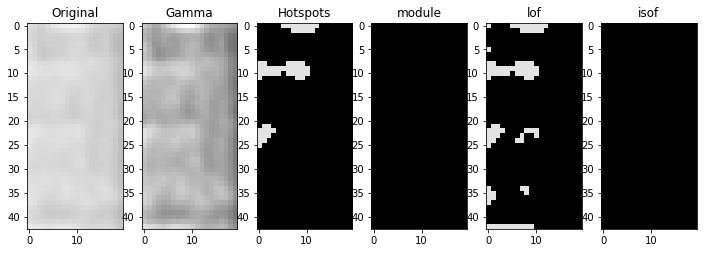

3646.jpg Normal
2558.jpg Normal
5237.jpg Junction-Box-Error
5551.jpg Normal
4897.jpg Junction-Box-Error
3120.jpg Junction-Box-Error
1737.jpg Multi-Hotspots


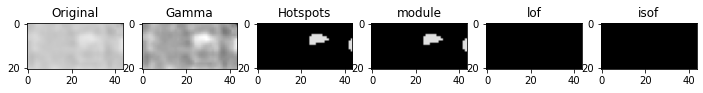

1723.jpg Normal
5545.jpg Junction-Box-Error
4883.jpg Junction-Box-Error
3134.jpg Normal
3652.jpg Normal
5223.jpg Junction-Box-Error
1045.jpg Normal
3861.jpg Normal
4868.jpg Normal
1910.jpg Normal
248.jpg Normal
1904.jpg Junction-Box-Error
3875.jpg Normal
3685.jpg Normal
1092.jpg Normal
506.jpg Junction-Box-Error
260.jpg Normal
5592.jpg Junction-Box-Error
4854.jpg Normal
4698.jpg Normal
5586.jpg Junction-Box-Error
4840.jpg Junction-Box-Error
274.jpg Normal
1938.jpg Normal
512.jpg Normal
1086.jpg Normal
3849.jpg Normal
3691.jpg Normal
4471.jpg Junction-Box-Error
2000.jpg Normal
1509.jpg Junction-Box-Error
923.jpg Normal
5009.jpg Normal
2766.jpg Junction-Box-Error
3478.jpg Normal
4317.jpg Normal
2772.jpg Single-Hotspot


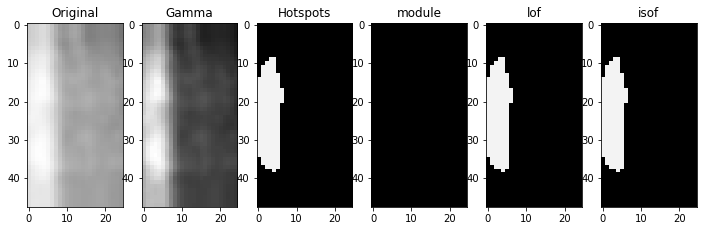

4303.jpg Normal
937.jpg Normal
4465.jpg Normal
2014.jpg Normal
1535.jpg Normal
3322.jpg Normal
5035.jpg Normal
3444.jpg Normal
2982.jpg Normal
1253.jpg Normal
1247.jpg Normal
5021.jpg Normal
3450.jpg Normal
2996.jpg Normal
4459.jpg Junction-Box-Error
3336.jpg Normal
2028.jpg Junction-Box-Error
1521.jpg Junction-Box-Error
738.jpg Junction-Box-Error
2969.jpg Junction-Box-Error
704.jpg Normal
1290.jpg Normal
3487.jpg Normal
2941.jpg Normal
2799.jpg Normal
3493.jpg Normal
2955.jpg Junction-Box-Error
1284.jpg Junction-Box-Error
710.jpg Junction-Box-Error
711.jpg Junction-Box-Error
1285.jpg Junction-Box-Error
2954.jpg Normal
3492.jpg Normal
2798.jpg Junction-Box-Error
2940.jpg Junction-Box-Error
3486.jpg Normal
1291.jpg Normal
705.jpg Junction-Box-Error
2968.jpg Normal
739.jpg Normal
2997.jpg Normal
3451.jpg Normal
5020.jpg Junction-Box-Error
1246.jpg Normal
1520.jpg Normal
2029.jpg Junction-Box-Error
3337.jpg Normal
4458.jpg Junction-Box-Error
3323.jpg Normal
1534.jpg Junction-Box-Error
125

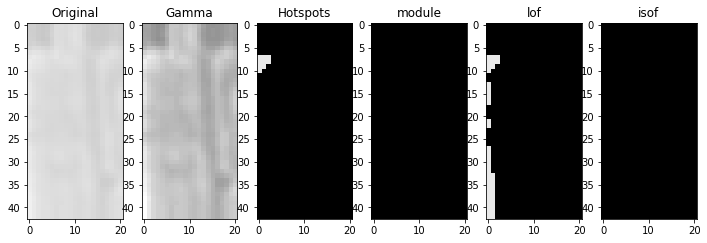

4316.jpg Junction-Box-Error
3479.jpg Normal
2767.jpg Normal
5008.jpg Normal
922.jpg Normal
1939.jpg Junction-Box-Error
275.jpg Normal
4841.jpg Junction-Box-Error
5587.jpg Junction-Box-Error
4699.jpg Normal
3690.jpg Normal
3848.jpg Normal
1087.jpg Normal
513.jpg Normal
507.jpg Normal
1093.jpg Normal
3684.jpg Normal
4855.jpg Normal
5593.jpg Normal
261.jpg Junction-Box-Error
1905.jpg Normal
249.jpg Normal
3874.jpg Normal
3860.jpg Normal
1911.jpg Normal
4869.jpg Junction-Box-Error
3135.jpg Normal
4882.jpg Junction-Box-Error
5544.jpg Junction-Box-Error
1722.jpg Normal
1044.jpg Normal
5222.jpg Junction-Box-Error
3653.jpg Normal
5236.jpg Normal
2559.jpg Normal
3647.jpg Normal
4128.jpg Normal
1050.jpg Junction-Box-Error
1736.jpg Normal
3121.jpg Junction-Box-Error
4896.jpg Junction-Box-Error
5550.jpg Normal
4666.jpg Normal
3109.jpg Normal
2217.jpg Junction-Box-Error
5578.jpg Junction-Box-Error
2571.jpg Junction-Box-Error
4100.jpg Normal
1078.jpg Normal
2565.jpg Normal
4114.jpg Normal
4672.jpg J

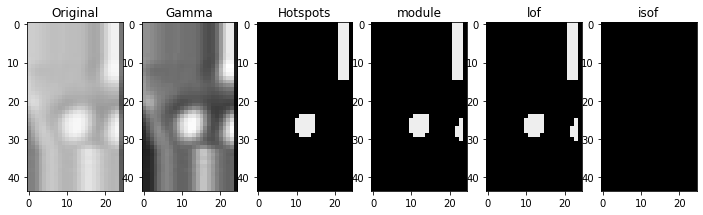

3082.jpg Normal
4935.jpg Junction-Box-Error
5395.jpg Normal
467.jpg Normal
473.jpg Normal
3928.jpg Normal
5381.jpg Junction-Box-Error
3096.jpg Normal
2388.jpg Normal
4921.jpg Junction-Box-Error
315.jpg Normal
1681.jpg Normal
1859.jpg Normal
4909.jpg Normal
1871.jpg Normal
3900.jpg Normal
3914.jpg Normal
329.jpg Junction-Box-Error
1865.jpg Normal
5430.jpg Junction-Box-Error
3041.jpg Junction-Box-Error
1656.jpg Junction-Box-Error
1130.jpg Normal
4048.jpg Normal
3727.jpg Normal
2439.jpg Normal
5356.jpg Normal
3733.jpg Normal
5342.jpg Normal
1124.jpg Normal
1642.jpg Normal
5424.jpg Normal
3055.jpg Junction-Box-Error
2363.jpg Junction-Box-Error
4712.jpg Junction-Box-Error
4074.jpg Normal
2405.jpg Normal
498.jpg Junction-Box-Error
1118.jpg Junction-Box-Error
4060.jpg Normal
2411.jpg Normal
5418.jpg Junction-Box-Error
2377.jpg Normal
3069.jpg Normal
4706.jpg Normal
665.jpg Normal
4289.jpg Junction-Box-Error
2820.jpg Normal
5197.jpg Normal
3280.jpg Normal
103.jpg Junction-Box-Error
1497.jpg No

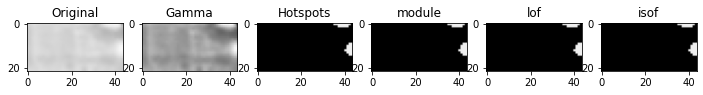

2149.jpg Normal
5626.jpg Normal
1440.jpg Junction-Box-Error
1326.jpg Normal
5140.jpg Junction-Box-Error
3531.jpg Normal
842.jpg Normal
5168.jpg Normal
2607.jpg Normal
3519.jpg Normal
4276.jpg Junction-Box-Error
4510.jpg Normal
2161.jpg Normal
1468.jpg Junction-Box-Error
4504.jpg Normal
2175.jpg Normal
2613.jpg Junction-Box-Error
4262.jpg Junction-Box-Error
856.jpg Normal
16.jpg Normal
3535.jpg Normal
5144.jpg Normal
1322.jpg Junction-Box-Error
1444.jpg Normal
5622.jpg Normal
3253.jpg Normal
2159.jpg Normal
5636.jpg Multi-Hotspots


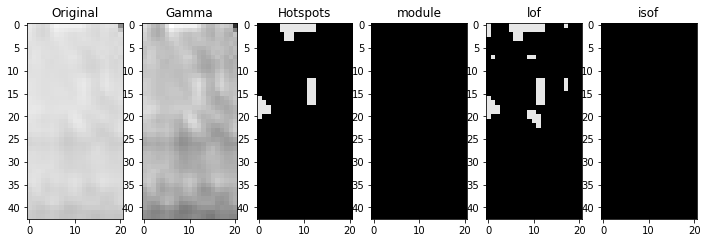

4528.jpg Junction-Box-Error
3247.jpg Normal
1450.jpg Normal
1336.jpg Normal
3521.jpg Normal
5150.jpg Normal
12.jpg Normal
852.jpg Normal
3509.jpg Normal
4266.jpg Normal
5178.jpg Junction-Box-Error
2617.jpg Junction-Box-Error
2171.jpg Normal
4500.jpg Single-Hotspot


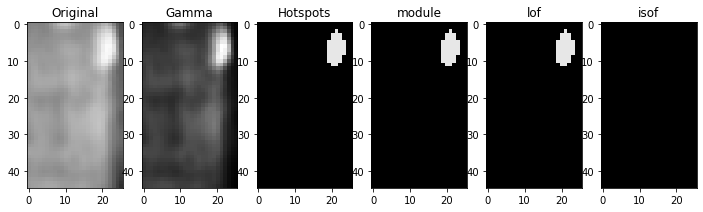

1478.jpg Normal
2165.jpg Normal
4514.jpg Normal
4272.jpg Junction-Box-Error
2603.jpg Normal
846.jpg Normal
675.jpg Normal
5187.jpg Normal
2830.jpg Normal
4299.jpg Normal
3290.jpg Normal
113.jpg Junction-Box-Error
1487.jpg Normal
1493.jpg Junction-Box-Error
107.jpg Junction-Box-Error
3284.jpg Normal
5193.jpg Junction-Box-Error
2824.jpg Normal
661.jpg Normal
891.jpg Normal
649.jpg Normal
885.jpg Normal
2818.jpg Normal
3051.jpg Normal
1646.jpg Junction-Box-Error
1120.jpg Normal
2429.jpg Normal
5346.jpg Junction-Box-Error
4058.jpg Normal
3737.jpg Normal
5352.jpg Junction-Box-Error
3723.jpg Normal
1134.jpg Normal
1652.jpg Junction-Box-Error
3045.jpg Junction-Box-Error
5434.jpg Junction-Box-Error
4702.jpg Normal
2373.jpg Junction-Box-Error
2415.jpg Normal
4064.jpg Normal
488.jpg Normal
1108.jpg Normal
2401.jpg Junction-Box-Error
4070.jpg Normal
3079.jpg Junction-Box-Error
4716.jpg Normal
5408.jpg Junction-Box-Error
2367.jpg Junction-Box-Error
1685.jpg Normal
311.jpg Normal
4925.jpg Junction-

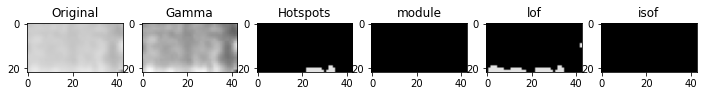

5391.jpg Junction-Box-Error
3938.jpg Junction-Box-Error
4931.jpg Junction-Box-Error
2398.jpg Normal
3086.jpg Normal
1849.jpg Junction-Box-Error
305.jpg Normal
1691.jpg Junction-Box-Error
4919.jpg Junction-Box-Error
1861.jpg Normal
3910.jpg Normal
3904.jpg Normal
1875.jpg Normal
339.jpg Normal
4892.jpg Junction-Box-Error
5554.jpg Normal
3125.jpg Normal
1732.jpg Normal
1054.jpg Normal
3643.jpg Normal
5232.jpg Multi-Hotspots


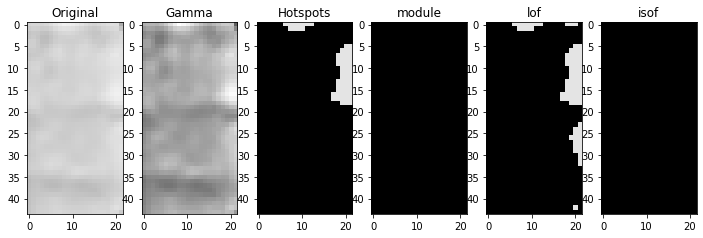

3657.jpg Normal
4138.jpg Normal
5226.jpg Normal
2549.jpg Normal
1040.jpg Normal
1726.jpg Normal
4886.jpg Normal
5540.jpg Junction-Box-Error
3131.jpg Junction-Box-Error
2207.jpg Normal
5568.jpg Junction-Box-Error
4676.jpg Normal
3119.jpg Normal
4110.jpg Normal
2561.jpg Junction-Box-Error
1068.jpg Normal
4104.jpg Junction-Box-Error
2575.jpg Normal
2213.jpg Junction-Box-Error
4662.jpg Junction-Box-Error
265.jpg Normal
1929.jpg Normal
4689.jpg Normal
4851.jpg Junction-Box-Error
5597.jpg Normal
3858.jpg Normal
3680.jpg Single-Hotspot


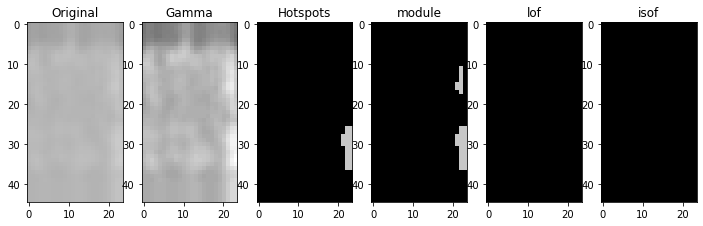

1097.jpg Normal
503.jpg Normal
517.jpg Normal
1083.jpg Normal
3694.jpg Normal
4845.jpg Junction-Box-Error
5583.jpg Junction-Box-Error
271.jpg Normal
259.jpg Junction-Box-Error
1915.jpg Normal
3864.jpg Normal
3870.jpg Normal
1901.jpg Normal
4879.jpg Junction-Box-Error
5030.jpg Normal
2987.jpg Normal
3441.jpg Normal
1256.jpg Junction-Box-Error
1530.jpg Junction-Box-Error
3327.jpg Normal
4448.jpg Normal
2039.jpg Normal
3333.jpg Normal
1524.jpg Junction-Box-Error
1242.jpg Normal
5024.jpg Normal
2993.jpg Normal
3455.jpg Normal
926.jpg Normal
2763.jpg Multi-Hotspots


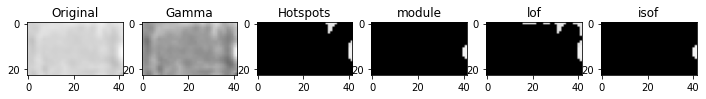

4312.jpg Junction-Box-Error
4474.jpg Normal
2005.jpg Junction-Box-Error
1518.jpg Normal
4460.jpg Single-Hotspot


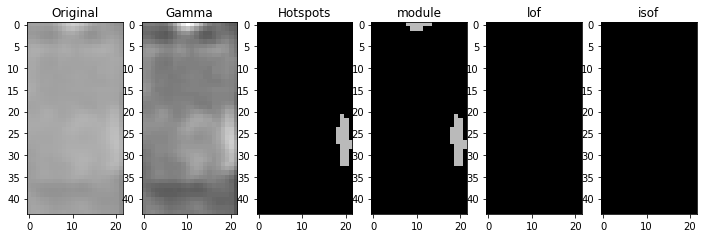

2011.jpg Normal
2777.jpg Junction-Box-Error
5018.jpg Junction-Box-Error
4306.jpg Normal
3469.jpg Normal
932.jpg Normal
701.jpg Normal
1295.jpg Normal
2944.jpg Normal
3482.jpg Normal
2950.jpg Junction-Box-Error
3496.jpg Multi-Hotspots


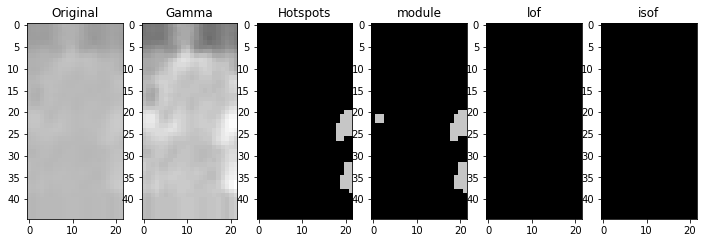

2788.jpg Normal
1281.jpg Normal
715.jpg Normal
2978.jpg Junction-Box-Error
729.jpg Junction-Box-Error
728.jpg Single-Hotspot


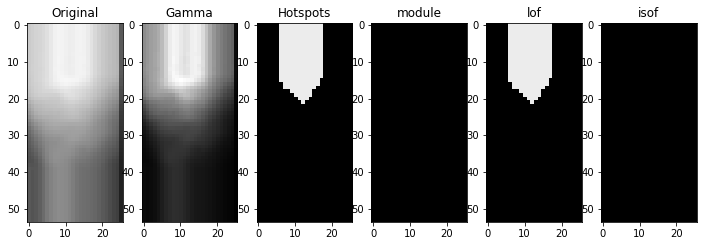

2979.jpg Normal
714.jpg Junction-Box-Error
1280.jpg Normal
2789.jpg Junction-Box-Error
3497.jpg Normal
2951.jpg Junction-Box-Error
3483.jpg Normal
2945.jpg Normal
1294.jpg Normal
700.jpg Normal
2010.jpg Normal
4461.jpg Junction-Box-Error
1519.jpg Multi-Hotspots


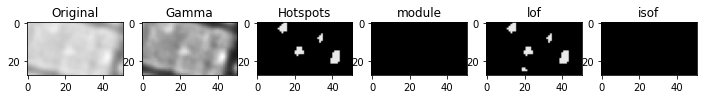

933.jpg Normal
3468.jpg Normal
4307.jpg Junction-Box-Error
5019.jpg Junction-Box-Error
2776.jpg Normal
4313.jpg Normal
2762.jpg Normal
927.jpg Junction-Box-Error
2004.jpg Normal
4475.jpg Junction-Box-Error
1525.jpg Junction-Box-Error
3332.jpg Junction-Box-Error
3454.jpg Normal
2992.jpg Normal
5025.jpg Normal
1243.jpg Junction-Box-Error
1257.jpg Junction-Box-Error
3440.jpg Normal
2986.jpg Junction-Box-Error
5031.jpg Normal
2038.jpg Normal
4449.jpg Normal
3326.jpg Junction-Box-Error
1531.jpg Junction-Box-Error
3871.jpg Normal
4878.jpg Normal
1900.jpg Normal
1914.jpg Normal
258.jpg Normal
3865.jpg Normal
3695.jpg Multi-Hotspots


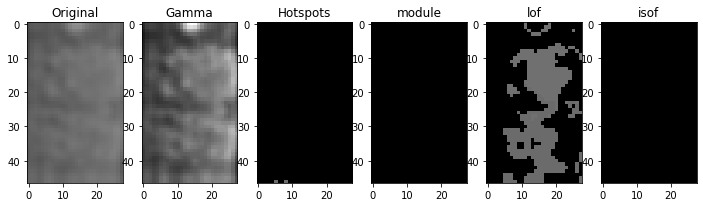

1082.jpg Normal
516.jpg Normal
270.jpg Single-Hotspot


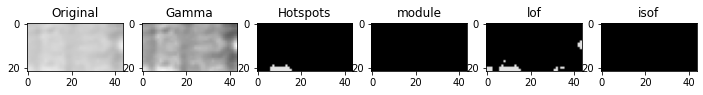

5582.jpg Junction-Box-Error
4844.jpg Junction-Box-Error
5596.jpg Junction-Box-Error
4850.jpg Normal
4688.jpg Single-Hotspot


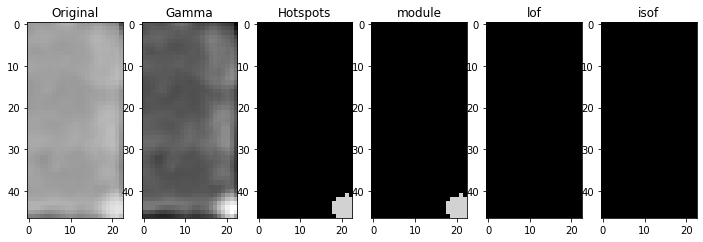

1928.jpg Normal
264.jpg Normal
502.jpg Normal
1096.jpg Normal
3681.jpg Normal
3859.jpg Junction-Box-Error
2574.jpg Junction-Box-Error
4105.jpg Normal
4663.jpg Normal
2212.jpg Normal
3118.jpg Normal
4677.jpg Normal
5569.jpg Junction-Box-Error
2206.jpg Normal
1069.jpg Normal
2560.jpg Normal
4111.jpg Normal
1041.jpg Normal
2548.jpg Normal
5227.jpg Normal
4139.jpg Normal
3656.jpg Normal
3130.jpg Normal
5541.jpg Junction-Box-Error
4887.jpg Junction-Box-Error
1727.jpg Normal
1733.jpg Normal
3124.jpg Normal
5555.jpg Junction-Box-Error
4893.jpg Junction-Box-Error
5233.jpg Normal
3642.jpg Normal
1055.jpg Junction-Box-Error
3905.jpg Normal
338.jpg Normal
1874.jpg Normal
1860.jpg Junction-Box-Error
4918.jpg Junction-Box-Error
3911.jpg Normal
3939.jpg Junction-Box-Error
5390.jpg Junction-Box-Error
462.jpg Junction-Box-Error
1690.jpg Normal
304.jpg Normal
1848.jpg Normal
3087.jpg Normal
2399.jpg Normal
4930.jpg Normal
3093.jpg Normal
4924.jpg Normal
310.jpg Normal
1684.jpg Junction-Box-Error
476.jp

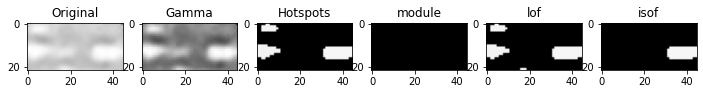

112.jpg Normal
3291.jpg Normal
4515.jpg Junction-Box-Error
2164.jpg Normal
847.jpg Normal
2602.jpg Normal
4273.jpg Normal
2616.jpg Normal
5179.jpg Normal
4267.jpg Normal
3508.jpg Normal
853.jpg Normal
13.jpg Multi-Hotspots


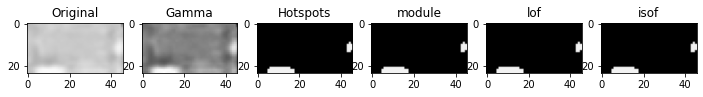

1479.jpg Junction-Box-Error
4501.jpg Normal
2170.jpg Normal
1451.jpg Normal
3246.jpg Normal
4529.jpg Normal
5637.jpg Normal
2158.jpg Normal
5151.jpg Junction-Box-Error
3520.jpg Normal
1337.jpg Normal
1323.jpg Normal
5145.jpg Junction-Box-Error
3534.jpg Normal
3252.jpg Normal
5623.jpg Single-Hotspot


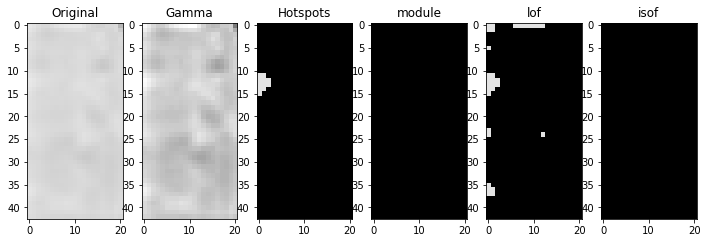

1445.jpg Normal
1335.jpg Single-Hotspot


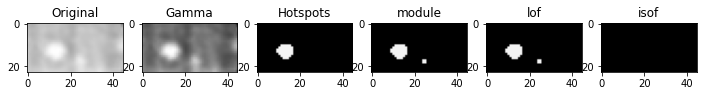

39.jpg Junction-Box-Error
879.jpg Normal
3522.jpg Normal
5153.jpg Normal
5635.jpg Junction-Box-Error
3244.jpg Normal
1453.jpg Normal
1447.jpg Normal
5621.jpg Normal
3250.jpg Normal
3536.jpg Normal
4259.jpg Normal
5147.jpg Cluster-Anomaly


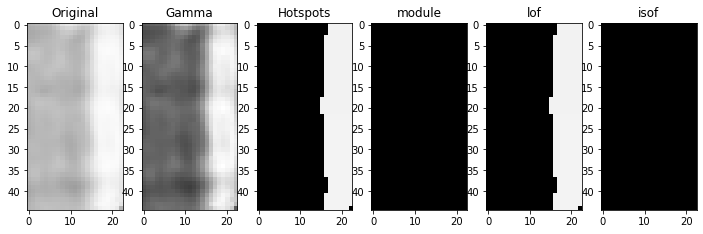

2628.jpg Normal
1321.jpg Normal
4271.jpg Single-Hotspot


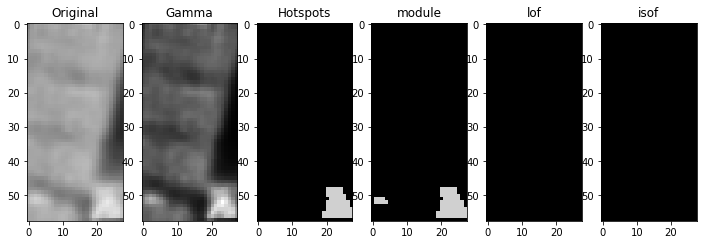

2600.jpg Junction-Box-Error
1309.jpg Normal
845.jpg Normal
2166.jpg Junction-Box-Error
5609.jpg Junction-Box-Error
4517.jpg Normal
3278.jpg Normal
2172.jpg Normal
4503.jpg Normal
689.jpg Normal
11.jpg Junction-Box-Error
851.jpg Normal
4265.jpg Normal
2614.jpg Normal
5190.jpg Normal
2827.jpg Normal
662.jpg Junction-Box-Error
1490.jpg Normal
104.jpg Normal
3287.jpg Normal
2199.jpg Normal
3293.jpg Normal
110.jpg Normal
1484.jpg Normal
676.jpg Normal
5184.jpg Junction-Box-Error
2833.jpg Normal
886.jpg Normal
138.jpg Junction-Box-Error
892.jpg Normal
1651.jpg Junction-Box-Error
1889.jpg Normal
3046.jpg Junction-Box-Error
4729.jpg Junction-Box-Error
5437.jpg Junction-Box-Error
2358.jpg Normal
5351.jpg Junction-Box-Error
3720.jpg Junction-Box-Error
1137.jpg Junction-Box-Error
1123.jpg Junction-Box-Error
5345.jpg Normal
3734.jpg Normal
3052.jpg Normal
5423.jpg Junction-Box-Error
4715.jpg Normal
2364.jpg Normal
2402.jpg Junction-Box-Error
4073.jpg Normal
2416.jpg Normal
5379.jpg Junction-Box-Er

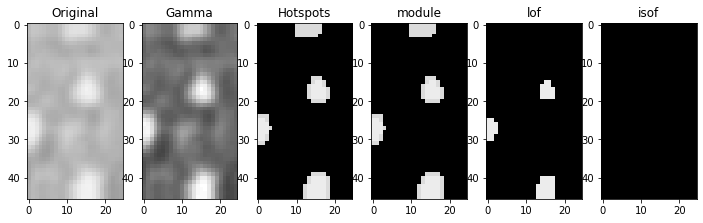

5392.jpg Junction-Box-Error
4098.jpg Normal
5386.jpg Junction-Box-Error
474.jpg Normal
1686.jpg Normal
312.jpg Normal
4926.jpg Junction-Box-Error
3091.jpg Normal
1876.jpg Single-Hotspot


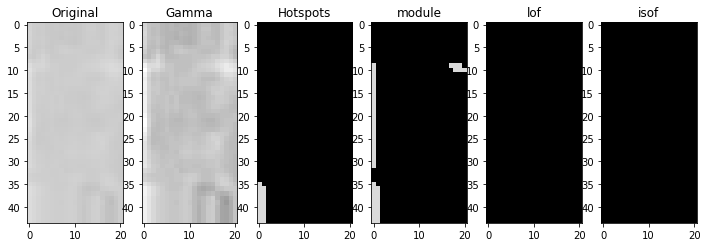

3907.jpg Normal
448.jpg Normal
3913.jpg Normal
1862.jpg Normal
1725.jpg Normal
4885.jpg Normal
5543.jpg Junction-Box-Error
3132.jpg Normal
3654.jpg Junction-Box-Error
5225.jpg Junction-Box-Error
1043.jpg Normal
1057.jpg Normal
3640.jpg Normal
3898.jpg Normal
5231.jpg Normal
2238.jpg Normal
4891.jpg Junction-Box-Error
5557.jpg Normal
4649.jpg Single-Hotspot


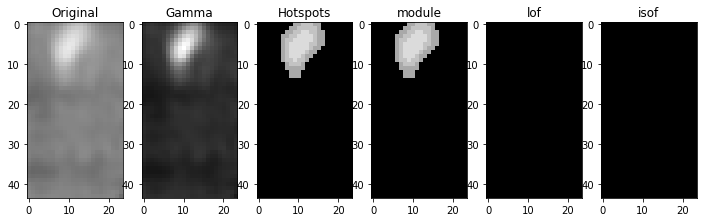

3126.jpg Normal
1731.jpg Junction-Box-Error
2210.jpg Normal
4661.jpg Junction-Box-Error
1719.jpg Normal
3668.jpg Normal
4107.jpg Junction-Box-Error
5219.jpg Normal
2576.jpg Normal
4113.jpg Normal
2562.jpg Normal
299.jpg Normal
2204.jpg Normal
4675.jpg Normal
4846.jpg Junction-Box-Error
5580.jpg Junction-Box-Error
272.jpg Normal
514.jpg Junction-Box-Error
1080.jpg Normal
2589.jpg Normal
3697.jpg Normal
3683.jpg Normal
1094.jpg Normal
500.jpg Normal
266.jpg Normal
4852.jpg Junction-Box-Error
5594.jpg Normal
1902.jpg Normal
3873.jpg Normal
528.jpg Normal
3867.jpg Junction-Box-Error
1916.jpg Normal
1241.jpg Normal
2748.jpg Normal
5027.jpg Junction-Box-Error
4339.jpg Junction-Box-Error
2990.jpg Normal
3456.jpg Normal
3330.jpg Normal
1527.jpg Normal
1533.jpg Junction-Box-Error
3324.jpg Normal
5033.jpg Junction-Box-Error
2984.jpg Normal
3442.jpg Normal
919.jpg Normal
1255.jpg Junction-Box-Error
2774.jpg Normal
4305.jpg Junction-Box-Error
931.jpg Normal
4463.jpg Normal
2012.jpg Junction-Box-Er

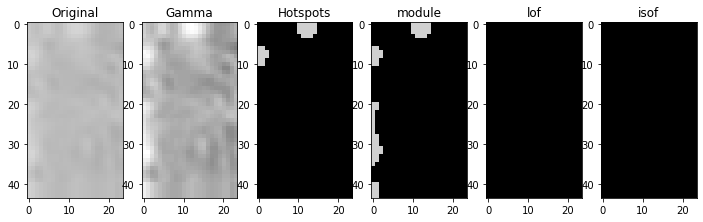

3084.jpg Normal
4933.jpg Junction-Box-Error
5393.jpg Junction-Box-Error
461.jpg Normal
3709.jpg Normal
4066.jpg Junction-Box-Error
5378.jpg Junction-Box-Error
2417.jpg Junction-Box-Error
2371.jpg Normal
4700.jpg Normal
1678.jpg Single-Hotspot


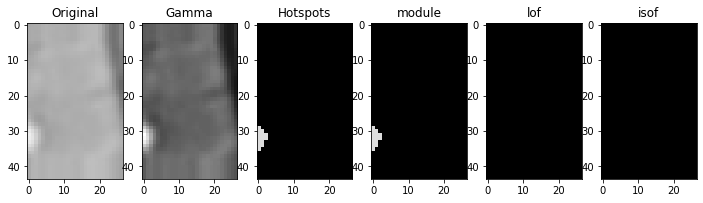

2365.jpg Single-Hotspot


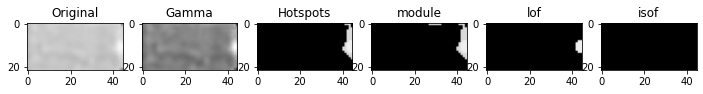

4714.jpg Junction-Box-Error
4072.jpg Normal
2403.jpg Normal
3735.jpg Normal
5344.jpg Junction-Box-Error
1122.jpg Normal
1644.jpg Normal
5422.jpg Junction-Box-Error
3053.jpg Junction-Box-Error
2359.jpg Normal
5436.jpg Multi-Hotspots


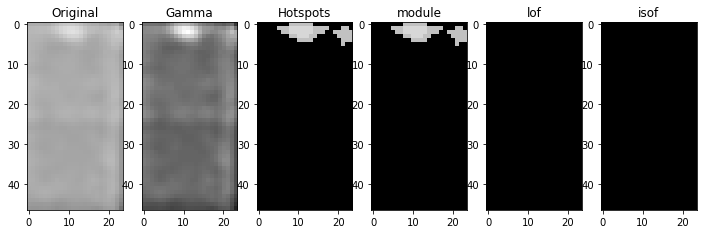

4728.jpg Normal
3047.jpg Normal
1888.jpg Normal
1650.jpg Normal
1136.jpg Normal
3721.jpg Normal
5350.jpg Normal
893.jpg Normal
887.jpg Normal
139.jpg Normal
1485.jpg Normal
111.jpg Normal
3292.jpg Normal
2832.jpg Normal
5185.jpg Junction-Box-Error
677.jpg Normal
663.jpg Normal
2826.jpg Junction-Box-Error
5191.jpg Junction-Box-Error
2198.jpg Normal
3286.jpg Junction-Box-Error
105.jpg Junction-Box-Error
1491.jpg Normal
4502.jpg Normal
2173.jpg Normal
2615.jpg Multi-Hotspots


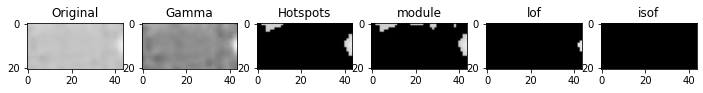

4264.jpg Normal
850.jpg Normal
10.jpg Junction-Box-Error
688.jpg Normal
844.jpg Multi-Hotspots


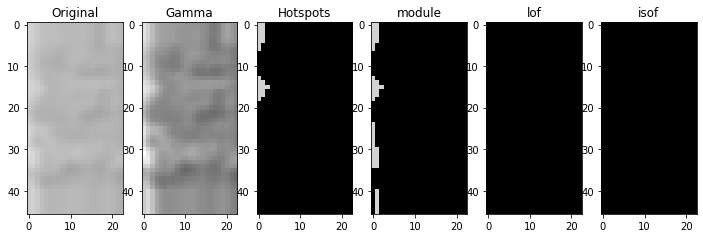

1308.jpg Junction-Box-Error
2601.jpg Normal
4270.jpg Junction-Box-Error
3279.jpg Junction-Box-Error
4516.jpg Junction-Box-Error
5608.jpg Junction-Box-Error
2167.jpg Junction-Box-Error
3251.jpg Normal
5620.jpg Junction-Box-Error
1446.jpg Junction-Box-Error
1320.jpg Normal
2629.jpg Junction-Box-Error
5146.jpg Junction-Box-Error
4258.jpg Junction-Box-Error
3537.jpg Normal
5152.jpg Junction-Box-Error
3523.jpg Normal
878.jpg Normal
38.jpg Normal
1334.jpg Normal
1452.jpg Junction-Box-Error
3245.jpg Normal
5634.jpg Junction-Box-Error
2142.jpg Normal
4533.jpg Junction-Box-Error
21.jpg Junction-Box-Error
861.jpg Normal
4255.jpg Normal
2624.jpg Normal
4241.jpg Normal
2630.jpg Normal
35.jpg Junction-Box-Error
1339.jpg Normal
875.jpg Normal
5639.jpg Multi-Hotspots


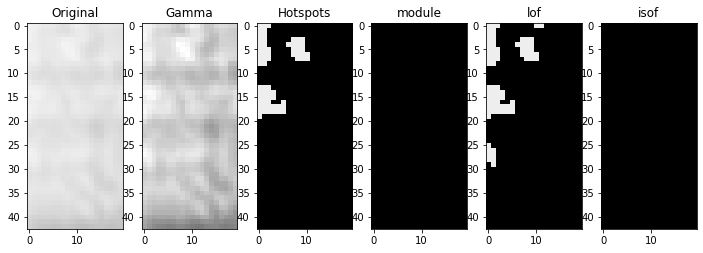

2156.jpg Junction-Box-Error
3248.jpg Normal
4527.jpg Normal
1477.jpg Normal
5611.jpg Normal
3260.jpg Normal
4269.jpg Normal
3506.jpg Normal
2618.jpg Normal
5177.jpg Normal
685.jpg Normal
1311.jpg Normal
1305.jpg Normal
691.jpg Normal
849.jpg Normal
3512.jpg Normal
5163.jpg Junction-Box-Error
5605.jpg Normal
3274.jpg Normal
1463.jpg Normal
1488.jpg Junction-Box-Error
2181.jpg Normal
5188.jpg Junction-Box-Error
4296.jpg Normal
4282.jpg Normal
2195.jpg Normal
108.jpg Normal
120.jpg Junction-Box-Error
646.jpg Normal
2803.jpg Normal
2817.jpg Junction-Box-Error
652.jpg Normal
134.jpg Normal
5349.jpg Junction-Box-Error
2426.jpg Single-Hotspot


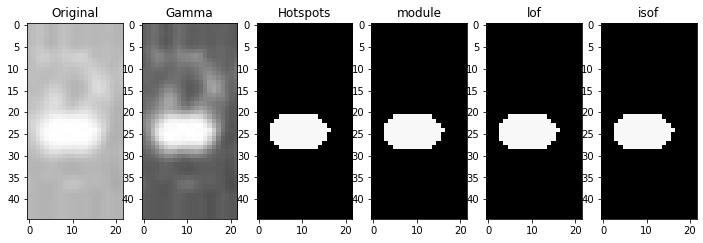

3738.jpg Normal
4057.jpg Junction-Box-Error
1649.jpg Junction-Box-Error
1891.jpg Junction-Box-Error
4731.jpg Junction-Box-Error
2340.jpg Normal
4725.jpg Junction-Box-Error
2354.jpg Normal
1885.jpg Normal
2432.jpg Junction-Box-Error
4043.jpg Normal
1113.jpg Normal
487.jpg Normal
5375.jpg Normal
3704.jpg Normal
3062.jpg Normal
5413.jpg Junction-Box-Error
1675.jpg Junction-Box-Error
1661.jpg Junction-Box-Error
3076.jpg Junction-Box-Error
2368.jpg Normal
5407.jpg Junction-Box-Error
5361.jpg Junction-Box-Error
3710.jpg Normal
493.jpg Normal
1107.jpg Normal
478.jpg Junction-Box-Error
4094.jpg Normal
3923.jpg Normal
2383.jpg Normal
1852.jpg Normal
1846.jpg Normal
2397.jpg Normal
3089.jpg Junction-Box-Error
4080.jpg Normal
3937.jpg Normal
444.jpg Normal
322.jpg Junction-Box-Error
4916.jpg Junction-Box-Error
4902.jpg Normal
336.jpg Normal
450.jpg Normal
4123.jpg Normal
2552.jpg Normal
3894.jpg Normal
2234.jpg Normal
4645.jpg Normal
4889.jpg Normal
2220.jpg Normal
4651.jpg Junction-Box-Error
172

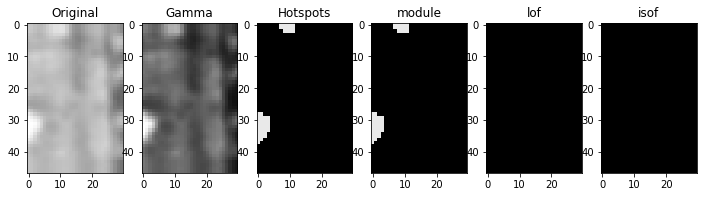

4137.jpg Normal
3658.jpg Normal
2546.jpg Junction-Box-Error
5229.jpg Junction-Box-Error
3880.jpg Normal
1067.jpg Normal
3670.jpg Normal
5201.jpg Normal
5567.jpg Junction-Box-Error
2208.jpg Normal
3116.jpg Normal
4679.jpg Junction-Box-Error
1701.jpg Normal
295.jpg Normal
281.jpg Normal
1715.jpg Normal
5573.jpg Junction-Box-Error
3102.jpg Normal
3664.jpg Normal
5215.jpg Normal
1073.jpg Normal
1098.jpg Junction-Box-Error
2591.jpg Normal
3857.jpg Normal
4686.jpg Junction-Box-Error
5598.jpg Junction-Box-Error
1926.jpg Normal
1932.jpg Normal
4692.jpg Junction-Box-Error
2585.jpg Normal
3843.jpg Normal
518.jpg Normal
530.jpg Junction-Box-Error
256.jpg Junction-Box-Error
4862.jpg Normal
4876.jpg Junction-Box-Error
242.jpg Normal
524.jpg Normal
4447.jpg Normal
3328.jpg Normal
2036.jpg Normal
915.jpg Normal
1259.jpg Normal
2750.jpg Junction-Box-Error
2988.jpg Junction-Box-Error
4321.jpg Junction-Box-Error
2744.jpg Normal
4335.jpg Normal
901.jpg Normal
4453.jpg Normal
2022.jpg Normal
1503.jpg Norm

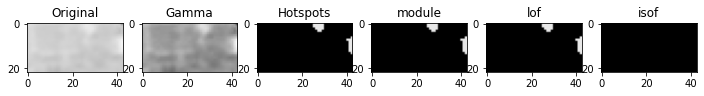

2963.jpg Normal
726.jpg Normal
727.jpg Normal
2962.jpg Normal
2976.jpg Normal
733.jpg Junction-Box-Error
2786.jpg Normal
3498.jpg Normal
4491.jpg Junction-Box-Error
4485.jpg Normal
2792.jpg Normal
4308.jpg Normal
3467.jpg Normal
2779.jpg Normal
5016.jpg Normal
1270.jpg Junction-Box-Error
1516.jpg Junction-Box-Error
3301.jpg Multi-Hotspots


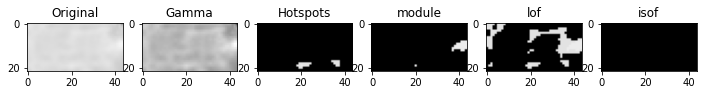

3315.jpg Normal
1502.jpg Normal
1264.jpg Normal
928.jpg Normal
3473.jpg Normal
5002.jpg Normal
900.jpg Normal
4334.jpg Normal
2745.jpg Normal
2023.jpg Normal
4452.jpg Normal
2037.jpg Normal
3329.jpg Normal
4446.jpg Junction-Box-Error
4320.jpg Junction-Box-Error
2989.jpg Junction-Box-Error
2751.jpg Junction-Box-Error
1258.jpg Normal
914.jpg Normal
243.jpg Multi-Hotspots


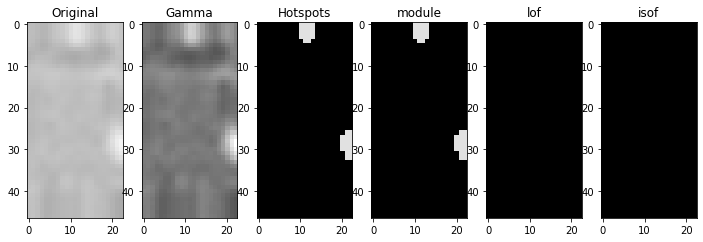

4877.jpg Junction-Box-Error
525.jpg Normal
531.jpg Normal
4863.jpg Normal
257.jpg Normal
4693.jpg Junction-Box-Error
1933.jpg Normal
519.jpg Normal
3842.jpg Normal
2584.jpg Junction-Box-Error
3856.jpg Normal
2590.jpg Normal
1099.jpg Normal
1927.jpg Normal
5599.jpg Normal
4687.jpg Normal
3103.jpg Normal
5572.jpg Normal
1714.jpg Normal
280.jpg Normal
1072.jpg Normal
5214.jpg Junction-Box-Error
3665.jpg Normal
5200.jpg Normal
3671.jpg Normal
1066.jpg Normal
294.jpg Normal
1700.jpg Junction-Box-Error
4678.jpg Normal
3117.jpg Normal
2209.jpg Normal
5566.jpg Normal
1728.jpg Normal
4650.jpg Junction-Box-Error
2221.jpg Normal
4888.jpg Normal
3881.jpg Junction-Box-Error
5228.jpg Normal
2547.jpg Normal
3659.jpg Normal
4136.jpg Normal
2553.jpg Normal
4122.jpg Junction-Box-Error
4644.jpg Normal
2235.jpg Normal
337.jpg Normal
4903.jpg Junction-Box-Error
451.jpg Normal
445.jpg Normal
4917.jpg Junction-Box-Error
323.jpg Junction-Box-Error
3088.jpg Normal
2396.jpg Normal
1847.jpg Normal
3936.jpg Norma

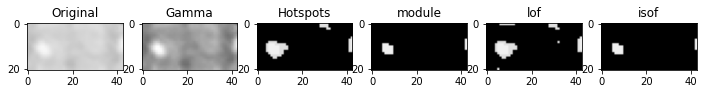

2802.jpg Normal
647.jpg Normal
4283.jpg Normal
109.jpg Junction-Box-Error
2194.jpg Normal
2180.jpg Junction-Box-Error
1489.jpg Normal
4297.jpg Normal
5189.jpg Junction-Box-Error
5162.jpg Normal
3513.jpg Normal
848.jpg Junction-Box-Error
690.jpg Normal
1304.jpg Normal
1462.jpg Normal
3275.jpg Normal
5604.jpg Normal
3261.jpg Normal
5610.jpg Normal
1476.jpg Normal
1310.jpg Normal
684.jpg Single-Hotspot


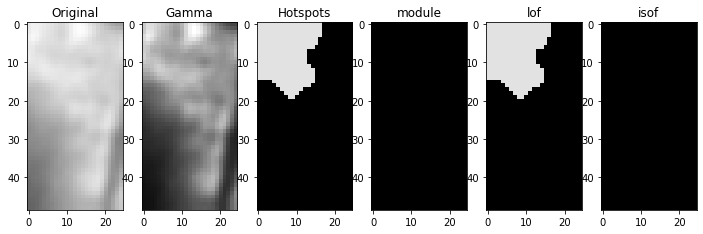

5176.jpg Junction-Box-Error
2619.jpg Normal
3507.jpg Normal
4268.jpg Junction-Box-Error
874.jpg Junction-Box-Error
1338.jpg Junction-Box-Error
34.jpg Normal
2631.jpg Normal
4240.jpg Normal
4526.jpg Junction-Box-Error
3249.jpg Junction-Box-Error
2157.jpg Normal
5638.jpg Normal
4532.jpg Junction-Box-Error
2143.jpg Multi-Hotspots


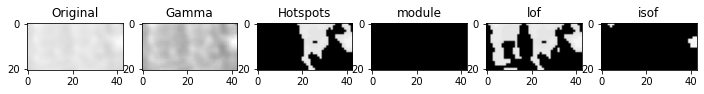

2625.jpg Junction-Box-Error
4254.jpg Normal
860.jpg Normal
20.jpg Junction-Box-Error
2155.jpg Normal
4524.jpg Normal
4242.jpg Normal
2633.jpg Normal
36.jpg Junction-Box-Error
876.jpg Normal
22.jpg Junction-Box-Error
862.jpg Normal
4256.jpg Normal
3539.jpg Normal
2627.jpg Junction-Box-Error
5148.jpg Junction-Box-Error
2141.jpg Normal
4530.jpg Normal
1448.jpg Junction-Box-Error
5606.jpg Normal
2169.jpg Junction-Box-Error
3277.jpg Normal
4518.jpg Normal
1460.jpg Junction-Box-Error
1306.jpg Normal
692.jpg Normal
3511.jpg Normal
5160.jpg Normal
3505.jpg Normal
5174.jpg Junction-Box-Error
686.jpg Junction-Box-Error
1312.jpg Normal
1474.jpg Junction-Box-Error
5612.jpg Junction-Box-Error
3263.jpg Junction-Box-Error
3288.jpg Normal
2196.jpg Normal
4281.jpg Junction-Box-Error
2828.jpg Normal
4295.jpg Normal
679.jpg Normal
2182.jpg Normal
137.jpg Junction-Box-Error
2814.jpg Normal
889.jpg Normal
651.jpg Normal
645.jpg Normal
2800.jpg Normal
123.jpg Normal
1138.jpg Normal
2431.jpg Normal
4040.jpg 

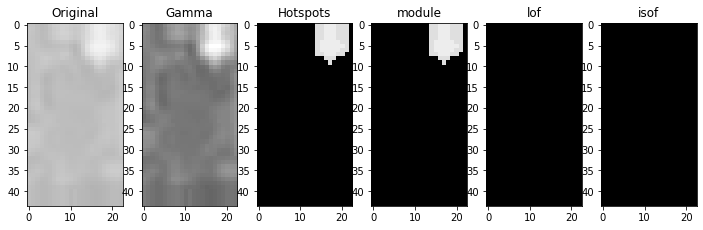

321.jpg Junction-Box-Error
4915.jpg Normal
447.jpg Junction-Box-Error
4134.jpg Normal
2545.jpg Normal
3883.jpg Normal
2223.jpg Normal
4652.jpg Junction-Box-Error
5558.jpg Junction-Box-Error
2237.jpg Normal
3129.jpg Normal
4646.jpg Normal
4120.jpg Normal
2551.jpg Normal
3897.jpg Junction-Box-Error
1058.jpg Normal
4108.jpg Normal
3667.jpg Normal
2579.jpg Normal
5216.jpg Junction-Box-Error
1070.jpg Multi-Hotspots


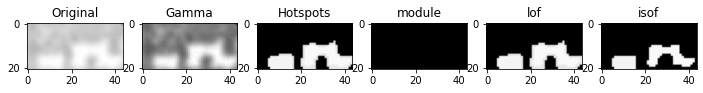

282.jpg Normal
1716.jpg Multi-Hotspots


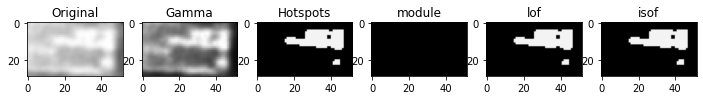

5570.jpg Normal
3101.jpg Normal
5564.jpg Junction-Box-Error
3115.jpg Junction-Box-Error
1702.jpg Junction-Box-Error
296.jpg Normal
1064.jpg Junction-Box-Error
3673.jpg Normal
5202.jpg Normal
2586.jpg Junction-Box-Error
3840.jpg Normal
3698.jpg Normal
1931.jpg Normal
4691.jpg Normal
4849.jpg Normal
4685.jpg Junction-Box-Error
269.jpg Normal
1925.jpg Junction-Box-Error
2592.jpg Single-Hotspot


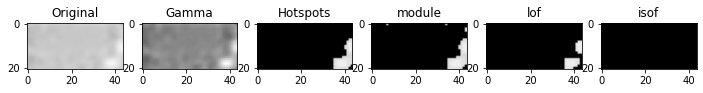

3854.jpg Normal
527.jpg Normal
4875.jpg Junction-Box-Error
241.jpg Single-Hotspot


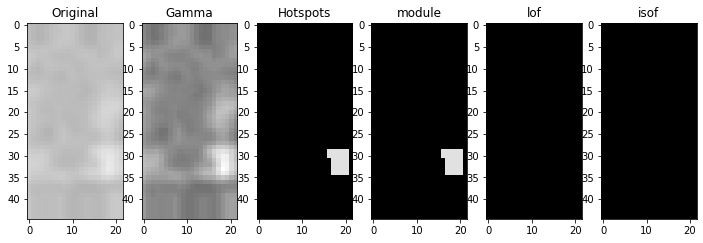

255.jpg Junction-Box-Error
1919.jpg Normal
4861.jpg Junction-Box-Error
3868.jpg Normal
533.jpg Junction-Box-Error
1528.jpg Junction-Box-Error
4450.jpg Normal
2021.jpg Normal
5028.jpg Junction-Box-Error
2747.jpg Normal
3459.jpg Normal
4336.jpg Normal
902.jpg Normal
916.jpg Junction-Box-Error
2753.jpg Junction-Box-Error
4322.jpg Normal
4444.jpg Normal
2035.jpg Normal
3303.jpg Normal
1514.jpg Normal
1272.jpg Junction-Box-Error
5014.jpg Normal
3465.jpg Normal
5000.jpg Normal
3471.jpg Normal
1266.jpg Normal
1500.jpg Junction-Box-Error
4478.jpg Junction-Box-Error
3317.jpg Junction-Box-Error
2009.jpg Normal
4493.jpg Junction-Box-Error
719.jpg Normal
2784.jpg Junction-Box-Error
2948.jpg Normal
2790.jpg Normal
1299.jpg Normal
4487.jpg Normal
2960.jpg Normal
725.jpg Normal
731.jpg Normal
2974.jpg Normal
2975.jpg Normal
730.jpg Normal
724.jpg Normal
2961.jpg Normal
1298.jpg Normal
2791.jpg Normal
2949.jpg Normal
4486.jpg Normal
4492.jpg Normal
2785.jpg Normal
718.jpg Normal
1267.jpg Normal
3470.j

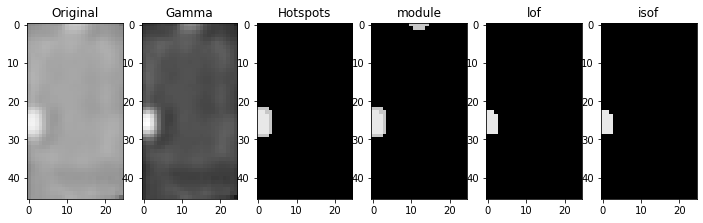

1924.jpg Normal
268.jpg Normal
4684.jpg Junction-Box-Error
3855.jpg Normal
2593.jpg Normal
3699.jpg Normal
3841.jpg Normal
2587.jpg Normal
4848.jpg Normal
4690.jpg Normal
1930.jpg Junction-Box-Error
297.jpg Normal
1703.jpg Normal
3114.jpg Normal
5565.jpg Junction-Box-Error
5203.jpg Junction-Box-Error
3672.jpg Normal
1065.jpg Normal
1071.jpg Normal
5217.jpg Normal
2578.jpg Normal
3666.jpg Normal
4109.jpg Normal
3100.jpg Normal
5571.jpg Junction-Box-Error
1717.jpg Normal
283.jpg Normal
4647.jpg Normal
3128.jpg Normal
2236.jpg Normal
5559.jpg Normal
1059.jpg Normal
3896.jpg Normal
2550.jpg Normal
4121.jpg Normal
3882.jpg Normal
2544.jpg Junction-Box-Error
4135.jpg Normal
4653.jpg Normal
2222.jpg Normal
4914.jpg Junction-Box-Error
320.jpg Normal
446.jpg Normal
3909.jpg Normal
452.jpg Normal
334.jpg Normal
1878.jpg Normal
4900.jpg Normal
1688.jpg Normal
1850.jpg Normal
4928.jpg Normal
2381.jpg Junction-Box-Error
5388.jpg Junction-Box-Error
3921.jpg Normal
4096.jpg Junction-Box-Error
3935.jp

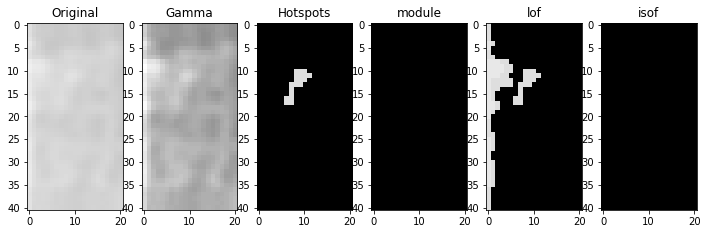

5411.jpg Junction-Box-Error
3060.jpg Normal
4069.jpg Normal
3706.jpg Normal
2418.jpg Normal
5377.jpg Normal
485.jpg Normal
1111.jpg Normal
1105.jpg Normal
491.jpg Junction-Box-Error
3712.jpg Normal
5363.jpg Normal
5405.jpg Junction-Box-Error
3074.jpg Normal
1663.jpg Normal
2342.jpg Normal
4733.jpg Junction-Box-Error
1893.jpg Normal
4055.jpg Normal
2424.jpg Normal
4041.jpg Normal
2430.jpg Normal
1139.jpg Normal
1887.jpg Normal
5439.jpg Junction-Box-Error
2356.jpg Normal
3048.jpg Junction-Box-Error
4727.jpg Junction-Box-Error
2801.jpg Junction-Box-Error
644.jpg Junction-Box-Error
122.jpg Junction-Box-Error
136.jpg Normal
650.jpg Normal
888.jpg Normal
2815.jpg Junction-Box-Error
678.jpg Junction-Box-Error
4294.jpg Junction-Box-Error
2183.jpg Normal
2197.jpg Normal
3289.jpg Normal
2829.jpg Single-Hotspot


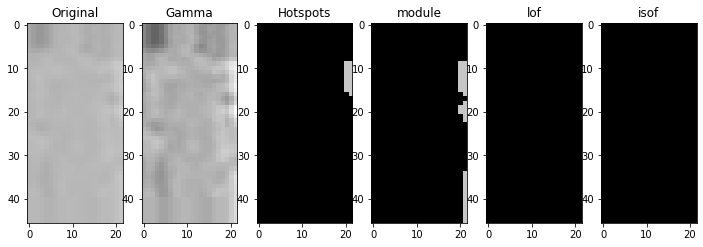

4280.jpg Normal
1313.jpg Normal
687.jpg Junction-Box-Error
5175.jpg Junction-Box-Error
3504.jpg Normal
3262.jpg Normal
5613.jpg Normal
1475.jpg Junction-Box-Error
1461.jpg Normal
4519.jpg Normal
3276.jpg Junction-Box-Error
2168.jpg Normal
5607.jpg Junction-Box-Error
5161.jpg Junction-Box-Error
3510.jpg Normal
693.jpg Normal
1307.jpg Normal
5149.jpg Normal
2626.jpg Normal
3538.jpg Normal
4257.jpg Normal
863.jpg Normal
23.jpg Multi-Hotspots


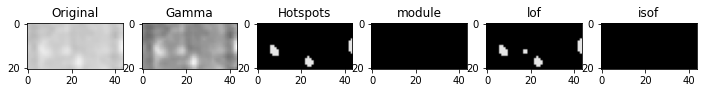

1449.jpg Normal
4531.jpg Normal
2140.jpg Normal
4525.jpg Normal
2154.jpg Normal
877.jpg Normal
37.jpg Multi-Hotspots


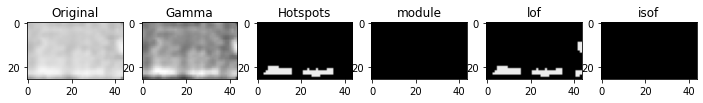

2632.jpg Normal
4243.jpg Normal
1303.jpg Normal
697.jpg Normal
3514.jpg Normal
5165.jpg Normal
5603.jpg Normal
3272.jpg Normal
1465.jpg Normal
1471.jpg Normal
2178.jpg Normal
5617.jpg Junction-Box-Error
4509.jpg Normal
3266.jpg Normal
3500.jpg Normal
5171.jpg Normal
683.jpg Normal
1317.jpg Normal
3528.jpg Normal
4247.jpg Normal
5159.jpg Normal
2636.jpg Normal
33.jpg Junction-Box-Error
873.jpg Normal
1459.jpg Normal
2150.jpg Junction-Box-Error
4521.jpg Normal
2144.jpg Junction-Box-Error
4535.jpg Normal
27.jpg Multi-Hotspots


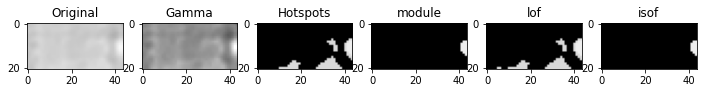

867.jpg Normal
4253.jpg Normal
2622.jpg Normal
2811.jpg Normal
654.jpg Normal
132.jpg Normal
126.jpg Junction-Box-Error
898.jpg Normal
640.jpg Single-Hotspot


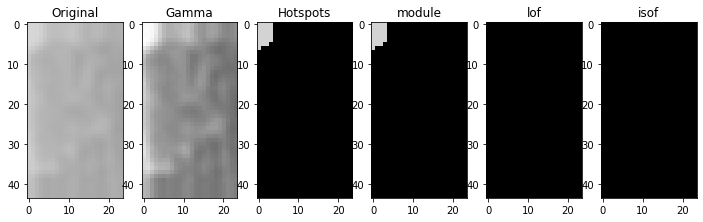

2805.jpg Normal
668.jpg Normal
4284.jpg Junction-Box-Error
2193.jpg Normal
3299.jpg Normal
2187.jpg Junction-Box-Error
4290.jpg Normal
2839.jpg Single-Hotspot


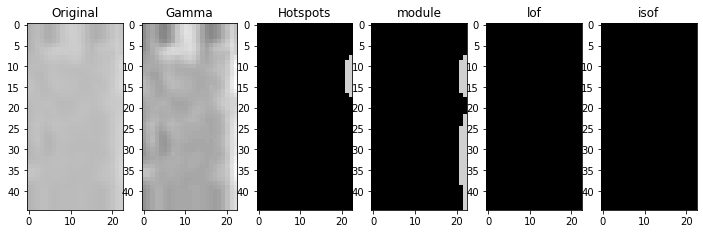

1667.jpg Normal
3070.jpg Normal
5401.jpg Multi-Hotspots


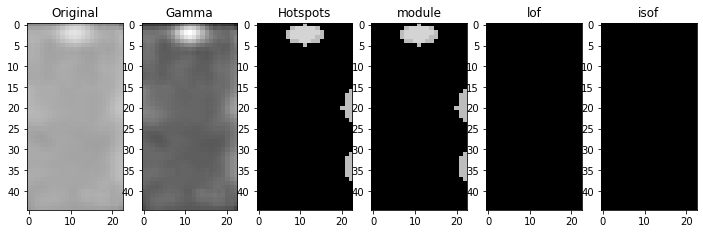

2408.jpg Normal
5367.jpg Normal
4079.jpg Normal
3716.jpg Normal
495.jpg Normal
1101.jpg Normal
1115.jpg Junction-Box-Error
481.jpg Normal
5373.jpg Junction-Box-Error
3702.jpg Normal
3064.jpg Multi-Hotspots


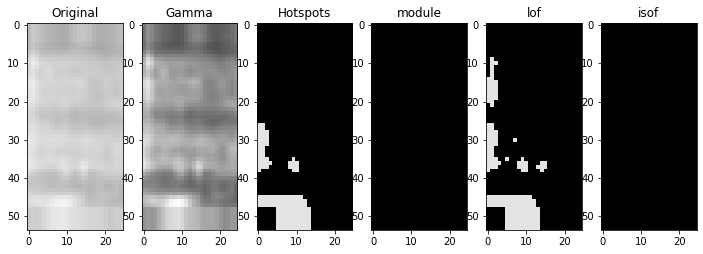

5415.jpg Junction-Box-Error
1673.jpg Normal
4723.jpg Normal
2352.jpg Normal
1883.jpg Normal
2434.jpg Normal
4045.jpg Normal
2420.jpg Normal
4051.jpg Normal
1129.jpg Single-Hotspot


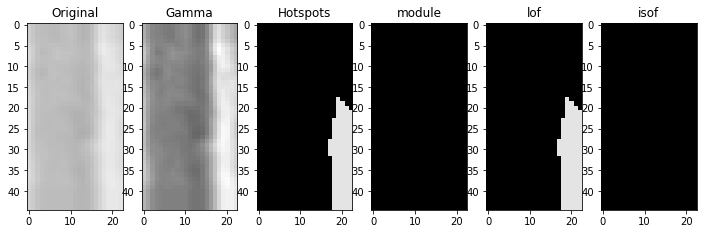

1897.jpg Normal
3058.jpg Cluster-Anomaly


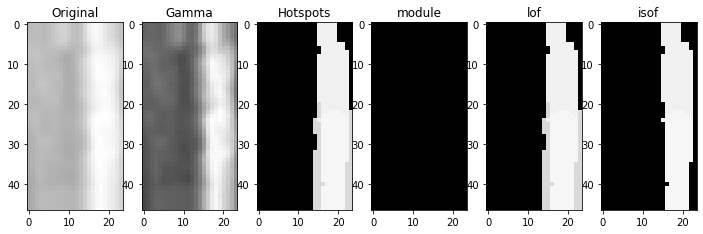

4737.jpg Normal
5429.jpg Normal
2346.jpg Normal
4904.jpg Junction-Box-Error
330.jpg Normal
456.jpg Normal
3919.jpg Normal
442.jpg Normal
1868.jpg Normal
324.jpg Normal
4910.jpg Junction-Box-Error
1840.jpg Junction-Box-Error
1698.jpg Normal
2391.jpg Normal
4938.jpg Junction-Box-Error
4086.jpg Normal
3931.jpg Normal
5398.jpg Normal
4092.jpg Normal
3925.jpg Normal
2385.jpg Junction-Box-Error
1854.jpg Normal
318.jpg Junction-Box-Error
287.jpg Normal
1713.jpg Junction-Box-Error
5575.jpg Junction-Box-Error
3104.jpg Normal
3662.jpg Normal
5213.jpg Junction-Box-Error
1075.jpg Junction-Box-Error
1061.jpg Normal
3676.jpg Normal
4119.jpg Normal
5207.jpg Junction-Box-Error
2568.jpg Normal
5561.jpg Junction-Box-Error
3110.jpg Normal
1707.jpg Normal
293.jpg Junction-Box-Error
2226.jpg Normal
5549.jpg Junction-Box-Error
4657.jpg Junction-Box-Error
3138.jpg Junction-Box-Error
1049.jpg Junction-Box-Error
4131.jpg Normal
3886.jpg Normal
2540.jpg Normal
4125.jpg Normal
3892.jpg Normal
2554.jpg Normal
223

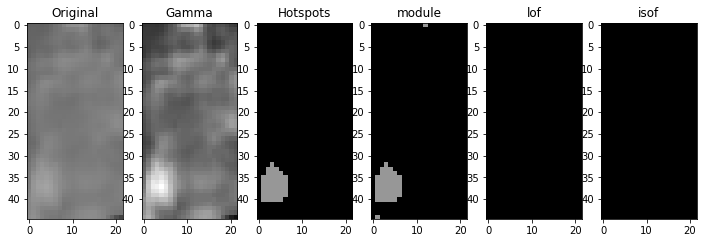

1920.jpg Normal
1277.jpg Normal
5011.jpg Junction-Box-Error
3460.jpg Normal
3306.jpg Normal
4469.jpg Normal
2018.jpg Normal
1511.jpg Normal
1505.jpg Junction-Box-Error
3312.jpg Normal
5005.jpg Junction-Box-Error
3474.jpg Normal
1263.jpg Normal
2742.jpg Normal
4333.jpg Normal
907.jpg Normal
4455.jpg Normal
2024.jpg Normal
4441.jpg Normal
2030.jpg Single-Hotspot


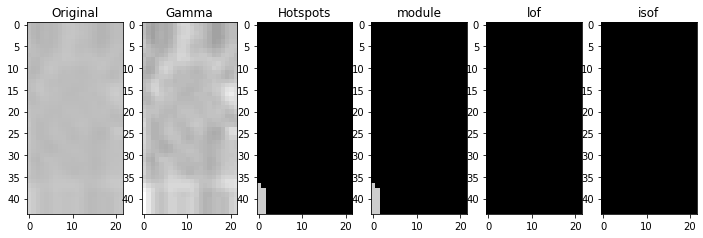

1539.jpg Junction-Box-Error
913.jpg Normal
2756.jpg Normal
5039.jpg Normal
4327.jpg Normal
3448.jpg Normal
2965.jpg Junction-Box-Error
720.jpg Normal
734.jpg Normal
2971.jpg Normal
1288.jpg Normal
2959.jpg Normal
2781.jpg Normal
4496.jpg Normal
4482.jpg Normal
2795.jpg Junction-Box-Error
708.jpg Multi-Hotspots


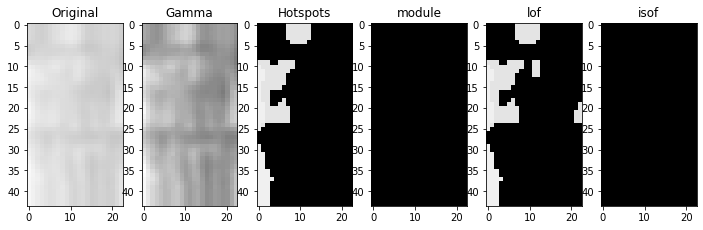

4483.jpg Junction-Box-Error
709.jpg Normal
2794.jpg Junction-Box-Error
2780.jpg Normal
2958.jpg Multi-Hotspots


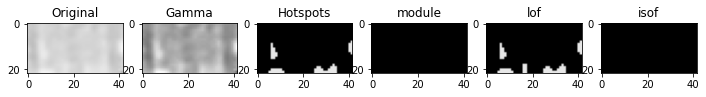

1289.jpg Normal
4497.jpg Normal
2970.jpg Normal
735.jpg Normal
721.jpg Normal
2964.jpg Normal
1538.jpg Normal
2031.jpg Normal
4440.jpg Junction-Box-Error
3449.jpg Normal
4326.jpg Normal
5038.jpg Normal
2757.jpg Normal
912.jpg Normal
906.jpg Normal
4332.jpg Normal
2743.jpg Normal
2025.jpg Junction-Box-Error
4454.jpg Normal
3313.jpg Junction-Box-Error
1504.jpg Junction-Box-Error
1262.jpg Normal
3475.jpg Normal
5004.jpg Junction-Box-Error
3461.jpg Normal
5010.jpg Normal
1276.jpg Normal
1510.jpg Normal
2019.jpg Normal
4468.jpg Normal
3307.jpg Normal
3688.jpg Normal
2596.jpg Normal
3850.jpg Normal
1921.jpg Normal
4859.jpg Junction-Box-Error
4681.jpg Normal
4695.jpg Single-Hotspot


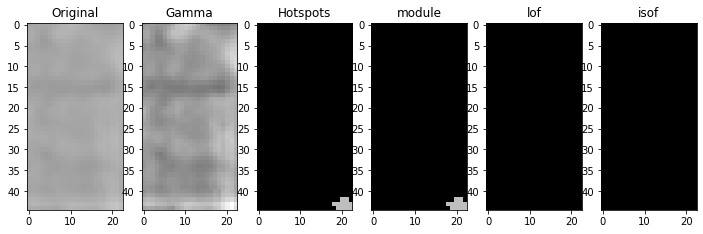

1935.jpg Junction-Box-Error
279.jpg Normal
2582.jpg Junction-Box-Error
3844.jpg Normal
537.jpg Normal
4865.jpg Normal
251.jpg Junction-Box-Error
1909.jpg Normal
245.jpg Normal
4871.jpg Normal
3878.jpg Normal
523.jpg Normal
2555.jpg Normal
3893.jpg Normal
4124.jpg Normal
4642.jpg Normal
2233.jpg Junction-Box-Error
3139.jpg Normal
4656.jpg Normal
5548.jpg Normal
2227.jpg Normal
2541.jpg Normal
3887.jpg Normal
4130.jpg Normal
1048.jpg Normal
2569.jpg Normal
5206.jpg Junction-Box-Error
4118.jpg Normal
3677.jpg Normal
1060.jpg Junction-Box-Error
292.jpg Normal
1706.jpg Normal
3111.jpg Normal
5560.jpg Junction-Box-Error
3105.jpg Normal
5574.jpg Normal
1712.jpg Normal
286.jpg Normal
1074.jpg Normal
5212.jpg Normal
3663.jpg Normal
3924.jpg Normal
4093.jpg Normal
319.jpg Normal
1855.jpg Normal
2384.jpg Normal
4939.jpg Normal
2390.jpg Normal
1699.jpg Normal
1841.jpg Normal
5399.jpg Junction-Box-Error
3930.jpg Normal
4087.jpg Normal
443.jpg Normal
3918.jpg Normal
4911.jpg Normal
325.jpg Normal
18

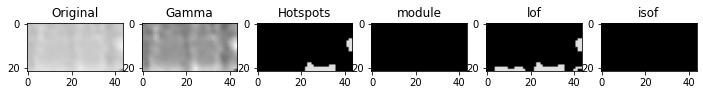

331.jpg Normal
4905.jpg Junction-Box-Error
457.jpg Normal
1128.jpg Normal
4050.jpg Normal
2421.jpg Normal
2347.jpg Normal
5428.jpg Junction-Box-Error
4736.jpg Normal
3059.jpg Junction-Box-Error
1896.jpg Normal
1882.jpg Normal
2353.jpg Junction-Box-Error
4722.jpg Normal
4044.jpg Normal
2435.jpg Normal
3703.jpg Normal
5372.jpg Normal
480.jpg Normal
1114.jpg Normal
1672.jpg Junction-Box-Error
5414.jpg Normal
3065.jpg Junction-Box-Error
5400.jpg Normal
3071.jpg Normal
1666.jpg Normal
1100.jpg Normal
494.jpg Single-Hotspot


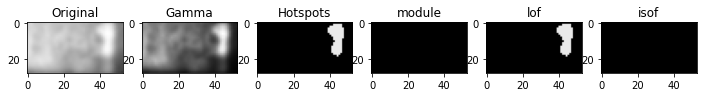

3717.jpg Normal
4078.jpg Normal
5366.jpg Junction-Box-Error
2409.jpg Normal
2186.jpg Normal
3298.jpg Normal
2838.jpg Normal
4291.jpg Normal
4285.jpg Normal
669.jpg Normal
2192.jpg Normal
127.jpg Normal
2804.jpg Normal
641.jpg Normal
899.jpg Normal
2810.jpg Normal
133.jpg Junction-Box-Error
4534.jpg Normal
2145.jpg Normal
2623.jpg Junction-Box-Error
4252.jpg Junction-Box-Error
866.jpg Normal
26.jpg Normal
872.jpg Normal
32.jpg Junction-Box-Error
2637.jpg Normal
5158.jpg Junction-Box-Error
4246.jpg Junction-Box-Error
3529.jpg Normal
4520.jpg Junction-Box-Error
2151.jpg Normal
1458.jpg Normal
3267.jpg Normal
4508.jpg Junction-Box-Error
5616.jpg Junction-Box-Error
2179.jpg Junction-Box-Error
1470.jpg Normal
1316.jpg Normal
682.jpg Normal
5170.jpg Junction-Box-Error
3501.jpg Normal
5164.jpg Single-Hotspot


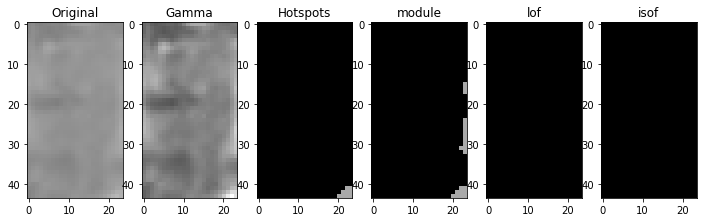

3515.jpg Normal
696.jpg Normal
1302.jpg Normal
1464.jpg Normal
3273.jpg Junction-Box-Error
5602.jpg Normal
3503.jpg Normal
5172.jpg Junction-Box-Error
680.jpg Junction-Box-Error
1314.jpg Normal
18.jpg Junction-Box-Error
858.jpg Normal
1472.jpg Normal
5614.jpg Junction-Box-Error
3265.jpg Normal
5600.jpg Junction-Box-Error
3271.jpg Normal
1466.jpg Normal
1300.jpg Normal
694.jpg Junction-Box-Error
3517.jpg Normal
4278.jpg Normal
5166.jpg Normal
2609.jpg Normal
1328.jpg Normal
24.jpg Junction-Box-Error
864.jpg Normal
4250.jpg Normal
2621.jpg Normal
2147.jpg Junction-Box-Error
5628.jpg Normal
4536.jpg Junction-Box-Error
3259.jpg Normal
2153.jpg Normal
4522.jpg Normal
4244.jpg Junction-Box-Error
2635.jpg Normal
30.jpg Junction-Box-Error
870.jpg Normal
643.jpg Normal
2806.jpg Normal
125.jpg Normal
131.jpg Normal
2812.jpg Normal
657.jpg Normal
4293.jpg Normal
119.jpg Normal
2184.jpg Junction-Box-Error
2190.jpg Junction-Box-Error
1499.jpg Junction-Box-Error
5199.jpg Multi-Hotspots


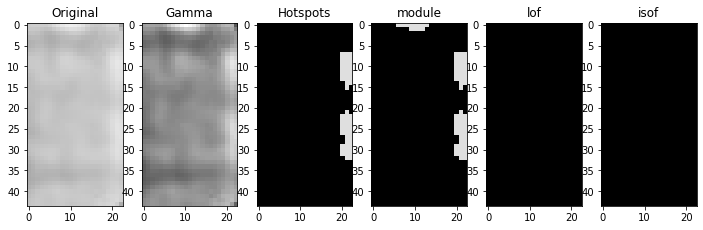

4287.jpg Normal
3067.jpg Junction-Box-Error
4708.jpg Normal
5416.jpg Junction-Box-Error
2379.jpg Normal
1670.jpg Normal
1116.jpg Normal
482.jpg Junction-Box-Error
5370.jpg Junction-Box-Error
3701.jpg Normal
5364.jpg Junction-Box-Error
3715.jpg Normal
496.jpg Normal
1102.jpg Normal
1664.jpg Junction-Box-Error
3073.jpg Junction-Box-Error
5402.jpg Junction-Box-Error
1894.jpg Junction-Box-Error
4734.jpg Normal
2345.jpg Normal
2423.jpg Normal
4052.jpg Junction-Box-Error
2437.jpg Normal
5358.jpg Normal
4046.jpg Normal
3729.jpg Normal
4720.jpg Normal
2351.jpg Junction-Box-Error
1658.jpg Normal
1880.jpg Normal
327.jpg Normal
4913.jpg Normal
441.jpg Normal
455.jpg Normal
4907.jpg Junction-Box-Error
333.jpg Junction-Box-Error
2386.jpg Normal
3098.jpg Junction-Box-Error
1857.jpg Normal
4091.jpg Normal
3926.jpg Normal
4085.jpg Normal
3932.jpg Junction-Box-Error
469.jpg Single-Hotspot


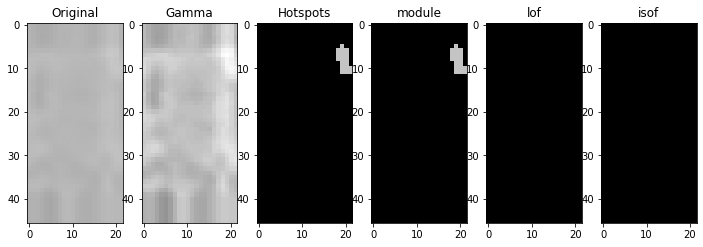

1843.jpg Junction-Box-Error
2392.jpg Junction-Box-Error
5562.jpg Normal
3113.jpg Normal
1704.jpg Junction-Box-Error
290.jpg Normal
1062.jpg Normal
3675.jpg Normal
5204.jpg Junction-Box-Error
3661.jpg Normal
5210.jpg Normal
1076.jpg Normal
284.jpg Normal
1710.jpg Normal
2219.jpg Normal
5576.jpg Normal
4668.jpg Junction-Box-Error
3107.jpg Junction-Box-Error
1738.jpg Normal
4898.jpg Junction-Box-Error
2231.jpg Normal
4640.jpg Normal
3649.jpg Normal
4126.jpg Normal
5238.jpg Junction-Box-Error
3891.jpg Normal
2557.jpg Normal
4132.jpg Normal
3885.jpg Normal
2543.jpg Junction-Box-Error
2225.jpg Normal
4654.jpg Junction-Box-Error
253.jpg Normal
4867.jpg Junction-Box-Error
535.jpg Junction-Box-Error
521.jpg Normal
4873.jpg Normal
247.jpg Normal
4683.jpg Junction-Box-Error
1923.jpg Normal
509.jpg Normal
3852.jpg Normal
2594.jpg Normal
3846.jpg Normal
2580.jpg Normal
1089.jpg Normal
1937.jpg Normal
4697.jpg Normal
5589.jpg Junction-Box-Error
2769.jpg Normal
5006.jpg Junction-Box-Error
4318.jpg No

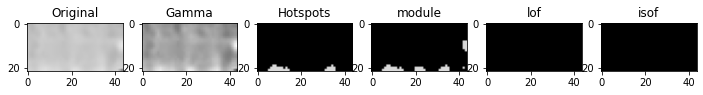

2741.jpg Junction-Box-Error
2999.jpg Normal
4330.jpg Normal
904.jpg Junction-Box-Error
1248.jpg Normal
737.jpg Normal
2972.jpg Normal
2966.jpg Normal
723.jpg Normal
3488.jpg Normal
2796.jpg Normal
4481.jpg Normal
4495.jpg Normal
2782.jpg Cluster-Anomaly


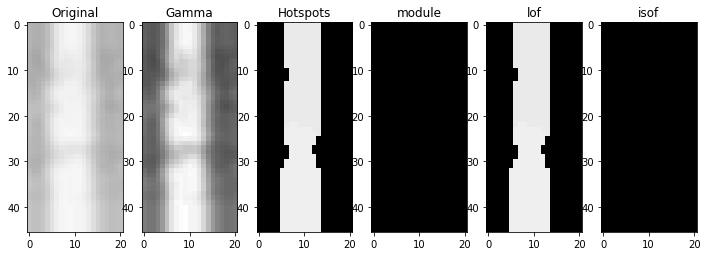

4494.jpg Normal
2783.jpg Normal
2797.jpg Normal
3489.jpg Normal
4480.jpg Normal
722.jpg Junction-Box-Error
2967.jpg Normal
2973.jpg Normal
736.jpg Normal
2026.jpg Normal
4457.jpg Normal
3338.jpg Normal
1249.jpg Normal
905.jpg Normal
4331.jpg Normal
2998.jpg Junction-Box-Error
2740.jpg Normal
4325.jpg Normal
2754.jpg Normal
911.jpg Normal
2032.jpg Normal
4443.jpg Normal
1513.jpg Junction-Box-Error
3304.jpg Normal
3462.jpg Normal
5013.jpg Junction-Box-Error
1275.jpg Normal
939.jpg Normal
1261.jpg Normal
3476.jpg Normal
4319.jpg Normal
5007.jpg Normal
2768.jpg Normal
3310.jpg Normal
1507.jpg Junction-Box-Error
1088.jpg Normal
2581.jpg Junction-Box-Error
3847.jpg Normal
5588.jpg Junction-Box-Error
4696.jpg Normal
1936.jpg Normal
1922.jpg Junction-Box-Error
4682.jpg Normal
2595.jpg Junction-Box-Error
3853.jpg Normal
508.jpg Normal
520.jpg Normal
246.jpg Normal
4872.jpg Normal
4866.jpg Normal
252.jpg Normal
534.jpg Normal
2542.jpg Normal
3884.jpg Normal
4133.jpg Junction-Box-Error
4655.jpg N

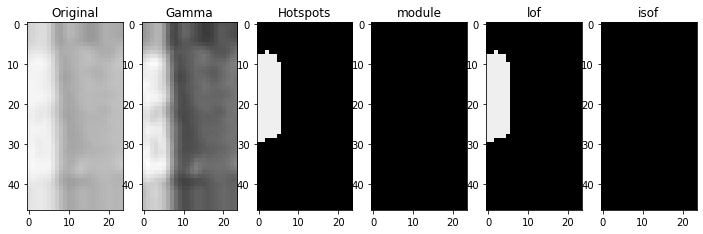

3106.jpg Normal
4669.jpg Normal
5577.jpg Junction-Box-Error
2218.jpg Normal
1711.jpg Normal
285.jpg Normal
291.jpg Normal
1705.jpg Normal
3112.jpg Normal
5563.jpg Single-Hotspot


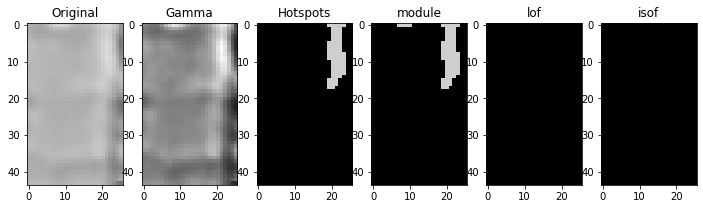

5205.jpg Normal
3674.jpg Normal
1063.jpg Junction-Box-Error
468.jpg Junction-Box-Error
3933.jpg Normal
4084.jpg Normal
2393.jpg Normal
1842.jpg Normal
1856.jpg Normal
3099.jpg Junction-Box-Error
2387.jpg Normal
3927.jpg Normal
4090.jpg Normal
454.jpg Normal
332.jpg Normal
4906.jpg Normal
4912.jpg Junction-Box-Error
326.jpg Junction-Box-Error
440.jpg Junction-Box-Error
3728.jpg Normal
4047.jpg Normal
5359.jpg Junction-Box-Error
2436.jpg Normal
1881.jpg Normal
1659.jpg Normal
2350.jpg Junction-Box-Error
4721.jpg Normal
2344.jpg Normal
4735.jpg Junction-Box-Error
1895.jpg Normal
4053.jpg Normal
2422.jpg Normal
1103.jpg Junction-Box-Error
497.jpg Multi-Hotspots


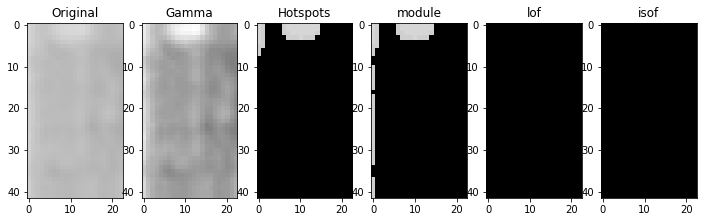

3714.jpg Normal
5365.jpg Normal
5403.jpg Junction-Box-Error
3072.jpg Junction-Box-Error
1665.jpg Normal
1671.jpg Normal
2378.jpg Normal
5417.jpg Normal
4709.jpg Normal
3066.jpg Normal
3700.jpg Normal
5371.jpg Normal
483.jpg Normal
1117.jpg Normal
1498.jpg Normal
2191.jpg Junction-Box-Error
4286.jpg Normal
5198.jpg Junction-Box-Error
4292.jpg Normal
2185.jpg Normal
118.jpg Multi-Hotspots


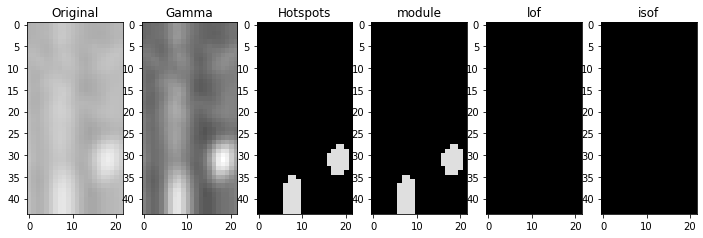

130.jpg Junction-Box-Error
656.jpg Junction-Box-Error
2813.jpg Single-Hotspot


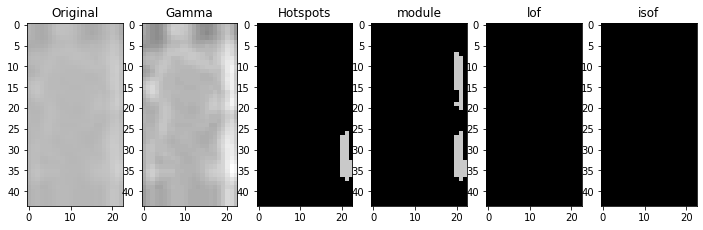

2807.jpg Normal
642.jpg Normal
124.jpg Normal
4523.jpg Junction-Box-Error
2152.jpg Normal
871.jpg Junction-Box-Error
31.jpg Multi-Hotspots


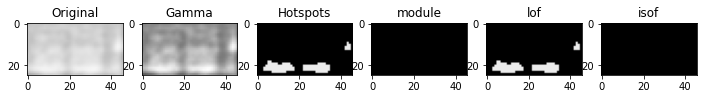

2634.jpg Normal
4245.jpg Normal
2620.jpg Normal
4251.jpg Normal
865.jpg Normal
25.jpg Multi-Hotspots


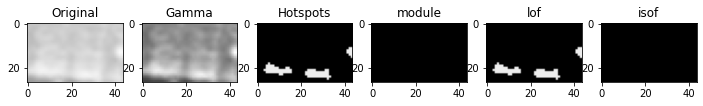

1329.jpg Junction-Box-Error
3258.jpg Normal
4537.jpg Junction-Box-Error
5629.jpg Normal
2146.jpg Normal
1467.jpg Single-Hotspot


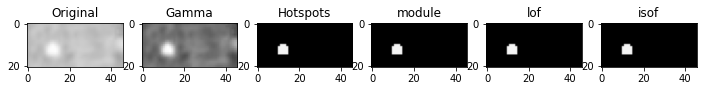

3270.jpg Normal
5601.jpg Junction-Box-Error
2608.jpg Normal
5167.jpg Junction-Box-Error
4279.jpg Junction-Box-Error
3516.jpg Normal
695.jpg Normal
1301.jpg Normal
859.jpg Normal
19.jpg Multi-Hotspots


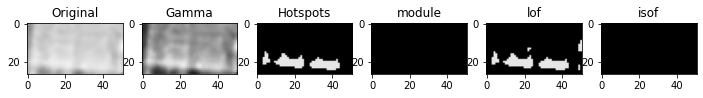

1315.jpg Normal
681.jpg Normal
5173.jpg Normal
3502.jpg Normal
3264.jpg Normal
5615.jpg Junction-Box-Error
1473.jpg Normal
4236.jpg Junction-Box-Error
3559.jpg Normal
2647.jpg Normal
5128.jpg Normal
42.jpg Junction-Box-Error
802.jpg Junction-Box-Error
1428.jpg Normal
2121.jpg Junction-Box-Error
4550.jpg Normal
2135.jpg Normal
4.jpg Junction-Box-Error
4544.jpg Normal
56.jpg Junction-Box-Error
816.jpg Normal
4222.jpg Junction-Box-Error
2653.jpg Normal
1372.jpg Normal
3565.jpg Normal
5114.jpg Junction-Box-Error
3203.jpg Normal
180.jpg Normal
1414.jpg Junction-Box-Error
1400.jpg Junction-Box-Error
194.jpg Normal
2109.jpg Junction-Box-Error
3217.jpg Normal
4578.jpg Normal
3571.jpg Normal
5100.jpg Normal
1366.jpg Normal
81.jpg Normal
619.jpg Normal
2684.jpg Normal
4593.jpg Normal
4587.jpg Normal
2690.jpg Normal
2848.jpg Normal
95.jpg Normal
1399.jpg Normal
2860.jpg Normal
625.jpg Normal
143.jpg Junction-Box-Error
157.jpg Normal
631.jpg Normal
2874.jpg Normal
4752.jpg Normal
2323.jpg Normal
3

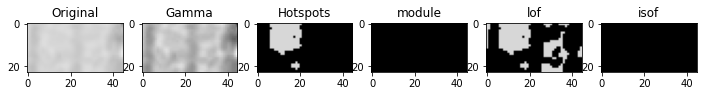

4975.jpg Junction-Box-Error
341.jpg Junction-Box-Error
427.jpg Junction-Box-Error
3968.jpg Normal
433.jpg Single-Hotspot


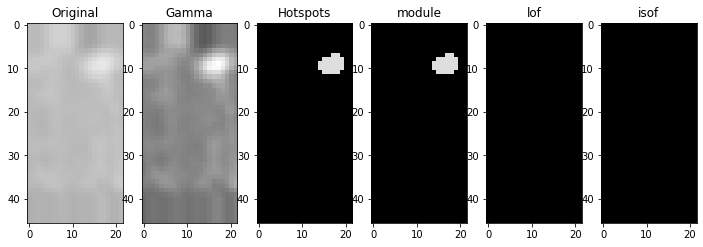

1819.jpg Normal
355.jpg Single-Hotspot


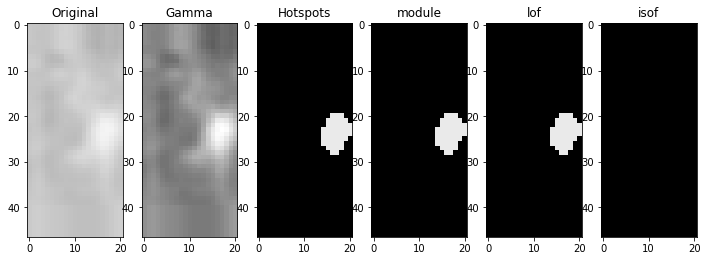

4961.jpg Junction-Box-Error
5538.jpg Junction-Box-Error
2257.jpg Normal
3149.jpg Normal
4626.jpg Normal
1986.jpg Normal
1038.jpg Normal
4140.jpg Normal
2531.jpg Normal
4154.jpg Normal
2525.jpg Junction-Box-Error
1992.jpg Junction-Box-Error
2243.jpg Multi-Hotspots


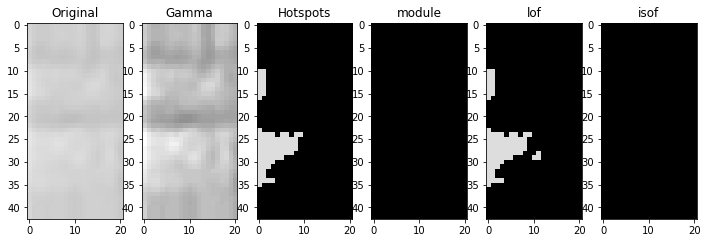

4632.jpg Normal
1762.jpg Normal
5504.jpg Junction-Box-Error
3175.jpg Normal
3613.jpg Normal
5262.jpg Normal
1004.jpg Normal
590.jpg Normal
584.jpg Normal
1010.jpg Normal
4168.jpg Junction-Box-Error
3607.jpg Normal
2519.jpg Normal
5276.jpg Junction-Box-Error
5510.jpg Junction-Box-Error
3161.jpg Normal
1776.jpg Normal
209.jpg Normal
1945.jpg Normal
2294.jpg Junction-Box-Error
3834.jpg Normal
4183.jpg Normal
3820.jpg Normal
5289.jpg Junction-Box-Error
4197.jpg Normal
2280.jpg Junction-Box-Error
4829.jpg Junction-Box-Error
1789.jpg Normal
1951.jpg Normal
4801.jpg Normal
235.jpg Normal
1979.jpg Normal
553.jpg Normal
3808.jpg Normal
547.jpg Normal
221.jpg Normal
4815.jpg Junction-Box-Error
2733.jpg Normal
4342.jpg Multi-Hotspots


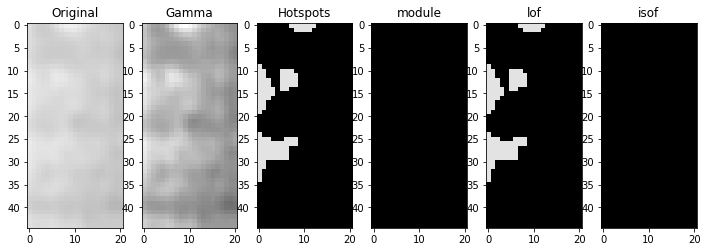

976.jpg Normal
4424.jpg Normal
2055.jpg Normal
4430.jpg Normal
2041.jpg Normal
1548.jpg Junction-Box-Error
962.jpg Normal
5048.jpg Normal
2727.jpg Normal
3439.jpg Normal
4356.jpg Normal
792.jpg Normal
1206.jpg Normal
5060.jpg Junction-Box-Error
3411.jpg Normal
4418.jpg Normal
3377.jpg Normal
2069.jpg Normal
1560.jpg Normal
1574.jpg Junction-Box-Error
3363.jpg Normal
5074.jpg Normal
3405.jpg Normal
1212.jpg Junction-Box-Error
786.jpg Normal
4381.jpg Junction-Box-Error
2928.jpg Normal
2096.jpg Normal
3388.jpg Normal
2082.jpg Normal
4395.jpg Junction-Box-Error
779.jpg Normal
2914.jpg Normal
751.jpg Normal
989.jpg Normal
745.jpg Junction-Box-Error
2900.jpg Normal
2901.jpg Normal
744.jpg Normal
988.jpg Normal
750.jpg Normal
2915.jpg Normal
2083.jpg Normal
778.jpg Normal
4394.jpg Normal
2929.jpg Normal
4380.jpg Normal
3389.jpg Normal
2097.jpg Normal
3362.jpg Normal
1575.jpg Normal
787.jpg Normal
1213.jpg Junction-Box-Error
3404.jpg Normal
5075.jpg Junction-Box-Error
3410.jpg Normal
5061.jpg 

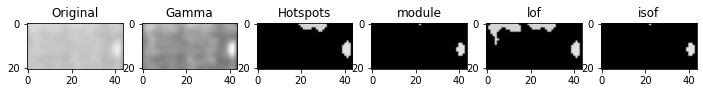

3376.jpg Normal
4419.jpg Normal
1549.jpg Normal
2040.jpg Normal
4431.jpg Junction-Box-Error
4357.jpg Normal
3438.jpg Normal
2726.jpg Normal
5049.jpg Junction-Box-Error
963.jpg Normal
977.jpg Normal
4343.jpg Normal
2732.jpg Junction-Box-Error
2054.jpg Normal
4425.jpg Junction-Box-Error
546.jpg Normal
4814.jpg Junction-Box-Error
220.jpg Junction-Box-Error
1978.jpg Normal
234.jpg Normal
4800.jpg Normal
3809.jpg Normal
552.jpg Normal
4196.jpg Normal
5288.jpg Junction-Box-Error
3821.jpg Normal
1950.jpg Normal
1788.jpg Normal
4828.jpg Junction-Box-Error
2281.jpg Normal
2295.jpg Junction-Box-Error
1944.jpg Normal
208.jpg Junction-Box-Error
4182.jpg Normal
3835.jpg Normal
5277.jpg Junction-Box-Error
2518.jpg Normal
3606.jpg Normal
4169.jpg Normal
1011.jpg Normal
585.jpg Normal
1777.jpg Junction-Box-Error
3160.jpg Normal
5511.jpg Junction-Box-Error
3174.jpg Normal
5505.jpg Junction-Box-Error
1763.jpg Single-Hotspot


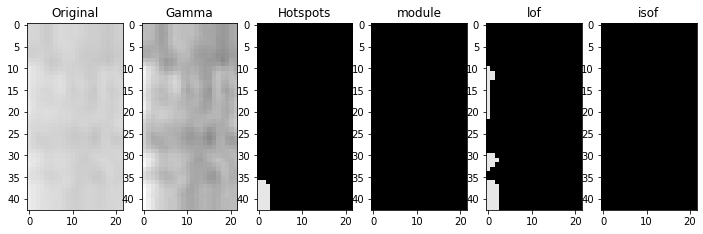

591.jpg Normal
1005.jpg Normal
5263.jpg Normal
3612.jpg Normal
2524.jpg Normal
4155.jpg Normal
4633.jpg Normal
2242.jpg Normal
1993.jpg Normal
1987.jpg Junction-Box-Error
4627.jpg Normal
3148.jpg Normal
2256.jpg Normal
5539.jpg Junction-Box-Error
2530.jpg Normal
4141.jpg Single-Hotspot


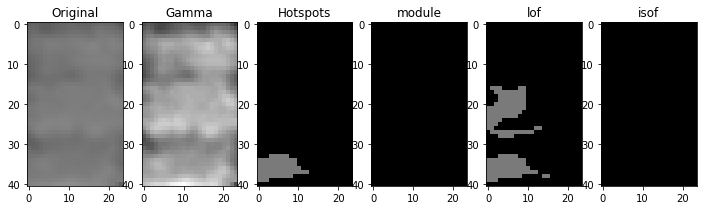

1039.jpg Normal
432.jpg Normal
3969.jpg Normal
4960.jpg Junction-Box-Error
354.jpg Normal
1818.jpg Normal
340.jpg Junction-Box-Error
4974.jpg Normal
426.jpg Normal
2493.jpg Normal
3955.jpg Normal
368.jpg Normal
1824.jpg Junction-Box-Error
4784.jpg Normal
4790.jpg Normal
4948.jpg Junction-Box-Error
1830.jpg Normal
2487.jpg Junction-Box-Error
3941.jpg Normal
3799.jpg Normal
3772.jpg Normal
5303.jpg Junction-Box-Error
1165.jpg Normal
1603.jpg Normal
397.jpg Junction-Box-Error
5465.jpg Junction-Box-Error
3014.jpg Normal
5471.jpg Junction-Box-Error
3000.jpg Normal
383.jpg Normal
1617.jpg Normal
1171.jpg Normal
4009.jpg Normal
3766.jpg Normal
2478.jpg Normal
5317.jpg Junction-Box-Error
1159.jpg Normal
4021.jpg Normal
2450.jpg Single-Hotspot


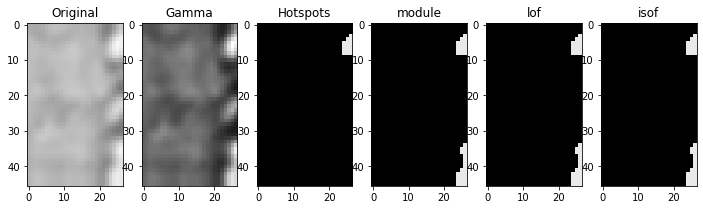

3996.jpg Junction-Box-Error
5459.jpg Junction-Box-Error
2336.jpg Normal
3028.jpg Junction-Box-Error
4747.jpg Junction-Box-Error
2322.jpg Normal
4753.jpg Junction-Box-Error
4035.jpg Junction-Box-Error
2444.jpg Normal
3982.jpg Normal
156.jpg Normal
2875.jpg Normal
630.jpg Normal
624.jpg Junction-Box-Error
2861.jpg Normal
142.jpg Normal
4586.jpg Junction-Box-Error
1398.jpg Normal
94.jpg Junction-Box-Error
2849.jpg Normal
2691.jpg Normal
2685.jpg Junction-Box-Error
618.jpg Normal
80.jpg Normal
4592.jpg Normal
4579.jpg Normal
3216.jpg Normal
2108.jpg Single-Hotspot


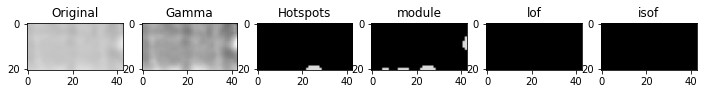

195.jpg Junction-Box-Error
1401.jpg Multi-Hotspots


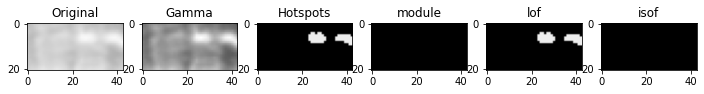

1367.jpg Normal
5101.jpg Junction-Box-Error
3570.jpg Normal
5115.jpg Normal
3564.jpg Normal
1373.jpg Normal
1415.jpg Single-Hotspot


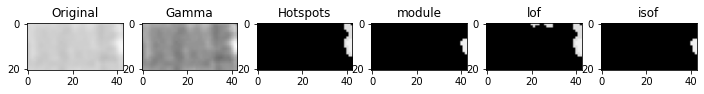

181.jpg Junction-Box-Error
3202.jpg Multi-Hotspots


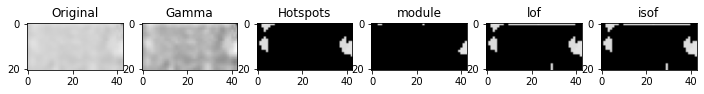

4545.jpg Normal
5.jpg Multi-Hotspots


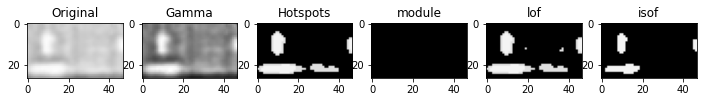

2134.jpg Normal
2652.jpg Junction-Box-Error
4223.jpg Normal
817.jpg Normal
57.jpg Normal
803.jpg Normal
43.jpg Multi-Hotspots


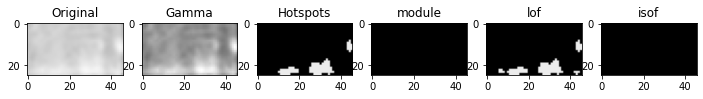

5129.jpg Junction-Box-Error
2646.jpg Normal
3558.jpg Normal
4237.jpg Normal
4551.jpg Junction-Box-Error
2120.jpg Normal
1429.jpg Single-Hotspot


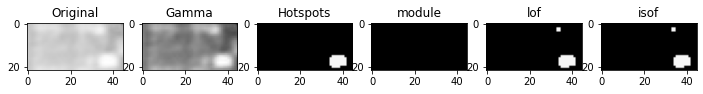

55.jpg Junction-Box-Error
1359.jpg Normal
815.jpg Normal
2888.jpg Normal
4221.jpg Normal
2650.jpg Normal
2136.jpg Normal
3228.jpg Normal
7.jpg Multi-Hotspots


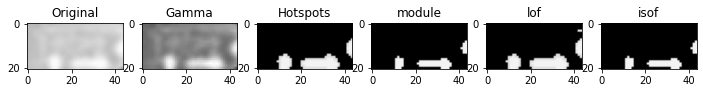

4547.jpg Normal
2122.jpg Normal
4553.jpg Normal
4235.jpg Normal
2644.jpg Normal
41.jpg Normal
801.jpg Normal
3572.jpg Junction-Box-Error
5103.jpg Junction-Box-Error
69.jpg Normal
1365.jpg Junction-Box-Error
829.jpg Normal
1403.jpg Normal
197.jpg Junction-Box-Error
3214.jpg Normal
3200.jpg Normal
183.jpg Normal
1417.jpg Normal
1371.jpg Junction-Box-Error
4209.jpg Normal
3566.jpg Normal
2678.jpg Normal
5117.jpg Junction-Box-Error
2693.jpg Normal
96.jpg Junction-Box-Error
168.jpg Multi-Hotspots


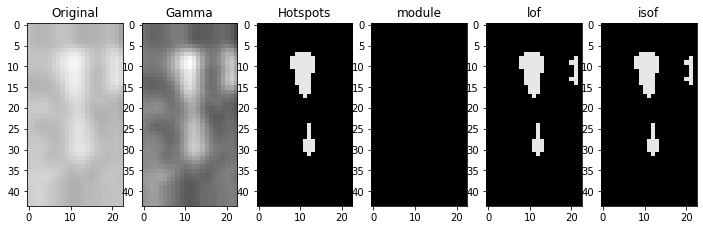

4584.jpg Normal
4590.jpg Normal
82.jpg Junction-Box-Error
2687.jpg Junction-Box-Error
3599.jpg Normal
632.jpg Normal
2877.jpg Normal
154.jpg Normal
140.jpg Multi-Hotspots


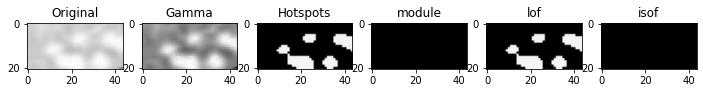

2863.jpg Junction-Box-Error
626.jpg Normal
4745.jpg Normal
2334.jpg Normal
3994.jpg Normal
2452.jpg Normal
4023.jpg Normal
5329.jpg Junction-Box-Error
3980.jpg Normal
2446.jpg Normal
3758.jpg Normal
4037.jpg Normal
4751.jpg Normal
4989.jpg Normal
2320.jpg Normal
1629.jpg Normal
4779.jpg Normal
3016.jpg Junction-Box-Error
2308.jpg Normal
5467.jpg Junction-Box-Error
395.jpg Normal
1601.jpg Normal
1167.jpg Normal
5301.jpg Normal
3770.jpg Normal
5315.jpg Normal
3764.jpg Normal
1173.jpg Normal
1615.jpg Normal
381.jpg Normal
3002.jpg Normal
5473.jpg Normal
5498.jpg Normal
4786.jpg Junction-Box-Error
1826.jpg Normal
1198.jpg Normal
3957.jpg Normal
2491.jpg Normal
3943.jpg Normal
2485.jpg Normal
418.jpg Normal
1832.jpg Normal
4792.jpg Normal
356.jpg Single-Hotspot


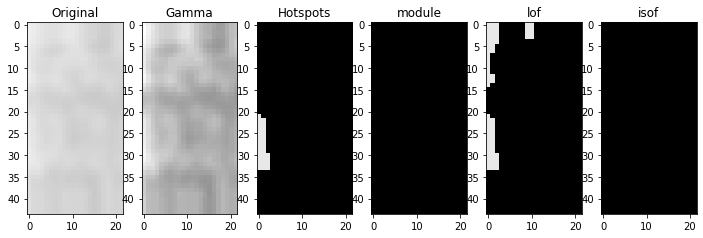

4962.jpg Normal
430.jpg Junction-Box-Error
424.jpg Normal
4976.jpg Junction-Box-Error
342.jpg Normal
1991.jpg Normal
1749.jpg Normal
2240.jpg Normal
4631.jpg Junction-Box-Error
4157.jpg Normal
3638.jpg Normal
2526.jpg Normal
5249.jpg Junction-Box-Error
4143.jpg Normal
2532.jpg Junction-Box-Error
2254.jpg Junction-Box-Error
4625.jpg Junction-Box-Error
1985.jpg Normal
5513.jpg Normal
3162.jpg Junction-Box-Error
1775.jpg Normal
587.jpg Junction-Box-Error
1013.jpg Normal
3604.jpg Normal
5275.jpg Junction-Box-Error
3610.jpg Normal
5261.jpg Normal
1007.jpg Normal
593.jpg Junction-Box-Error
1761.jpg Normal
5507.jpg Junction-Box-Error
2268.jpg Normal
3176.jpg Normal
4619.jpg Normal
2283.jpg Normal
1952.jpg Normal
578.jpg Normal
3823.jpg Normal
4194.jpg Normal
3837.jpg Normal
4180.jpg Normal
1946.jpg Junction-Box-Error
3189.jpg Junction-Box-Error
2297.jpg Junction-Box-Error
222.jpg Normal
4816.jpg Normal
544.jpg Junction-Box-Error
550.jpg Junction-Box-Error
4802.jpg Junction-Box-Error
236.jpg N

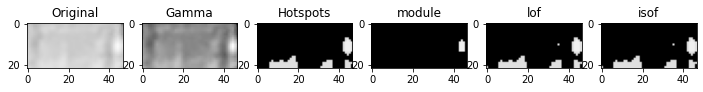

791.jpg Normal
1205.jpg Normal
5063.jpg Junction-Box-Error
3412.jpg Normal
4396.jpg Junction-Box-Error
5088.jpg Normal
1588.jpg Junction-Box-Error
2081.jpg Junction-Box-Error
2095.jpg Normal
4382.jpg Normal
746.jpg Normal
2903.jpg Junction-Box-Error
2917.jpg Normal
752.jpg Normal
753.jpg Single-Hotspot


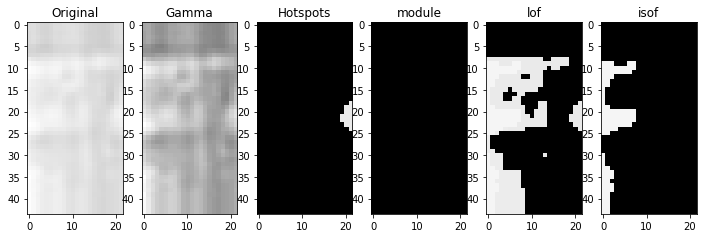

2916.jpg Normal
2902.jpg Normal
747.jpg Normal
2094.jpg Junction-Box-Error
4383.jpg Normal
5089.jpg Normal
4397.jpg Junction-Box-Error
2080.jpg Normal
1589.jpg Normal
1562.jpg Normal
3375.jpg Normal
3413.jpg Junction-Box-Error
5062.jpg Junction-Box-Error
1204.jpg Normal
790.jpg Junction-Box-Error
948.jpg Normal
784.jpg Normal
1210.jpg Normal
4368.jpg Normal
3407.jpg Normal
2719.jpg Junction-Box-Error
5076.jpg Junction-Box-Error
3361.jpg Normal
1576.jpg Normal
2057.jpg Junction-Box-Error
3349.jpg Normal
4426.jpg Junction-Box-Error
1238.jpg Normal
974.jpg Junction-Box-Error
4340.jpg Normal
2731.jpg Normal
4354.jpg Normal
2725.jpg Normal
960.jpg Normal
2043.jpg Junction-Box-Error
4432.jpg Normal
551.jpg Junction-Box-Error
237.jpg Normal
4803.jpg Junction-Box-Error
4817.jpg Normal
223.jpg Junction-Box-Error
545.jpg Normal
4181.jpg Junction-Box-Error
3836.jpg Normal
2296.jpg Normal
3188.jpg Normal
1947.jpg Junction-Box-Error
1953.jpg Normal
2282.jpg Normal
4195.jpg Normal
3822.jpg Junction-

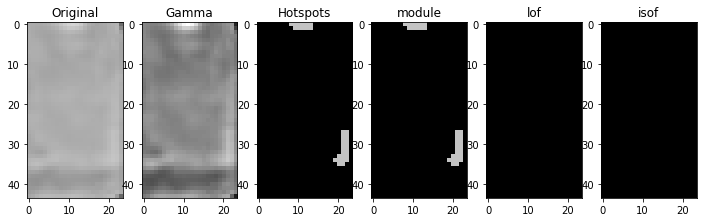

2241.jpg Junction-Box-Error
1748.jpg Junction-Box-Error
1990.jpg Junction-Box-Error
5248.jpg Single-Hotspot


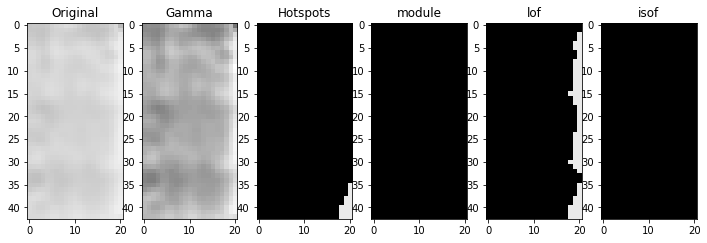

2527.jpg Normal
3639.jpg Normal
4156.jpg Normal
425.jpg Normal
343.jpg Normal
4977.jpg Junction-Box-Error
4963.jpg Normal
357.jpg Normal
431.jpg Normal
419.jpg Normal
2484.jpg Normal
3942.jpg Normal
4793.jpg Normal
1833.jpg Normal
1827.jpg Normal
4787.jpg Junction-Box-Error
5499.jpg Junction-Box-Error
2490.jpg Single-Hotspot


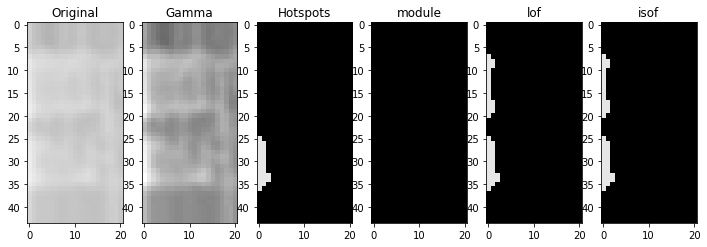

3956.jpg Normal
1199.jpg Normal
1172.jpg Normal
3765.jpg Normal
5314.jpg Normal
5472.jpg Junction-Box-Error
3003.jpg Normal
380.jpg Multi-Hotspots


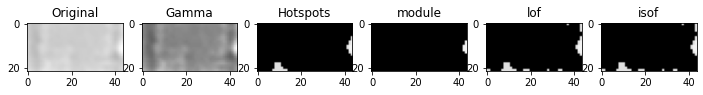

1614.jpg Normal
1600.jpg Junction-Box-Error
394.jpg Multi-Hotspots


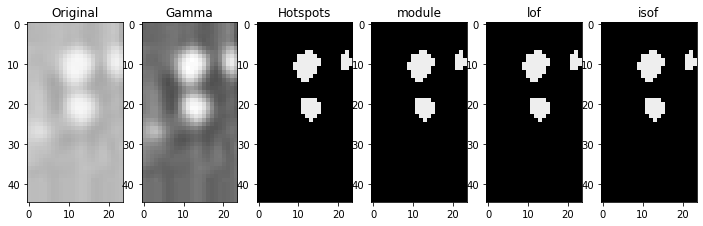

5466.jpg Normal
2309.jpg Normal
3017.jpg Junction-Box-Error
4778.jpg Junction-Box-Error
3771.jpg Normal
5300.jpg Normal
1166.jpg Normal
4036.jpg Normal
3759.jpg Normal
2447.jpg Normal
3981.jpg Junction-Box-Error
5328.jpg Junction-Box-Error
1628.jpg Normal
2321.jpg Normal
4988.jpg Junction-Box-Error
4750.jpg Junction-Box-Error
2335.jpg Normal
4744.jpg Normal
4022.jpg Normal
2453.jpg Normal
3995.jpg Normal
141.jpg Normal
627.jpg Normal
2862.jpg Normal
2876.jpg Normal
633.jpg Normal
155.jpg Junction-Box-Error
4591.jpg Normal
3598.jpg Normal
2686.jpg Normal
83.jpg Junction-Box-Error
97.jpg Junction-Box-Error
2692.jpg Junction-Box-Error
4585.jpg Normal
169.jpg Normal
1416.jpg Normal
182.jpg Junction-Box-Error
3201.jpg Normal
5116.jpg Junction-Box-Error
2679.jpg Normal
3567.jpg Normal
4208.jpg Normal
1370.jpg Junction-Box-Error
828.jpg Normal
1364.jpg Normal
68.jpg Junction-Box-Error
5102.jpg Normal
3573.jpg Normal
3215.jpg Junction-Box-Error
196.jpg Normal
1402.jpg Normal
4552.jpg Junction-

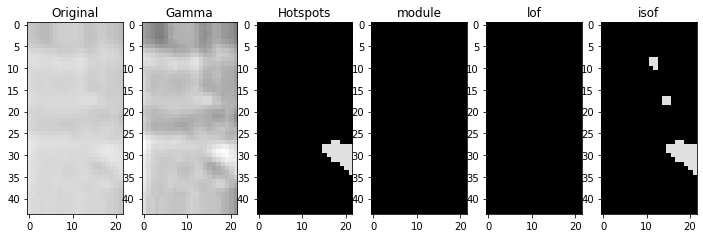

800.jpg Normal
40.jpg Junction-Box-Error
2645.jpg Junction-Box-Error
4234.jpg Normal
2651.jpg Normal
4220.jpg Normal
2889.jpg Junction-Box-Error
814.jpg Normal
1358.jpg Normal
54.jpg Normal
4546.jpg Normal
6.jpg Junction-Box-Error
3229.jpg Junction-Box-Error
2137.jpg Normal
1406.jpg Normal
192.jpg Junction-Box-Error
3211.jpg Normal
3577.jpg Normal
4218.jpg Normal
5106.jpg Junction-Box-Error
2669.jpg Normal
1360.jpg Normal
1374.jpg Normal
78.jpg Normal
838.jpg Normal
3563.jpg Normal
5112.jpg Junction-Box-Error
3205.jpg Normal
186.jpg Normal
1412.jpg Normal
2133.jpg Junction-Box-Error
4542.jpg Normal
2.jpg Junction-Box-Error
50.jpg Junction-Box-Error
810.jpg Junction-Box-Error
4224.jpg Normal
2655.jpg Normal
2899.jpg Normal
4230.jpg Junction-Box-Error
2641.jpg Normal
1348.jpg Junction-Box-Error
44.jpg Single-Hotspot


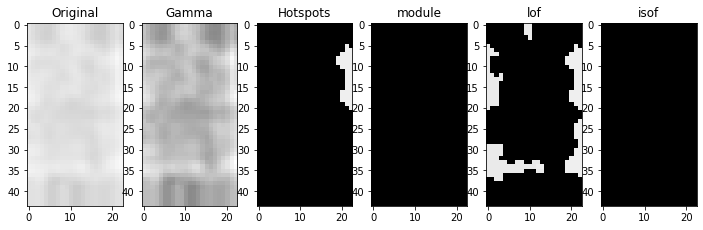

804.jpg Normal
2127.jpg Normal
4556.jpg Normal
3239.jpg Normal
151.jpg Normal
637.jpg Multi-Hotspots


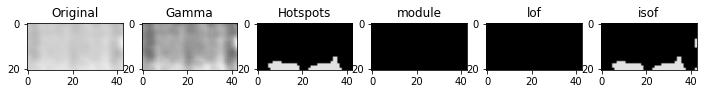

2872.jpg Junction-Box-Error
2866.jpg Normal
623.jpg Single-Hotspot


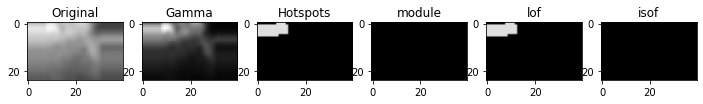

145.jpg Junction-Box-Error
4581.jpg Normal
2696.jpg Normal
3588.jpg Normal
93.jpg Junction-Box-Error
87.jpg Junction-Box-Error
2682.jpg Normal
4595.jpg Normal
179.jpg Junction-Box-Error
1162.jpg Normal
5304.jpg Junction-Box-Error
3775.jpg Normal
3013.jpg Normal
5462.jpg Junction-Box-Error
390.jpg Normal
1604.jpg Normal
1610.jpg Normal
384.jpg Multi-Hotspots


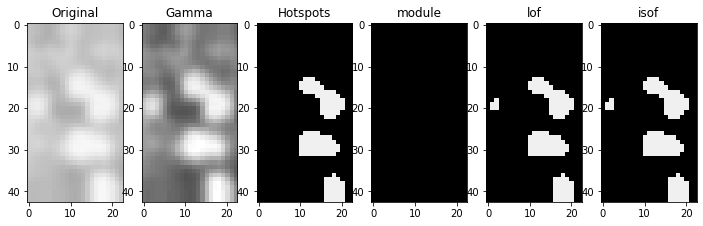

3007.jpg Normal
4768.jpg Normal
5476.jpg Junction-Box-Error
2319.jpg Junction-Box-Error
5310.jpg Junction-Box-Error
3761.jpg Normal
1176.jpg Normal
2457.jpg Normal
5338.jpg Junction-Box-Error
3991.jpg Junction-Box-Error
4026.jpg Normal
3749.jpg Normal
1638.jpg Normal
4740.jpg Junction-Box-Error
4998.jpg Junction-Box-Error
2331.jpg Normal
4754.jpg Junction-Box-Error
2325.jpg Multi-Hotspots


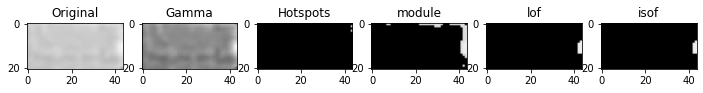

2443.jpg Normal
3985.jpg Normal
4032.jpg Normal
435.jpg Junction-Box-Error
353.jpg Single-Hotspot


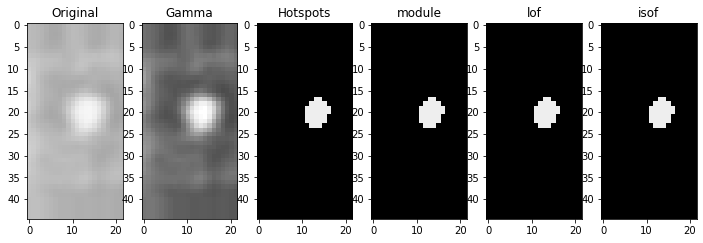

4967.jpg Normal
4973.jpg Junction-Box-Error
347.jpg Normal
421.jpg Normal
409.jpg Normal
2494.jpg Junction-Box-Error
3952.jpg Normal
4783.jpg Junction-Box-Error
1823.jpg Junction-Box-Error
1837.jpg Normal
5489.jpg Junction-Box-Error
4797.jpg Junction-Box-Error
2480.jpg Normal
3946.jpg Normal
1189.jpg Normal
582.jpg Normal
1016.jpg Normal
3601.jpg Normal
5270.jpg Normal
2279.jpg Single-Hotspot


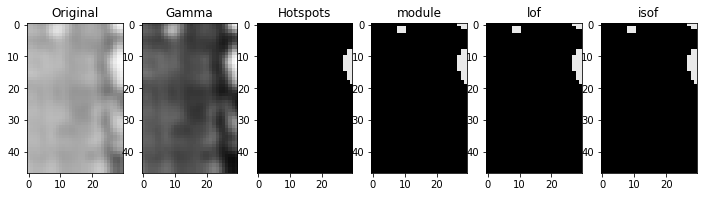

5516.jpg Junction-Box-Error
4608.jpg Junction-Box-Error
3167.jpg Multi-Hotspots


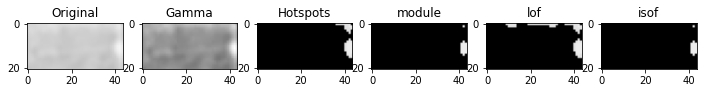

1770.jpg Normal
1764.jpg Normal
5502.jpg Normal
3173.jpg Normal
3615.jpg Normal
5264.jpg Normal
1002.jpg Normal
596.jpg Normal
4152.jpg Normal
2523.jpg Normal
1994.jpg Normal
2245.jpg Normal
4634.jpg Normal
2251.jpg Normal
4620.jpg Normal
1980.jpg Normal
1758.jpg Single-Hotspot


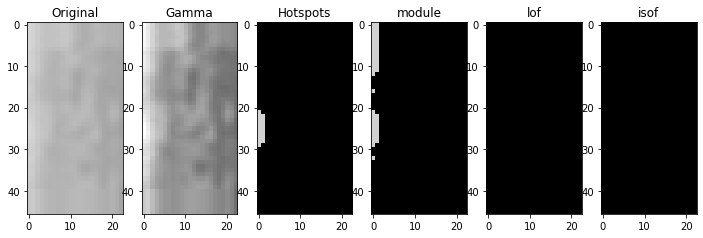

3629.jpg Normal
4146.jpg Normal
5258.jpg Single-Hotspot


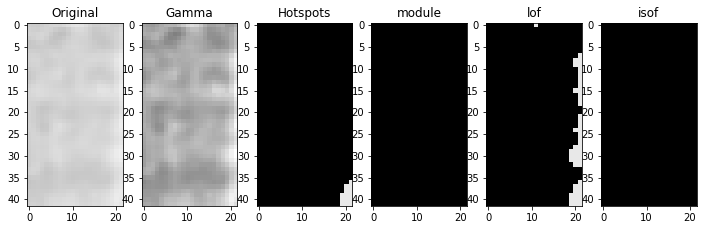

2537.jpg Normal
541.jpg Normal
227.jpg Normal
4813.jpg Normal
4807.jpg Normal
233.jpg Junction-Box-Error
555.jpg Multi-Hotspots


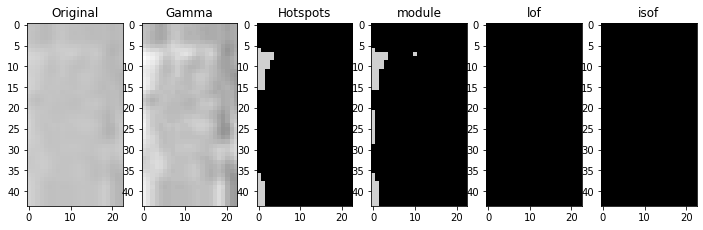

3826.jpg Junction-Box-Error
4191.jpg Normal
3198.jpg Normal
2286.jpg Normal
1957.jpg Normal
1943.jpg Normal
2292.jpg Normal
3832.jpg Normal
4185.jpg Normal
569.jpg Normal
1572.jpg Normal
3365.jpg Normal
5072.jpg Junction-Box-Error
3403.jpg Normal
958.jpg Normal
1214.jpg Normal
780.jpg Junction-Box-Error
794.jpg Normal
1200.jpg Junction-Box-Error
2709.jpg Junction-Box-Error
5066.jpg Normal
4378.jpg Normal
3417.jpg Multi-Hotspots


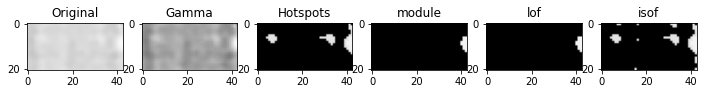

3371.jpg Normal
1566.jpg Normal
3359.jpg Normal
4436.jpg Normal
2047.jpg Normal
964.jpg Normal
1228.jpg Junction-Box-Error
2721.jpg Normal
4350.jpg Normal
2735.jpg Normal
4344.jpg Junction-Box-Error
970.jpg Junction-Box-Error
4422.jpg Normal
2053.jpg Normal
743.jpg Normal
2906.jpg Normal
2912.jpg Normal
757.jpg Normal
2084.jpg Junction-Box-Error
4393.jpg Junction-Box-Error
4387.jpg Normal
5099.jpg Junction-Box-Error
2090.jpg Normal
1599.jpg Normal
5098.jpg Normal
4386.jpg Junction-Box-Error
1598.jpg Normal
2091.jpg Normal
2085.jpg Normal
4392.jpg Normal
756.jpg Multi-Hotspots


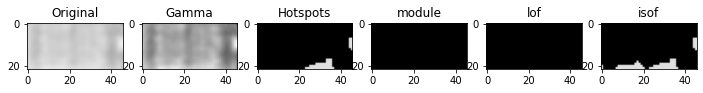

2913.jpg Junction-Box-Error
2907.jpg Normal
742.jpg Normal
971.jpg Normal
4345.jpg Normal
2734.jpg Normal
2052.jpg Normal
4423.jpg Normal
2046.jpg Normal
4437.jpg Junction-Box-Error
3358.jpg Normal
4351.jpg Normal
2720.jpg Normal
1229.jpg Normal
965.jpg Normal
3416.jpg Normal
4379.jpg Normal
5067.jpg Junction-Box-Error
2708.jpg Normal
1201.jpg Normal
795.jpg Normal
1567.jpg Single-Hotspot


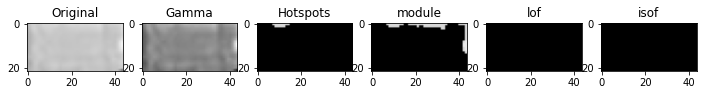

3370.jpg Normal
3364.jpg Normal
1573.jpg Normal
781.jpg Normal
1215.jpg Normal
959.jpg Normal
3402.jpg Normal
5073.jpg Normal
2293.jpg Normal
1942.jpg Junction-Box-Error
568.jpg Normal
4184.jpg Junction-Box-Error
3833.jpg Normal
4190.jpg Normal
3827.jpg Junction-Box-Error
1956.jpg Normal
2287.jpg Normal
3199.jpg Normal
232.jpg Normal
4806.jpg Normal
554.jpg Normal
540.jpg Normal
4812.jpg Junction-Box-Error
226.jpg Junction-Box-Error
1759.jpg Junction-Box-Error
1981.jpg Normal
4621.jpg Normal
2250.jpg Normal
2536.jpg Multi-Hotspots


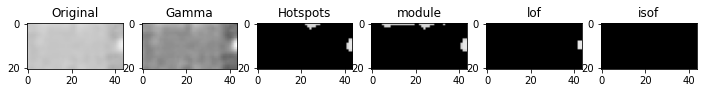

5259.jpg Junction-Box-Error
4147.jpg Junction-Box-Error
3628.jpg Normal
2522.jpg Junction-Box-Error
4153.jpg Normal
4635.jpg Normal
2244.jpg Normal
1995.jpg Normal
3172.jpg Junction-Box-Error
5503.jpg Normal
1765.jpg Normal
597.jpg Junction-Box-Error
1003.jpg Normal
5265.jpg Junction-Box-Error
3614.jpg Normal
5271.jpg Normal
3600.jpg Normal
1017.jpg Normal
583.jpg Normal
1771.jpg Normal
3166.jpg Normal
4609.jpg Normal
5517.jpg Junction-Box-Error
2278.jpg Normal
4796.jpg Junction-Box-Error
5488.jpg Junction-Box-Error
1836.jpg Normal
1188.jpg Normal
3947.jpg Normal
2481.jpg Normal
3953.jpg Normal
2495.jpg Normal
408.jpg Normal
1822.jpg Normal
4782.jpg Normal
346.jpg Junction-Box-Error
4972.jpg Normal
420.jpg Single-Hotspot


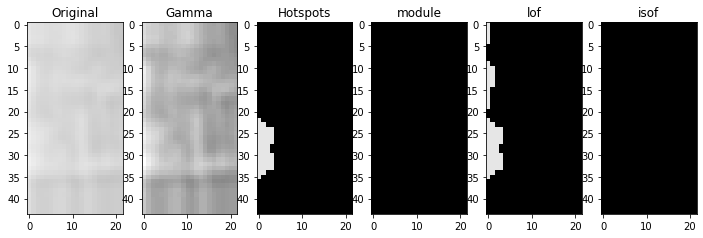

434.jpg Normal
4966.jpg Junction-Box-Error
352.jpg Normal
2324.jpg Normal
4755.jpg Normal
4033.jpg Normal
3984.jpg Normal
2442.jpg Normal
3748.jpg Normal
4027.jpg Normal
3990.jpg Normal
5339.jpg Junction-Box-Error
2456.jpg Junction-Box-Error
2330.jpg Normal
4999.jpg Junction-Box-Error
4741.jpg Junction-Box-Error
1639.jpg Normal
2318.jpg Junction-Box-Error
5477.jpg Normal
4769.jpg Normal
3006.jpg Normal
385.jpg Normal
1611.jpg Junction-Box-Error
1177.jpg Normal
3760.jpg Normal
5311.jpg Normal
3774.jpg Normal
5305.jpg Normal
1163.jpg Normal
1605.jpg Normal
391.jpg Junction-Box-Error
5463.jpg Junction-Box-Error
3012.jpg Junction-Box-Error
2683.jpg Normal
86.jpg Normal
178.jpg Normal
4594.jpg Normal
4580.jpg Normal
92.jpg Normal
3589.jpg Normal
2697.jpg Normal
622.jpg Normal
2867.jpg Normal
144.jpg Junction-Box-Error
150.jpg Normal
2873.jpg Normal
636.jpg Normal
805.jpg Normal
45.jpg Normal
1349.jpg Normal
2640.jpg Normal
4231.jpg Normal
2898.jpg Normal
3238.jpg Normal
4557.jpg Normal
2126

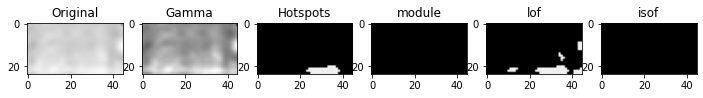

4582.jpg Normal
5313.jpg Junction-Box-Error
3762.jpg Normal
1175.jpg Normal
1613.jpg Normal
387.jpg Normal
3004.jpg Junction-Box-Error
5475.jpg Junction-Box-Error
3010.jpg Normal
5461.jpg Junction-Box-Error
393.jpg Normal
1607.jpg Normal
1161.jpg Normal
2468.jpg Normal
5307.jpg Junction-Box-Error
4019.jpg Normal
3776.jpg Normal
1149.jpg Normal
2440.jpg Junction-Box-Error
3986.jpg Normal
4031.jpg Normal
3038.jpg Normal
4757.jpg Normal
5449.jpg Junction-Box-Error
2326.jpg Junction-Box-Error
4743.jpg Junction-Box-Error
2332.jpg Junction-Box-Error
2454.jpg Normal
3992.jpg Normal
4025.jpg Normal
422.jpg Normal
3979.jpg Normal
4970.jpg Junction-Box-Error
1808.jpg Normal
344.jpg Normal
350.jpg Normal
4964.jpg Normal
436.jpg Multi-Hotspots


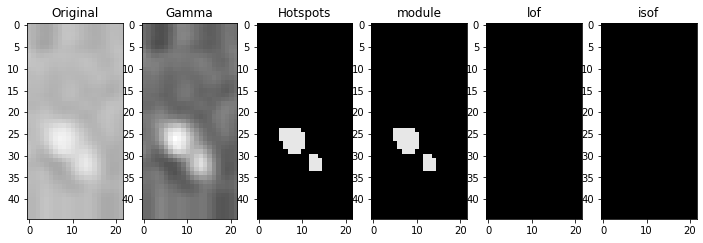

2483.jpg Normal
3945.jpg Junction-Box-Error
1834.jpg Normal
378.jpg Single-Hotspot


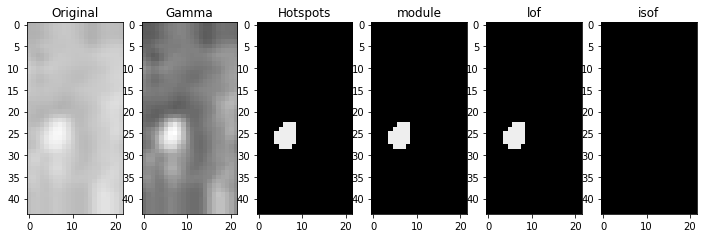

4794.jpg Normal
4958.jpg Normal
4780.jpg Normal
1820.jpg Normal
3789.jpg Normal
2497.jpg Normal
3951.jpg Normal
3616.jpg Normal
4179.jpg Normal
5267.jpg Normal
2508.jpg Junction-Box-Error
1001.jpg Normal
595.jpg Normal
1767.jpg Normal
5501.jpg Junction-Box-Error
3170.jpg Normal
5515.jpg Junction-Box-Error
3164.jpg Normal
1773.jpg Normal
581.jpg Junction-Box-Error
1015.jpg Normal
3602.jpg Normal
5273.jpg Junction-Box-Error
4145.jpg Normal
2534.jpg Normal
2252.jpg Junction-Box-Error
4623.jpg Junction-Box-Error
1983.jpg Normal
1997.jpg Normal
2246.jpg Junction-Box-Error
5529.jpg Multi-Hotspots


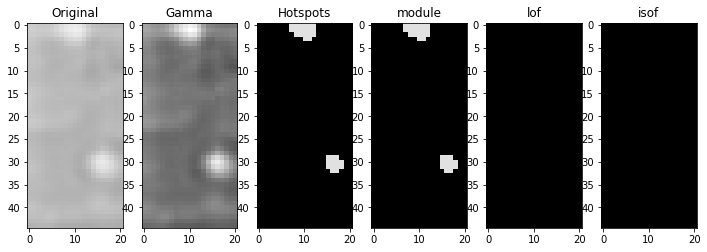

4637.jpg Junction-Box-Error
3158.jpg Normal
4151.jpg Normal
2520.jpg Normal
1029.jpg Normal
556.jpg Normal
4804.jpg Junction-Box-Error
230.jpg Junction-Box-Error
224.jpg Multi-Hotspots


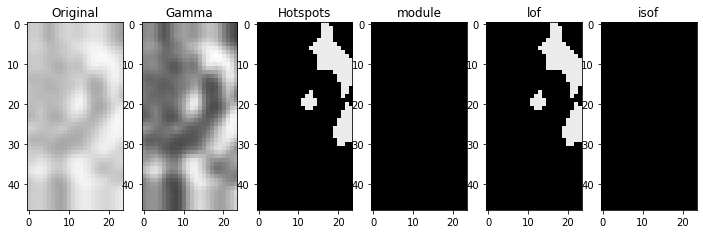

1968.jpg Normal
4810.jpg Multi-Hotspots


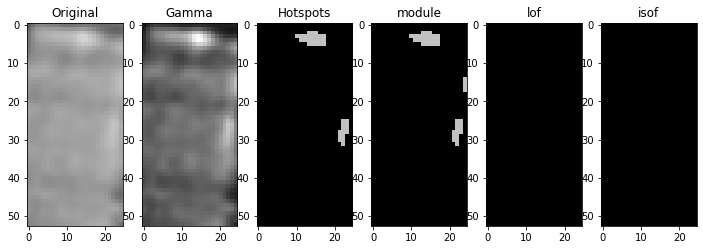

3819.jpg Normal
542.jpg Junction-Box-Error
3831.jpg Junction-Box-Error
5298.jpg Junction-Box-Error
4186.jpg Normal
1798.jpg Normal
1940.jpg Normal
2291.jpg Junction-Box-Error
4838.jpg Junction-Box-Error
2285.jpg Junction-Box-Error
218.jpg Multi-Hotspots


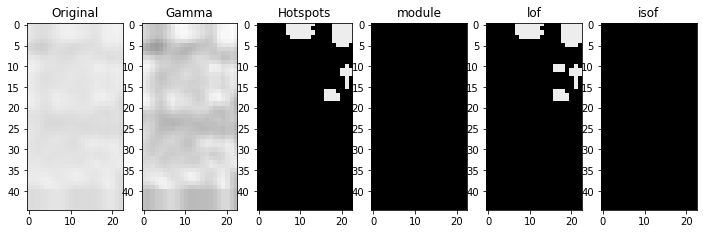

1954.jpg Multi-Hotspots


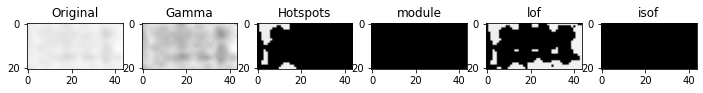

3825.jpg Normal
4192.jpg Normal
3372.jpg Normal
1565.jpg Junction-Box-Error
797.jpg Junction-Box-Error
1203.jpg Normal
5065.jpg Junction-Box-Error
3414.jpg Normal
5071.jpg Junction-Box-Error
3400.jpg Normal
1217.jpg Normal
783.jpg Junction-Box-Error
1571.jpg Junction-Box-Error
3366.jpg Normal
4409.jpg Junction-Box-Error
2078.jpg Normal
1559.jpg Normal
4421.jpg Junction-Box-Error
2050.jpg Normal
2736.jpg Junction-Box-Error
5059.jpg Normal
4347.jpg Junction-Box-Error
3428.jpg Normal
973.jpg Normal
967.jpg Normal
2722.jpg Normal
4353.jpg Junction-Box-Error
4435.jpg Normal
2044.jpg Single-Hotspot


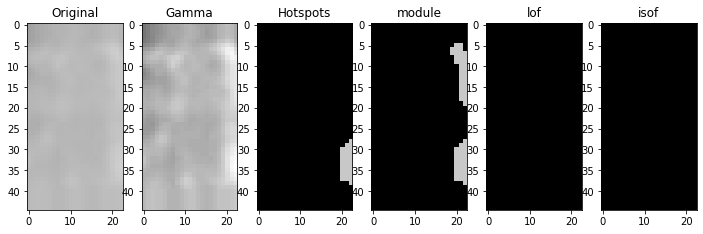

2911.jpg Normal
754.jpg Normal
740.jpg Junction-Box-Error
998.jpg Normal
2905.jpg Junction-Box-Error
2093.jpg Normal
768.jpg Normal
4384.jpg Normal
4390.jpg Normal
2939.jpg Junction-Box-Error
2087.jpg Normal
3399.jpg Normal
2938.jpg Normal
4391.jpg Normal
3398.jpg Normal
2086.jpg Normal
2092.jpg Normal
4385.jpg Normal
769.jpg Normal
2904.jpg Junction-Box-Error
999.jpg Normal
741.jpg Normal
755.jpg Normal
2910.jpg Normal
4352.jpg Normal
2723.jpg Normal
966.jpg Normal
2045.jpg Junction-Box-Error
4434.jpg Junction-Box-Error
2051.jpg Normal
4420.jpg Normal
1558.jpg Single-Hotspot


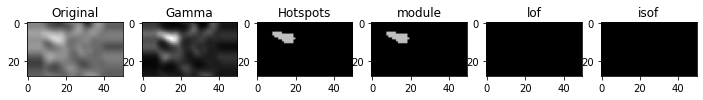

972.jpg Normal
3429.jpg Normal
4346.jpg Normal
5058.jpg Normal
2737.jpg Normal
782.jpg Normal
1216.jpg Normal
3401.jpg Normal
5070.jpg Junction-Box-Error
2079.jpg Normal
4408.jpg Normal
3367.jpg Normal
1570.jpg Normal
1564.jpg Normal
3373.jpg Normal
3415.jpg Normal
5064.jpg Junction-Box-Error
1202.jpg Normal
796.jpg Normal
1955.jpg Normal
219.jpg Normal
2284.jpg Normal
4193.jpg Junction-Box-Error
3824.jpg Normal
4187.jpg Normal
5299.jpg Junction-Box-Error
3830.jpg Normal
4839.jpg Normal
2290.jpg Normal
1941.jpg Normal
1799.jpg Normal
4811.jpg Junction-Box-Error
1969.jpg Normal
225.jpg Junction-Box-Error
543.jpg Normal
3818.jpg Normal
557.jpg Normal
231.jpg Normal
4805.jpg Normal
3159.jpg Junction-Box-Error
4636.jpg Junction-Box-Error
5528.jpg Junction-Box-Error
2247.jpg Normal
1996.jpg Normal
1028.jpg Normal
2521.jpg Normal
4150.jpg Normal
2535.jpg Normal
4144.jpg Normal
1982.jpg Normal
4622.jpg Normal
2253.jpg Normal
1772.jpg Junction-Box-Error
3165.jpg Normal
5514.jpg Junction-Box-Er

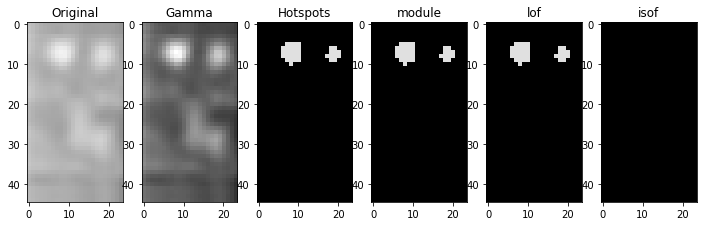

2509.jpg Normal
5266.jpg Junction-Box-Error
4178.jpg Junction-Box-Error
3617.jpg Normal
3171.jpg Normal
5500.jpg Junction-Box-Error
1766.jpg Normal
1821.jpg Normal
4781.jpg Junction-Box-Error
4959.jpg Normal
3950.jpg Normal
2496.jpg Normal
3788.jpg Normal
3944.jpg Normal
2482.jpg Normal
4795.jpg Normal
379.jpg Normal
1835.jpg Single-Hotspot


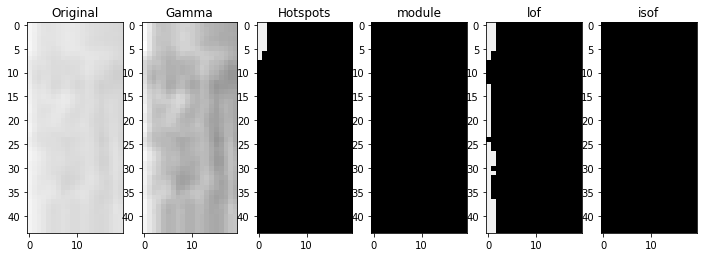

4965.jpg Junction-Box-Error
351.jpg Junction-Box-Error
437.jpg Normal
3978.jpg Normal
423.jpg Junction-Box-Error
345.jpg Normal
1809.jpg Normal
4971.jpg Junction-Box-Error
2333.jpg Normal
4742.jpg Junction-Box-Error
4024.jpg Junction-Box-Error
3993.jpg Normal
2455.jpg Normal
4030.jpg Normal
3987.jpg Normal
2441.jpg Normal
1148.jpg Normal
2327.jpg Normal
5448.jpg Junction-Box-Error
4756.jpg Junction-Box-Error
3039.jpg Normal
1606.jpg Normal
392.jpg Normal
5460.jpg Normal
3011.jpg Junction-Box-Error
3777.jpg Normal
4018.jpg Normal
5306.jpg Junction-Box-Error
2469.jpg Junction-Box-Error
1160.jpg Normal
1174.jpg Normal
3763.jpg Normal
5312.jpg Junction-Box-Error
5474.jpg Junction-Box-Error
3005.jpg Junction-Box-Error
386.jpg Normal
1612.jpg Junction-Box-Error
91.jpg Normal
609.jpg Normal
2694.jpg Normal
4583.jpg Junction-Box-Error
4597.jpg Junction-Box-Error
2858.jpg Normal
2680.jpg Normal
85.jpg Normal
1389.jpg Normal
2870.jpg Normal
635.jpg Normal
153.jpg Normal
147.jpg Normal
621.jpg No

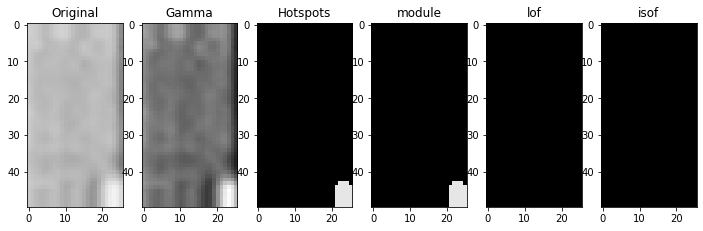

3207.jpg Junction-Box-Error
4568.jpg Normal
2119.jpg Normal
5110.jpg Normal
3561.jpg Normal
1376.jpg Normal
CPU times: user 7min 32s, sys: 5.63 s, total: 7min 37s
Wall time: 7min 36s


In [15]:
%%time
anomaly_modules = classifier.run(
    thermal_img_files, thermal_data, module_labels, input_dir_path)

異常モジュール可視化

In [16]:
modules = Modules(module_contours)
anomaly_contours = modules.get_anomaly_contours(anomaly_modules)

In [17]:
# ストリング異常の付与
if "Module-Anomaly" in anomaly_modules:
    string_anomaly_labels = modules.get_dbscan_labels(anomaly_contours["Module-Anomaly"])
    string_anomaly_modules = np.array(anomaly_modules["Module-Anomaly"])[string_anomaly_labels > 0]
    anomaly_modules["String-Anomaly"] = list(string_anomaly_modules )
    anomaly_contours = modules.get_anomaly_contours(anomaly_modules)

In [18]:
img_con = cv2.drawContours(np.zeros_like(img_org), module_contours, -1, 255, -1)
img_mask = cv2.bitwise_and(img_org, img_con)
img_mask_index = modules.add_index(img_mask)

In [19]:
#plt.imshow(img_mask_index)

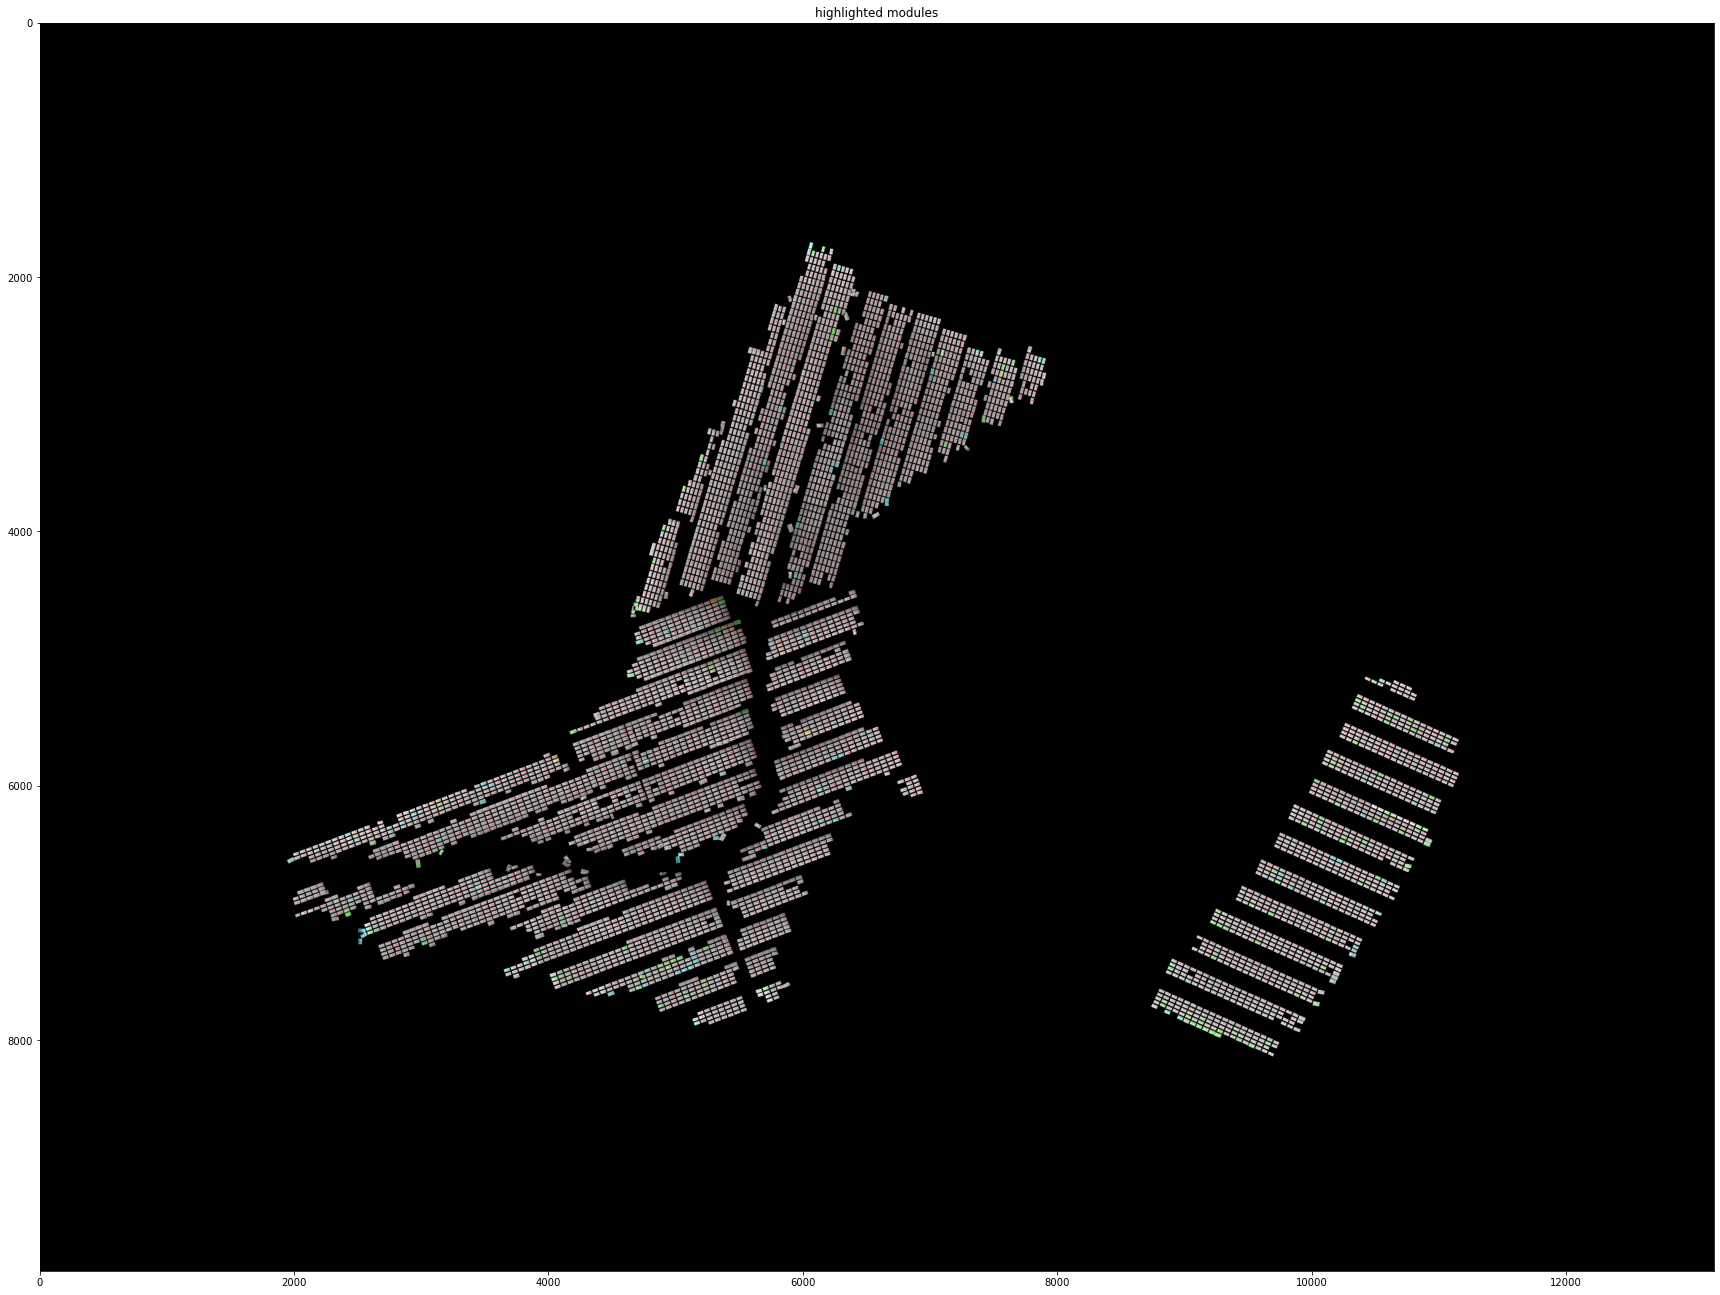

In [20]:
import copy
color_list = {
    "Single-Hotspot": (0,255,255), # aqua
    "Multi-Hotspots": (0,255,0), # green
    "Cluster-Anomaly": (255,255,0), # yellow
    "Module-Anomaly": (255,165,0), # orange
    "String-Anomaly": (238,130,238) # violet
}
img_target_index = copy.deepcopy(img_mask_index)
for k, v in anomaly_contours.items():
    if k in  ["Normal", "Junction-Box-Error"]:
        continue
    else:
        img_target_index = modules.get_img_target_contours(
            img_target_index, v, index=True, color=color_list[k])
utils.show_img(
    {"highlighted modules":img_target_index}, cmap="gray", figsize=(30,30)
)

In [21]:
img_write = cv2.cvtColor(img_target_index, cv2.COLOR_BGR2RGB)
cv2.imwrite(input_dir_path+'/img_target_index.png',img_write)

True

異常モジュールデータの保存

In [22]:
import json
with open(input_dir_path+"/anomaly_modules.json", "w") as f:
    json.dump(anomaly_modules, f, indent=4, sort_keys=True, separators=(',', ': '))